Please Follow this Docker container installation process in your MacBook/Laptop before running this Python+R Notebook below.

  - Installation setup of environment where this notebook runs can be found i 
  Container with Jupyter+H2o.ai+Python3+R+Spark in this [link_here](https://github.com/jpacerqueira/project_lost_saturn)
  
  Also :
  - You need a Strong bandwith the install the Container environment it takes about 10-11 minutes to finish.
  
  - Good Luck,  stay safe! But investigate Corona virus(covid-19 or SARS-Cov-2) in your area and give the information back to the comunity!

  - Folium maps have custom Javascript and won't display in GitHub : https://stackoverflow.com/questions/53240378/folium-map-fail-to-render-in-notebook-on-github


# CoronaVirus Prediction

### Number of Day to Predict 63

In [1]:
%autosave 360

Autosaving every 360 seconds


In [2]:
num_days_R_prediction=63

In [3]:
#!pip install rpy2
import rpy2
%load_ext rpy2.ipython
%Rpush num_days_R_prediction

In [4]:
%%R
max_days_prediction<-num_days_R_prediction

In [5]:
bypass_weather=1 # =1 bypass weather_pi api calls
#
number_past_days_training=27 # =(6/14) * num_days_R_prediction  # Number of Past days on training # max to be on 6.Feb.2020
#
max_countries_map=50
#
## DROP_N=15 => 06/02
## DROP_N=45 => 08/03
## DROP_N=75 => 07/04
## DROP_N=145 => 15/06
## DROP_N=175 => 15/07
#
drop_n_dataset_days=235
#

### Load Data from Github - John Hopkins Institute 

In [6]:
# Get data from Github
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import pandas as pd

#url_1 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
url_1 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed = pd.read_csv(url_1, error_bad_lines=False)

#url_2 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
url_2 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
death = pd.read_csv(url_2, error_bad_lines=False)

#url_3 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
url_3 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
recover = pd.read_csv(url_3, error_bad_lines=False)

# fix region names
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("Mainland China", "China")
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("US", "United States")

death['Country/Region']= death['Country/Region'].str.replace("Mainland China", "China")
death['Country/Region']= death['Country/Region'].str.replace("US", "United States")

recover['Country/Region']= recover['Country/Region'].str.replace("Mainland China", "China")
recover['Country/Region']= recover['Country/Region'].str.replace("US", "United States")

In [7]:
confirmed.iloc[:,:]

Province/State          Country/Region  \
0                                             NaN             Afghanistan   
1                                             NaN                 Albania   
2                                             NaN                 Algeria   
3                                             NaN                 Andorra   
4                                             NaN                  Angola   
5                                             NaN     Antigua and Barbuda   
6                                             NaN               Argentina   
7                                             NaN                 Armenia   
8                    Australian Capital Territory               Australia   
9                                 New South Wales               Australia   
10                             Northern Territory               Australia   
11                                     Queensland               Australia   
12                                South Australia               Australia   
13                                       Tasmania               Australia   
14                                       Victoria               Australia   
15                              Western Australia               Australia   
16                                            NaN                 Austria   
17                                            NaN              Azerbaijan   
18                                            NaN                 Bahamas   
19                                            NaN                 Bahrain   
20                                            NaN              Bangladesh   
21                                            NaN                Barbados   
22                                            NaN                 Belarus   
23                                            NaN                 Belgium   
24                                            NaN                  Belize   
25                                            NaN                   Benin   
26                                            NaN                  Bhutan   
27                                            NaN                 Bolivia   
28                                            NaN  Bosnia and Herzegovina   
29                                            NaN                Botswana   
..                                            ...                     ...   
244                                           NaN             Timor-Leste   
245                                           NaN                    Togo   
246                                           NaN     Trinidad and Tobago   
247                                           NaN                 Tunisia   
248                                           NaN                  Turkey   
249                                           NaN           United States   
250                                           NaN                  Uganda   
251                                           NaN                 Ukraine   
252                                           NaN    United Arab Emirates   
253                                      Anguilla          United Kingdom   
254                                       Bermuda          United Kingdom   
255                        British Virgin Islands          United Kingdom   
256                                Cayman Islands          United Kingdom   
257                               Channel Islands          United Kingdom   
258                   Falkland Islands (Malvinas)          United Kingdom   
259                                     Gibraltar          United Kingdom   
260                                   Isle of Man          United Kingdom   
261                                    Montserrat          United Kingdom   
262  Saint Helena, Ascension and Tristan da Cunha          United Kingdom   
263                      Turks and Caicos Islands          United Kingdom   
264                            

## Get Population

In [8]:
population=pd.read_csv('/home/notebookuser/notebooks/covid19/data/population.csv', sep=',', encoding='latin1') 
confirmed=pd.merge(confirmed, population,how='left' ,on=['Province/State','Country/Region'])
death=pd.merge(death, population,how='left' ,on=['Province/State','Country/Region'])
recover=pd.merge(recover, population,how='left' ,on=['Province/State','Country/Region'])

In [9]:
# merge region confirmed + death + recover
confirmed['region']=confirmed['Country/Region'].map(str)+'_'+confirmed['Province/State'].map(str)
death['region']=death['Country/Region'].map(str)+'_'+death['Province/State'].map(str)
recover['region']=recover['Country/Region'].map(str)+'_'+recover['Province/State'].map(str)
confirmed.iloc[:,:]

Province/State          Country/Region  \
0                                             NaN             Afghanistan   
1                                             NaN                 Albania   
2                                             NaN                 Algeria   
3                                             NaN                 Andorra   
4                                             NaN                  Angola   
5                                             NaN     Antigua and Barbuda   
6                                             NaN               Argentina   
7                                             NaN                 Armenia   
8                    Australian Capital Territory               Australia   
9                                 New South Wales               Australia   
10                             Northern Territory               Australia   
11                                     Queensland               Australia   
12                                South Australia               Australia   
13                                       Tasmania               Australia   
14                                       Victoria               Australia   
15                              Western Australia               Australia   
16                                            NaN                 Austria   
17                                            NaN              Azerbaijan   
18                                            NaN                 Bahamas   
19                                            NaN                 Bahrain   
20                                            NaN              Bangladesh   
21                                            NaN                Barbados   
22                                            NaN                 Belarus   
23                                            NaN                 Belgium   
24                                            NaN                  Belize   
25                                            NaN                   Benin   
26                                            NaN                  Bhutan   
27                                            NaN                 Bolivia   
28                                            NaN  Bosnia and Herzegovina   
29                                            NaN                Botswana   
..                                            ...                     ...   
250                                           NaN             Timor-Leste   
251                                           NaN                    Togo   
252                                           NaN     Trinidad and Tobago   
253                                           NaN                 Tunisia   
254                                           NaN                  Turkey   
255                                           NaN           United States   
256                                           NaN                  Uganda   
257                                           NaN                 Ukraine   
258                                           NaN    United Arab Emirates   
259                                      Anguilla          United Kingdom   
260                                       Bermuda          United Kingdom   
261                        British Virgin Islands          United Kingdom   
262                                Cayman Islands          United Kingdom   
263                               Channel Islands          United Kingdom   
264                   Falkland Islands (Malvinas)          United Kingdom   
265                                     Gibraltar          United Kingdom   
266                                   Isle of Man          United Kingdom   
267                                    Montserrat          United Kingdom   
268  Saint Helena, Ascension and Tristan da Cunha          United Kingdom   
269                      Turks and Caicos Islands          United Kingdom   
270                            

In [10]:
# merge region death
death.iloc[185:195,:]

Province/State Country/Region        Lat        Long  1/22/20  1/23/20  \
185            NaN     Mauritania  21.007900  -10.940800        0        0   
186            NaN      Mauritius -20.348404   57.552152        0        0   
187            NaN         Mexico  23.634500 -102.552800        0        0   
188            NaN     Micronesia   7.425600  150.550800        0        0   
189            NaN        Moldova  47.411600   28.369900        0        0   
190            NaN         Monaco  43.733300    7.416700        0        0   
191            NaN       Mongolia  46.862500  103.846700        0        0   
192            NaN     Montenegro  42.708678   19.374390        0        0   
193            NaN        Morocco  31.791700   -7.092600        0        0   
194            NaN     Mozambique -18.665695   35.529562        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  3/11/21  3/12/21  3/13/21  \
185        0        0        0        0  ...      442      442      443   
186        0        0        0        0  ...       10       10       10   
187        0        0        0        0  ...   193152   193851   194490   
188        0        0        0        0  ...        0        0        0   
189        0        0        0        0  ...     4220     4258     4294   
190        0        0        0        0  ...       26       27       27   
191        0        0        0        0  ...        4        4        4   
192        0        0        0        0  ...     1113     1117     1122   
193        0        0        0        0  ...     8712     8716     8718   
194        0        0        0        0  ...      711      719      722   

     3/14/21  3/15/21  3/16/21  3/17/21  3/18/21   Population           region  
185      444      444      444      445      445     4,649,658  Mauritania_nan  
186       10       10       10       10       10           NaN   Mauritius_nan  
187   194710   194944   195119   195908   196606   128,640,794      Mexico_nan  
188        0        0        0        0        0           NaN  Micronesia_nan  
189     4330     4369     4402     4436     4472     4,035,942     Moldova_nan  
190       27       27       27       27       27        39,183      Monaco_nan  
191        4        4        4        4        4     3,278,290    Mongolia_nan  
192     1129     1136     1151     1169     1178       622 500  Montenegro_nan  
193     8723     8733     8737     8745     8748    36,817,128     Morocco_nan  
194      725      725      732      733      737    31,542,919  Mozambique_nan  

[10 rows x 428 columns]

In [11]:
# merge region recover
recover.iloc[175:185,:]

Province/State Country/Region        Lat      Long  \
175                               NaN     Montenegro  42.708678  19.37439   
176                               NaN        Morocco  31.791700  -7.09260   
177                               NaN     Mozambique -18.665700  35.52960   
178                               NaN        Namibia -22.957600  18.49040   
179                               NaN          Nepal  28.166700  84.25000   
180                             Aruba    Netherlands  12.521100 -69.96830   
181  Bonaire, Sint Eustatius and Saba    Netherlands  12.178400 -68.23850   
182                           Curacao    Netherlands  12.169600 -68.99000   
183                      Sint Maarten    Netherlands  18.042500 -63.05480   
184                               NaN    Netherlands  52.132600   5.29130   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  3/11/21  \
175        0        0        0        0        0        0  ...    71864   
176        0        0        0        0        0        0  ...   474257   
177        0        0        0        0        0        0  ...    48616   
178        0        0        0        0        0        0  ...    38104   
179        0        0        0        0        0        0  ...   271116   
180        0        0        0        0        0        0  ...     7974   
181        0        0        0        0        0        0  ...      180   
182        0        0        0        0        0        0  ...     4688   
183        0        0        0        0        0        0  ...     2035   
184        0        0        0        0        0        0  ...        0   

     3/12/21  3/13/21  3/14/21  3/15/21  3/16/21  3/17/21  3/18/21  \
175    72490    72944    73611    74290    74852    75503    76200   
176   474938   475457   475849   476126   476727   477305   477879   
177    48938    49814    50380    50380    50844    51376    52363   
178    38217    38264    38470    38514    38793    38942    39105   
179   271177   271249   271326   271401   271495   271550   271610   
180     8009     8028     8045     8074     8094     8143     8164   
181      180      180      180      180      180      180      180   
182     4698     4705     4715     4719     4730     4747     4761   
183     2041     2041     2041     2048     2051     2051     2051   
184        0        0        0        0        0        0        0   

      Population                                         region  
175       622 500                                Montenegro_nan  
176    36,817,128                                   Morocco_nan  
177    31,542,919                                Mozambique_nan  
178     2,540,905                                   Namibia_nan  
179    29,300,000                                     Nepal_nan  
180       116,600                             Netherlands_Aruba  
181           NaN  Netherlands_Bonaire, Sint Eustatius and Saba  
182       158,665                           Netherlands_Curacao  
183           NaN                      Netherlands_Sint Maarten  
184    17,180,000                               Netherlands_nan  

[10 rows x 428 columns]

In [12]:
confirmed.iloc[185:195,:]

Province/State Country/Region        Lat        Long  1/22/20  1/23/20  \
185            NaN     Mauritania  21.007900  -10.940800        0        0   
186            NaN      Mauritius -20.348404   57.552152        0        0   
187            NaN         Mexico  23.634500 -102.552800        0        0   
188            NaN     Micronesia   7.425600  150.550800        0        0   
189            NaN        Moldova  47.411600   28.369900        0        0   
190            NaN         Monaco  43.733300    7.416700        0        0   
191            NaN       Mongolia  46.862500  103.846700        0        0   
192            NaN     Montenegro  42.708678   19.374390        0        0   
193            NaN        Morocco  31.791700   -7.092600        0        0   
194            NaN     Mozambique -18.665695   35.529562        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  3/11/21  3/12/21  3/13/21  \
185        0        0        0        0  ...    17394    17410    17424   
186        0        0        0        0  ...      664      711      739   
187        0        0        0        0  ...  2150955  2157771  2163875   
188        0        0        0        0  ...        1        1        1   
189        0        0        0        0  ...   200124   201909   203710   
190        0        0        0        0  ...     2075     2097     2106   
191        0        0        0        0  ...     3664     3833     3961   
192        0        0        0        0  ...    82029    82610    83165   
193        0        0        0        0  ...   487750   488181   488632   
194        0        0        0        0  ...    63645    64004    64296   

     3/14/21  3/15/21  3/16/21  3/17/21  3/18/21   Population           region  
185    17438    17457    17487    17521    17542     4,649,658  Mauritania_nan  
186      742      747      758      762      768           NaN   Mauritius_nan  
187  2166290  2167729  2169007  2175462  2182188   128,640,794      Mexico_nan  
188        1        1        1        1        1           NaN  Micronesia_nan  
189   204463   205324   207012   208928   210725     4,035,942     Moldova_nan  
190     2107     2120     2135     2141     2149        39,183      Monaco_nan  
191     4083     4210     4340     4498     4658     3,278,290    Mongolia_nan  
192    83693    84163    84700    85253    85774       622 500  Montenegro_nan  
193   488937   489096   489622   490088   490575    36,817,128     Morocco_nan  
194    64516    64516    64929    65197    65452    31,542,919  Mozambique_nan  

[10 rows x 428 columns]

In [13]:
confirmed.iloc[220:230,:]

Province/State                    Country/Region        Lat        Long  \
220            NaN                            Rwanda  -1.940300   29.873900   
221            NaN             Saint Kitts and Nevis  17.357822  -62.782998   
222            NaN                       Saint Lucia  13.909400  -60.978900   
223            NaN  Saint Vincent and the Grenadines  12.984300  -61.287200   
224            NaN                             Samoa -13.759000 -172.104600   
225            NaN                        San Marino  43.942400   12.457800   
226            NaN             Sao Tome and Principe   0.186400    6.613100   
227            NaN                      Saudi Arabia  23.885942   45.079162   
228            NaN                           Senegal  14.497400  -14.452400   
229            NaN                            Serbia  44.016500   21.005900   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  3/11/21  \
220        0        0        0        0        0        0  ...    19945   
221        0        0        0        0        0        0  ...       42   
222        0        0        0        0        0        0  ...     3966   
223        0        0        0        0        0        0  ...     1674   
224        0        0        0        0        0        0  ...        3   
225        0        0        0        0        0        0  ...     4062   
226        0        0        0        0        0        0  ...     2035   
227        0        0        0        0        0        0  ...   381348   
228        0        0        0        0        0        0  ...    36371   
229        0        0        0        0        0        0  ...   503291   

     3/12/21  3/13/21  3/14/21  3/15/21  3/16/21  3/17/21  3/18/21  \
220    20057    20143    20186    20302    20412    20480    20551   
221       42       43       43       43       43       43       44   
222     3989     3989     4031     4053     4069     4083     4097   
223     1674     1680     1680     1680     1681     1681     1684   
224        3        3        3        3        3        3        3   
225     4096     4126     4126     4151     4204     4249     4292   
226     2057     2078     2078     2084     2085     2107     2114   
227   381708   382059   382407   382752   383106   383499   383880   
228    36569    36726    36892    36996    37062    37254    37428   
229   507959   512051   516277   520911   526112   531558   536904   

      Population                                 region  
220    12,952,218                            Rwanda_nan  
221           NaN             Saint Kitts and Nevis_nan  
222       184,106                       Saint Lucia_nan  
223       110,940  Saint Vincent and the Grenadines_nan  
224           NaN                             Samoa_nan  
225        33,916                        San Marino_nan  
226           NaN             Sao Tome and Principe_nan  
227    34,695,447                      Saudi Arabia_nan  
228    16,743,927                           Senegal_nan  
229     8,744,671                            Serbia_nan  

[10 rows x 428 columns]

## Create Time Series + Plots

In [14]:
def create_ts(df):
  ts=df
  ts=ts.drop(['Province/State', 'Country/Region','Lat', 'Long',' Population '], axis=1)
  ts.set_index('region')
  ts=ts.T
  ts.columns=ts.loc['region']
  ts=ts.drop('region')
  ts=ts.fillna(0)
  ts=ts.reindex(sorted(ts.columns), axis=1)
  return (ts)

In [15]:
## JOAO - Fix - Drop Duplicates # Keep Last # Issue With Data source Change from John Hopkins institute
#
ts=create_ts(confirmed.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_d=create_ts(death.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_rec=create_ts(recover.drop_duplicates(subset=['region'], keep='last', inplace=False) )

In [16]:
# JOAO - FIX - Automation WarmUp of Plot Library
import matplotlib.pyplot as plt
import time
plt.legend(loc = 'upper left')
plt.show()

No handles with labels found to put in legend.


<Figure size 640x480 with 1 Axes>

Text(0.5, 1.0, 'Daily Update - Total Recovered - Major_4,25 2nd Areas')

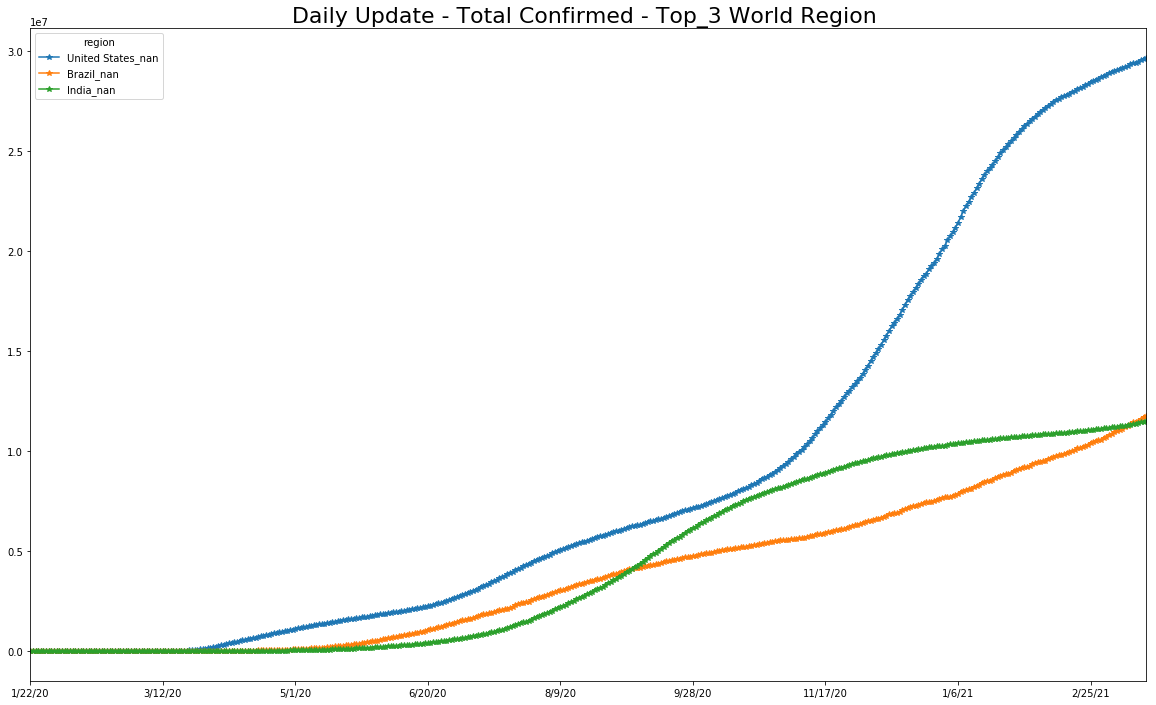

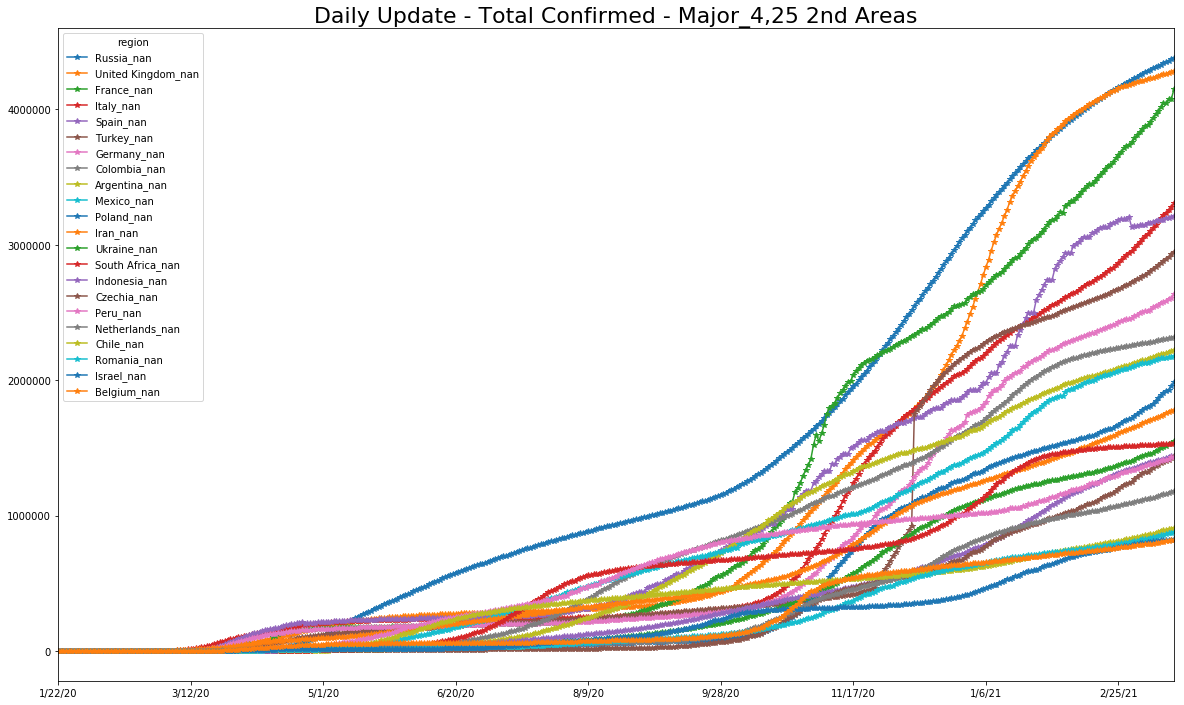

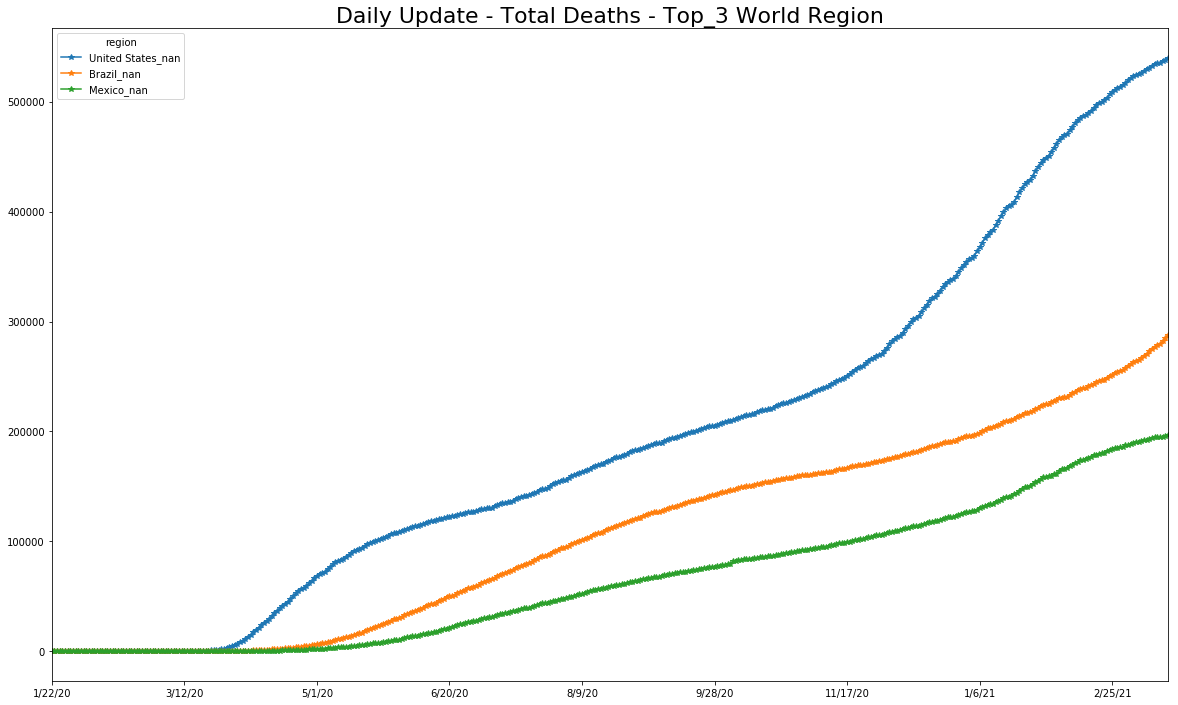

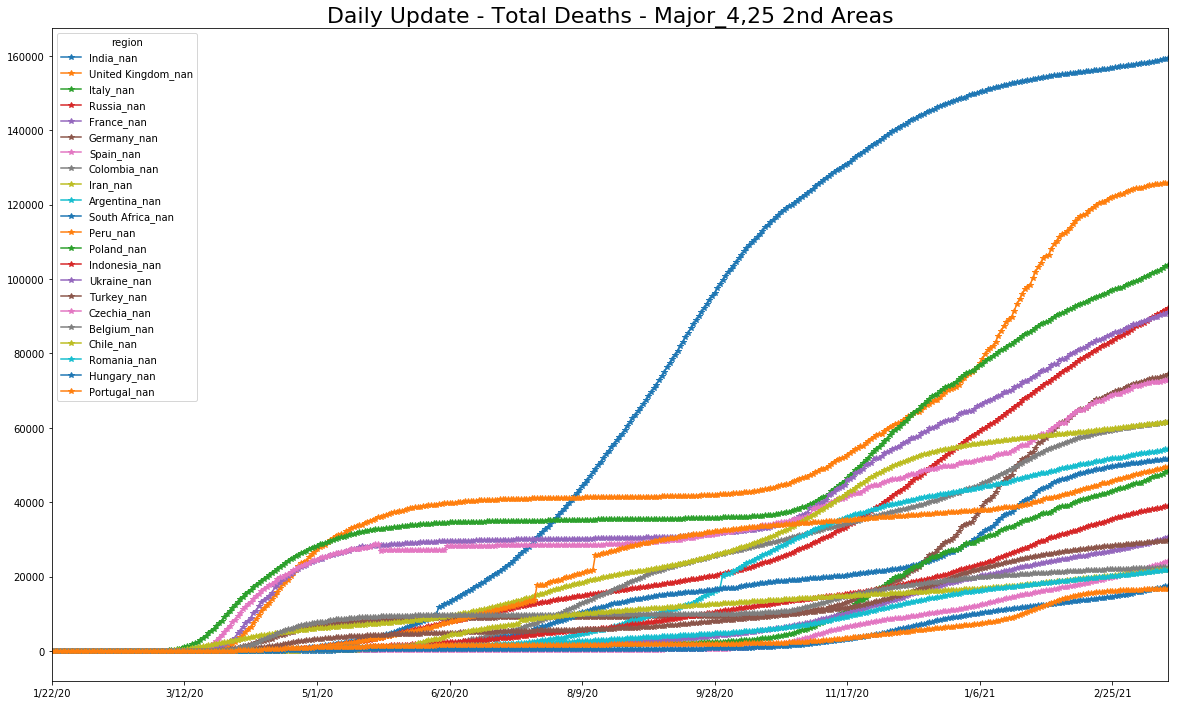

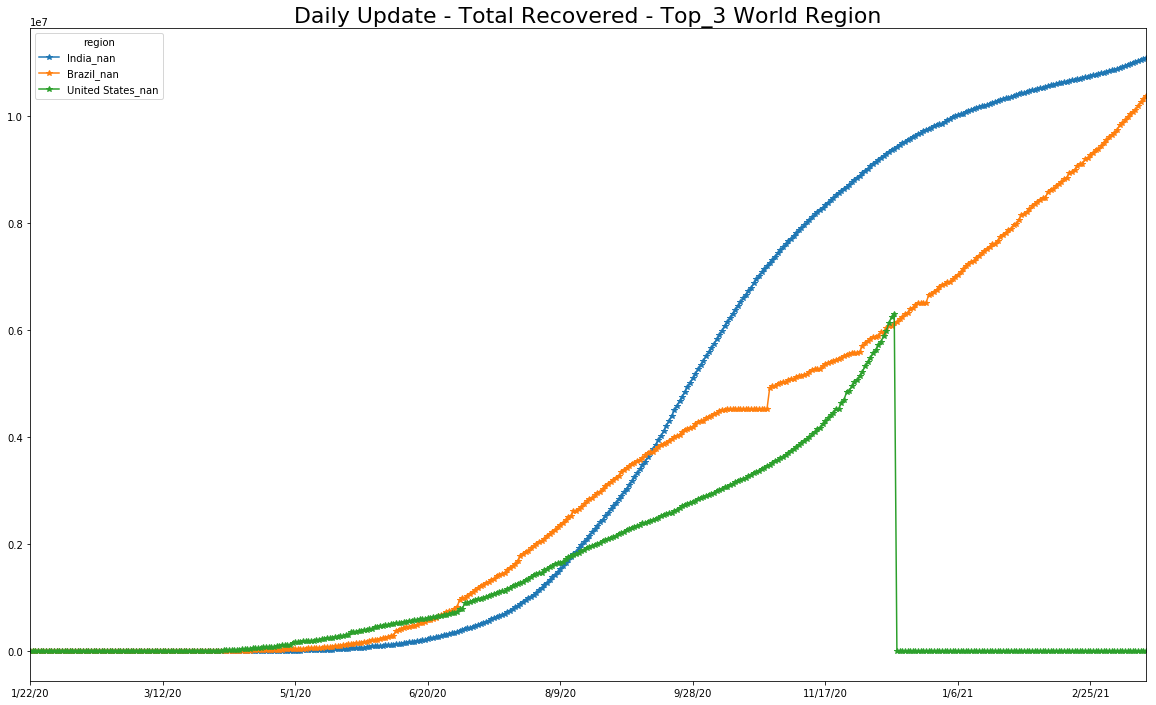

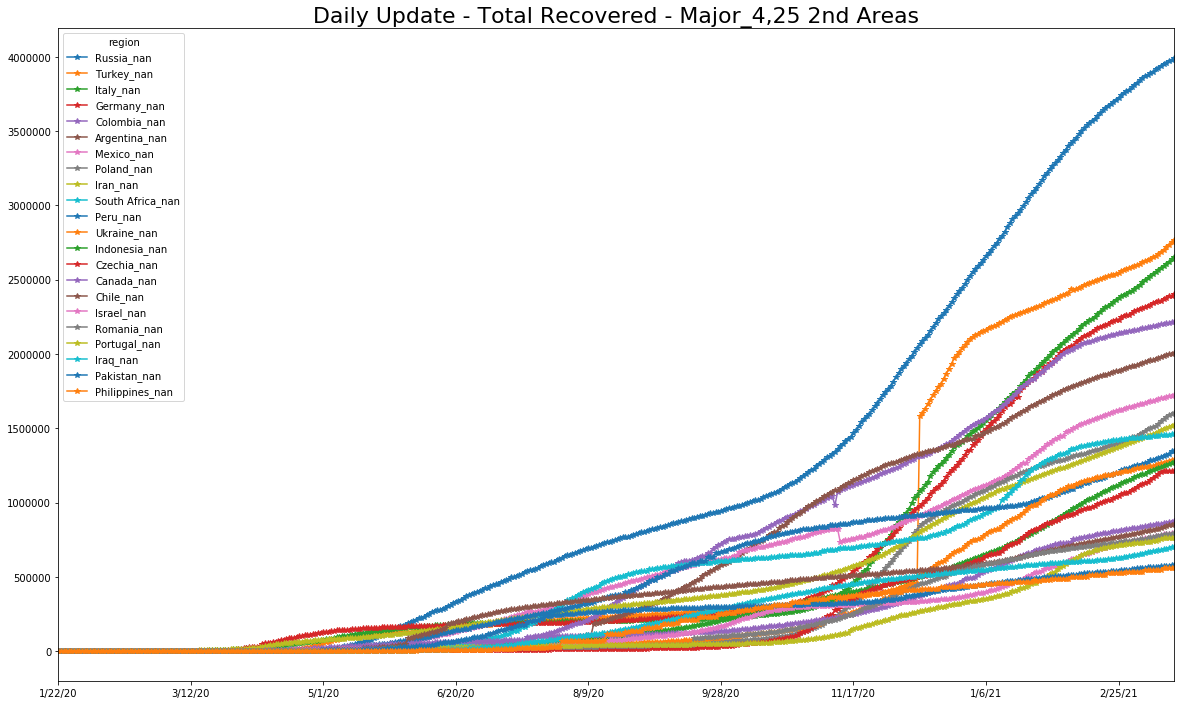

In [17]:
#
p=ts.reindex(ts.max().sort_values(ascending=False).index, axis=1)
p.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Confirmed - Top_3 World Region ',fontdict={'fontsize': 22})
p.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Confirmed - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_d=ts_d.reindex(ts_d.max().sort_values(ascending=False).index, axis=1)
p_d.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Deaths - Top_3 World Region',fontdict={'fontsize': 22})
p_d.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Deaths - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_r=ts_rec.reindex(ts_rec.max().sort_values(ascending=False).index, axis=1)
p_r.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Recovered - Top_3 World Region',fontdict={'fontsize': 22})
p_r.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Recovered - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

### Extract Weather Data

In [18]:
#!pip install pyweatherbit
#
from weatherbit.api import Api
import json  
import pandas as pd  
from pandas.io.json import json_normalize 

### API - Joao
from datetime import datetime

#
api_key="29d9e51c56b94621b16297bcdeee9c4d" # hxj@mail.xcom
#

api = Api(api_key)
api.set_granularity('daily')

# # Set the granularity of the API - Options: ['daily','hourly','3hourly']
# # Will only affect forecast requests.

#api.get_forecast(lat='Lat', lon='Lon')
#my_end_date=datetime.today().strftime('%Y-%m-%d')

#### United Kingdom
#lat1='55.378100'
#lon1='-3.436000'
#api.get_history(lat=lat1,lon=lon1, start_date='2020-03-29',end_date=my_end_date)


In [19]:
##
#### My List of Countries and Regions to train and represent data
my_train_list=[
 ### JOAO - LIST of Countries - Start here
     #   'Andorra_nan', 
        'United States_nan',
        'United Kingdom_nan',
        'Italy_nan',
        'Spain_nan',  
        'Netherlands_nan',
        'France_nan', 
        'Belgium_nan',
        'Portugal_nan',
        'Switzerland_nan',
        'Germany_nan',
        'Japan_nan',
        'Poland_nan',
  ### JOAO - LIST of Countries - Finish here
        'Korea, South_nan',
        'China_Hubei',
        'China_Beijing',
        'China_Guangdong',
        'China_Shanghai',
      #  'China_Shanxi',
      #  'China_Sichuan',  'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'China_Anhui', 'China_Beijing',
      #  'China_Chongqing', 'China_Fujian', 'China_Gansu',
      #  'China_Guangdong', 'China_Guangxi', 'China_Guizhou',
      #  'China_Hainan', 'China_Hebei', 'China_Heilongjiang', 'China_Henan',
      #  'China_Hubei', 'China_Hunan', 'China_Inner Mongolia',
      #  'China_Jiangsu', 'China_Jiangxi', 'China_Jilin', 'China_Liaoning',
      #  'China_Ningxia', 'China_Qinghai', 'China_Shaanxi',
      #  'China_Shandong', 'China_Shanghai', 'China_Shanxi',
      #  'China_Sichuan', 'China_Tianjin', 'China_Tibet', 'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'Morocco_nan',
        'Australia_New South Wales',
      # 'Australia_Queensland',
      # 'Australia_South Australia', 'Australia_Victoria', 
        'Brazil_nan',
      # 'Cambodia_nan',
      # 'Canada_British Columbia',
        'Canada_Ontario',
        'Canada_Quebec',
      # 'Egypt_nan',
        'China_Hong Kong',
        'China_Macau',
        'Finland_nan',
        'India_nan',
        'Iran_nan',
        'Malaysia_nan',
      # 'Nepal_nan',
        'Norway_nan',
        'Philippines_nan', 'Russia_nan', 'Singapore_nan',
     #  'Sri Lanka_nan', 'Thailand_nan', 'United Arab Emirates_nan',
        'Sweden_nan',
        'Austria_nan',
     #  'Taiwan*_nan', 
     #  'Vietnam_nan',
        'Turkey_nan',
        'Peru_nan',
        'Chile_nan',
        'Mexico_nan'
       ]
#

#### Weather History

In [20]:
# ################## already done since API is limited to 500 call per day
## consume Wether data From 15/03/2020 forward to end_date=30/03/2020
#
### Location in confirmed array to start in pos 1='Albania_nan' 61 = 'China_Hong Kong'
### Only run for Countries in above : my_train_list 
vpos=len(confirmed.iloc[1])-1 #90# 89 #88 #87 #86 #85 #84 #83 #82 #81 #80 #79 #78 #77 #76 #75 #74 #1 #73
print('xcountry_region='+confirmed.iloc[1,vpos])

my_weather_fetch_list= my_train_list # ['Canada_Quebec'] #  ['Iran_nan'] #['Brazil_nan'] #

start_date_init=pd.to_datetime('today').strftime('%Y/%m/%d') # '2020-04-18'
print('start_date_init=',start_date_init)
offset_days=-1 # -1 to start yesterday pick today # API free-tier just picks one per api call!
max_days=1 #1

w=pd.DataFrame(columns=['date','region','min','max'])
if bypass_weather != 1 :
    for h in range(0,max_days):
        offset_days=h
        start_date=pd.to_datetime(start_date_init)
        #
        end_date=(start_date+pd.DateOffset(days=offset_days+1)).strftime('%Y-%m-%d')
        start_date=(start_date+pd.DateOffset(days=offset_days)).strftime('%Y-%m-%d')
        prnt_start_date=pd.to_datetime(start_date).strftime('%Y/%m/%d')
        prnt_end_date=pd.to_datetime(end_date).strftime('%Y/%m/%d')
        #
        for i in range (1,len(confirmed)):
            if confirmed.iloc[i,vpos] not in my_weather_fetch_list:
                continue
            if confirmed.iloc[i,vpos] in my_weather_fetch_list:
                #
                # Clean JSON structure return from API Call
                jas=""
                jas=api.get_history(lat=confirmed.iloc[i,2], lon=confirmed.iloc[i,3], start_date=start_date,end_date=end_date).json
                if (((json_normalize(jas['data'])['min_temp'].values[0])=='')
                     or (np.isnan((json_normalize(jas['data'])['min_temp'].values[0])) == True )):
                    continue
                try:
                    w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':json_normalize(jas['data'])['min_temp'].values[0],'max':json_normalize(jas['data'])['max_temp'].values[0]}, ignore_index=True)
                except Exception:
                    w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':None,'max':None}, ignore_index=True)
    #        
#
table_columns=['date','region','min','max']
w = w[w.columns.intersection(table_columns)]

xcountry_region=Albania_nan
start_date_init= 2021/03/19


In [21]:
w.to_csv('data/w_v2_v227.csv', index = False, header=True)

In [22]:
w[:]

Empty DataFrame
Columns: [date, region, min, max]
Index: []

## Kalman Filter With R

In [23]:
# Joao - FIX - Improve Performance 
### Drop the Months of Jan, Feb < 06/02 as
### they are too in the Past and model no longuer trains in China Hubei only!
#
## DROP_N=75 => 07/04

drop_n=drop_n_dataset_days

ts=ts[drop_n:]
ts_d=ts_d[drop_n:]
ts_rec=ts_rec[drop_n:]

In [24]:
ts[:3]

region   Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  Angola_nan  \
9/13/20            38716        11353        48254         1344        3388   
9/14/20            38772        11520        48496         1438        3439   
9/15/20            38815        11672        48734         1438        3569   

region   Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \
9/13/20                       95         555537        45862   
9/14/20                       95         565446        45969   
9/15/20                       95         577338        46119   

region   Australia_Australian Capital Territory  Australia_New South Wales  \
9/13/20                                     113                       4170   
9/14/20                                     113                       4177   
9/15/20                                     113                       4185   

region   ...  United States_nan  Uruguay_nan  Uzbekistan_nan  Vanuatu_nan  \
9/13/20  ...            6522802         1808           47287            0   
9/14/20  ...            6557228         1812           47836            0   
9/15/20  ...            6596784         1827           48429            0   

region   Venezuela_nan  Vietnam_nan  West Bank and Gaza_nan  Yemen_nan  \
9/13/20          60540         1063                   30574       2011   
9/14/20          61569         1063                   31362       2013   
9/15/20          62655         1063                   32250       2016   

region   Zambia_nan  Zimbabwe_nan  
9/13/20       13539          7526  
9/14/20       13720          7531  
9/15/20       13819          7576  

[3 rows x 274 columns]

In [25]:
ts[-4:]

region   Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  Angola_nan  \
3/15/21            55985       118017       115410        11289       21407   
3/16/21            55995       118492       115540        11319       21446   
3/17/21            56016       118938       115688        11360       21489   
3/18/21            56044       119528       115842        11393       21558   

region   Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \
3/15/21                      963        2201886       178702   
3/16/21                      992        2210121       179287   
3/17/21                      992        2218425       180141   
3/18/21                     1008        2226753       181165   

region   Australia_Australian Capital Territory  Australia_New South Wales  \
3/15/21                                     123                       5242   
3/16/21                                     123                       5249   
3/17/21                                     123                       5251   
3/18/21                                     123                       5256   

region   ...  United States_nan  Uruguay_nan  Uzbekistan_nan  Vanuatu_nan  \
3/15/21  ...           29495424        72862           80678            3   
3/16/21  ...           29549003        73770           80743            3   
3/17/21  ...           29607483        75138           80858            3   
3/18/21  ...           29665679        76816           80971            3   

region   Venezuela_nan  Vietnam_nan  West Bank and Gaza_nan  Yemen_nan  \
3/15/21         146488         2557                  211602       2908   
3/16/21         147028         2560                  213791       2969   
3/17/21         147577         2567                  215984       3037   
3/18/21         148208         2570                  218061       3126   

region   Zambia_nan  Zimbabwe_nan  
3/15/21       84950         36504  
3/16/21       85240         36535  
3/17/21       85502         36552  
3/18/21       85889         36611  

[4 rows x 274 columns]

In [26]:
# Create data for R script
ts_conf=ts.reset_index()
ts_conf=ts_conf.rename(columns = {'index':'date'})
ts_conf['date']=pd.to_datetime(ts_conf['date'] ,errors ='coerce')
ts_conf.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv')

ts_rec=ts_rec.reset_index()
ts_rec=ts_rec.rename(columns = {'index':'date'})
ts_rec['date']=pd.to_datetime(ts_rec['date'] ,errors ='coerce')
ts_rec.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_rec_r.csv')


ts_d=ts_d.reset_index()
ts_d=ts_d.rename(columns = {'index':'date'})
ts_d['date']=pd.to_datetime(ts_d['date'] ,errors ='coerce')
ts_d.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_d_r.csv')


In [27]:
%%R

#install.packages('pracma')
#install.packages('Metrics')
#install.packages('readr')
#install.packages('reshape')

Sys.setenv(TZ='GMT')
Sys.timezone()

[1] "GMT"


In [28]:
%%R
require(pracma)
require(Metrics)
require(readr)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL
date<-all[,1]
date[nrow(date) + 1,1] <-all[nrow(all),1]+1
pred_all<-NULL
for (n in 2:ncol(all)-1) {
  Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
  sig_w<-0.01
  w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
  sig_v<-0.01
  v<-sig_v*randn(1,100)   
  t<-0.45
  phi<-matrix(c(1,0,t,1),2,2)
  gama<-matrix(c(0.5*t^2,t),2,1)
  H<-matrix(c(1,0),1,2)
  #Kalman
  x0_0<-p0_0<-matrix(c(0,0),2,1)
  p0_0<-matrix(c(1,0,0,1),2,2)
  Q<-0.01
  R<-0.01
  X<-NULL
  X2<-NULL
  pred<-NULL
  for (i in 0:nrow(all)) {
    namp <-paste("p", i+1,"_",i, sep = "")
    assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
    namk <- paste("k", i+1, sep = "")
    assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
    namx <- paste("x", i+1,"_",i, sep = "")
    assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
    namE <- paste("E", i+1, sep = "")
    assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
    namx2 <- paste("x", i+1,"_",i+1, sep = "")
    assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
    namp2 <- paste("p", i+1,"_",i+1, sep = "")
    assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
    X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
    X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
    if(i>2){
      remove(list=(paste("p", i-1,"_",i-2, sep = "")))
      remove(list=(paste("k", i-1, sep = "")))
      remove(list=(paste("E", i-1, sep = "")))
      remove(list=(paste("p", i-2,"_",i-2, sep = "")))
      remove(list=(paste("x", i-1,"_",i-2, sep = "")))
      remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
  }
  pred<-NULL
  pred<-cbind(Y,X,round(X2,4))
  pred<-as.data.frame(pred)
  pred$region<-colnames(all[,n+1])
  pred$date<-date$date
  pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
  pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
  pred$pred_rate<-(pred$X/pred$Y-1)*100
  pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
  pred_all<-rbind(pred_all,pred)
}
pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
names(pred_all)[5]<-"X2"
pred_all=pred_all[with( pred_all, order(region, date)), ]
pred_all<-pred_all[,3:5]

R[write to console]: Loading required package: pracma

R[write to console]: Loading required package: Metrics

R[write to console]: Loading required package: readr

R[write to console]: 
── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  date = col_date(format = "")
)
ℹ Use `spec()` for the full column specifications.




In [29]:
p=%R pred_all

In [30]:
############ Merge R output due to package problem
### Joao FIX - 
# t=ts_d    -  deaths
# t=ts_rec  -  recovered
# t=ts      -  confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

temp=t.iloc[:,:3]
temp=temp.reset_index(drop=True)
for i in range(1,len(t)+1):
  if(temp.iloc[i,1] is not temp.iloc[i-1,1]):
    temp.loc[len(temp)+1] = [temp.iloc[i-1,0]+ pd.DateOffset(1),temp.iloc[i-1,1], 0] 
temp=temp.sort_values(['region', 'date'])
temp=temp.reset_index(drop=True)
temp['Y']=p['Y']
temp['X']=p['X']
temp['X2']=p['X2']

# JOAO - FIX - temp fixed
# Y,X,X2 nan issue from p revolved

p_pd=pd.DataFrame(p,columns=['Y','X','X2'])

p_pd['nindex'] = range(1, 1+len(p_pd))
temp['nindex']= range(1,1+len(temp))

#temp_1 = temp.join(p_pd)
temp_1 = temp.merge(p_pd, on='nindex', how='inner', suffixes=('_1', '_2')).rename(columns={"Y_2": "Y", "X_2": "X", "X2_2" : "X2"})
temp_1 = temp_1.drop(columns=['Y_1', 'X_1','X2_1','nindex'])


temp=temp_1
temp.to_csv(r'/home/notebookuser/notebooks/covid19/data/temp.csv')

## Pre Proccessing Data for ML Model

### Extract Weather Forecast Data

In [31]:
#
### Joao - Test Later Weather from new file : w_v2.csv and w_v2_v2.csv
w_v2=pd.read_csv('data/w_v2.csv', sep=',', encoding='latin1')
w_v2['date']=pd.to_datetime(w_v2['date'],format='%Y/%m/%d')

w_v2_v2=pd.read_csv('data/w_v2_v2.csv', sep=',', encoding='latin1')
w_v2_v2['date']=pd.to_datetime(w_v2_v2['date'],format='%Y/%m/%d')

w_v2_v227=pd.read_csv('data/w_v2_v227.csv', sep=',', encoding='latin1')
w_v2_v227['date']=pd.to_datetime(w_v2_v227['date'],format='%Y/%m/%d')

w=pd.read_csv('data/w.csv', sep=',', encoding='latin1')
w['date']=pd.to_datetime(w['date'],format='%d/%m/%Y')

w_forecast=pd.read_csv('data/w_forecast.csv', sep=',', encoding='latin1')
w_forecast['date']=pd.to_datetime(w_forecast['date'],format='%d/%m/%Y')

### Append Weather fetched now to file w_v2_v2
w_n_forward=w_v2_v2.append(w_v2_v227) 
w_n_forward=w_n_forward.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_n_forward=w_n_forward.sort_values(by=['region','date'], ascending=True)
w_n_forward.to_csv(r'data/w_v2_v2.csv', index = False, header=True)

In [32]:
w_total=pd.DataFrame(columns=['date','region','min','max'])
w_total=w.append(w_forecast).append(w_v2).append(w_v2_v2).append(w_v2_v227) 
w_total=w_total.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_total=w_total.sort_values(by=['region','date'], ascending=True)

w_total.to_csv(r'data/w_total.csv', index = False, header=True)

In [33]:
w_in_model=pd.read_csv('data/w_total.csv', sep=',', encoding='latin1')
#
w_in_model['date']=pd.to_datetime(w_in_model['date'],format='%Y/%m/%d')
w_in_model.to_csv(r'data/w_in_model.csv', index = False, header=True)

In [34]:
w_in_model.tail(2)

date       region   min   max
8379 2020-05-10  Vietnam_nan  26.9  33.0
8380 2020-05-11  Vietnam_nan  25.0  33.0

### Build Train Set Data Structure

In [35]:
### JOAO - Fix -
## t=ts confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

# Add 1 Future day for prediction
t=t.reset_index(drop=True)
for i in range(1,len(t)+1):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        t.loc[len(t)+1] = [t.iloc[i-1,0]+ pd.DateOffset(1),t.iloc[i-1,1], 0] 
t=t.sort_values(['region', 'date'])
t=t.reset_index(drop=True)

In [36]:
### JOAO - Fix -
t['1_day_change']=t['3_day_change']=t['7_day_change']=t['1_day_change_rate']=t['3_day_change_rate']=t['7_day_change_rate']=t['last_day']=0
#
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
for i in range(1,len(t)):
    if(t.iloc[i,1] is t.iloc[i-2,1]):
        t.iloc[i,3]=t.iloc[i-1,2]-t.iloc[i-2,2]
        t.iloc[i,6]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-2,2]*100 -1 +1))*100
        t.iloc[i,9]=t.iloc[i-1,2]
    if(t.iloc[i,1] is t.iloc[i-4,1]):
        t.iloc[i,4]=t.iloc[i-1,2]-t.iloc[i-4,2]
        t.iloc[i,7]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-4,2]*100 -1 +1))*100
    if(t.iloc[i,1] is t.iloc[i-8,1]):
        t.iloc[i,5]=t.iloc[i-1,2]-t.iloc[i-8,2]
        t.iloc[i,8]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-8,2]*100 -1 +1))*100
t=t.fillna(0)  
t=t.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
t=t.rename(columns = {'X':'kalman_prediction'}) 
t=t.replace([np.inf, -np.inf], 0)

### Joao - Fix NaN Kalman_Filter
t['kalman_prediction']=np.nan_to_num(t['kalman_prediction'])
t['kalman_prediction']=round(t['kalman_prediction'])

#
train=t.merge(confirmed[['region',' Population ']],how='left',on='region')
train=train.rename(columns = {' Population ':'population'})
train['population']=train['population'].str.replace(r" ", '')
train['population']=train['population'].str.replace(r",", '')
train['population']=train['population'].fillna(10000000) ### Fill 10M if nan
train['population']=train['population'].astype('int32')
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
# train['infected_rate']=train['last_day']/train['population']*10000
train['infected_rate']=(((train['last_day'] +1)*100)/((train['population'] +1)*100000) *10) # *100 - % converter
 #
#### Joao , merge w weather only !?!
##train=train.merge(w,how='left',on=['date','region'])
train=train.merge(w_in_model,how='left',on=['date','region'])
#
train=train.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(train)):
    if(np.isnan(train.iloc[i,13])):
        if(train.iloc[i,1] is train.iloc[i-1,1]):
            train.iloc[i,13]=train.iloc[i-1,13]
            train.iloc[i,14]=train.iloc[i-1,14]

/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in long_scalars
  
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in long_scalars
  if sys.path[0] == '':
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in long_scalars
  from ipykernel import kernelapp as app


In [37]:
# Joao - Fix - Nulls are an issue
train_notnull=train[train['kalman_prediction'] != 0.0 ] #.any(axis=1)]
train_notnull[:]

date           region  confirmed  1_day_change  3_day_change  \
1     2020-09-14  Afghanistan_nan      38772             0             0   
2     2020-09-15  Afghanistan_nan      38815            56             0   
3     2020-09-16  Afghanistan_nan      38855            43             0   
4     2020-09-17  Afghanistan_nan      38872            40           139   
5     2020-09-18  Afghanistan_nan      38897            17           100   
6     2020-09-19  Afghanistan_nan      38919            25            82   
7     2020-09-20  Afghanistan_nan      39044            22            64   
8     2020-09-21  Afghanistan_nan      39074           125           172   
9     2020-09-22  Afghanistan_nan      39096            30           177   
10    2020-09-23  Afghanistan_nan      39145            22           177   
11    2020-09-24  Afghanistan_nan      39170            49           101   
12    2020-09-25  Afghanistan_nan      39186            25            96   
13    2020-09-26  Afghanistan_nan      39192            16            90   
14    2020-09-27  Afghanistan_nan      39227             6            47   
15    2020-09-28  Afghanistan_nan      39239            35            57   
16    2020-09-29  Afghanistan_nan      39254            12            53   
17    2020-09-30  Afghanistan_nan      39268            15            62   
18    2020-10-01  Afghanistan_nan      39285            14            41   
19    2020-10-02  Afghanistan_nan      39290            17            46   
20    2020-10-03  Afghanistan_nan      39297             5            36   
21    2020-10-04  Afghanistan_nan      39341             7            29   
22    2020-10-05  Afghanistan_nan      39422            44            56   
23    2020-10-06  Afghanistan_nan      39486            81           132   
24    2020-10-07  Afghanistan_nan      39548            64           189   
25    2020-10-08  Afghanistan_nan      39616            62           207   
26    2020-10-09  Afghanistan_nan      39693            68           194   
27    2020-10-10  Afghanistan_nan      39703            77           207   
28    2020-10-11  Afghanistan_nan      39799            10           155   
29    2020-10-12  Afghanistan_nan      39870            96           183   
30    2020-10-13  Afghanistan_nan      39928            71           177   
...          ...              ...        ...           ...           ...   
52610 2021-02-18     Zimbabwe_nan      35543           108           251   
52611 2021-02-19     Zimbabwe_nan      35710           120           321   
52612 2021-02-20     Zimbabwe_nan      35768           167           395   
52613 2021-02-21     Zimbabwe_nan      35796            58           345   
52614 2021-02-22     Zimbabwe_nan      35862            28           253   
52615 2021-02-23     Zimbabwe_nan      35910            66           152   
52616 2021-02-24     Zimbabwe_nan      35960            48           142   
52617 2021-02-25     Zimbabwe_nan      35994            50           164   
52618 2021-02-26     Zimbabwe_nan      36044            34           132   
52619 2021-02-27     Zimbabwe_nan      36058            50           134   
52620 2021-02-28     Zimbabwe_nan      36089            14            98   
52621 2021-03-01     Zimbabwe_nan      36115            31            95   
52622 2021-03-02     Zimbabwe_nan      36148            26            71   
52623 2021-03-03     Zimbabwe_nan      36179            33            90   
52624 2021-03-04     Zimbabwe_nan      36223            31            90   
52625 2021-03-05     Zimbabwe_nan      36248            44           108   
52626 2021-03-06     Zimbabwe_nan      36260            25           100   
52627 2021-03-07     Zimbabwe_nan      36271            12            81   
52628 2021-03-08     Zimbabwe_nan      36289            11            48   
52629 2021-03-09     Zimbabwe_nan      36321            18            41   
52630 2021-03-10     Zimbabwe_nan      36341            32  

In [38]:
# Joao - Fix - Nulls are an issue
train_nulls=train[train['kalman_prediction'].isnull() ] #.any(axis=1)]
train_nulls[:]

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [39]:
# Joao - Fix - Nulls are an issue

train_nulls=train[train.isnull().any(axis=1)]
train_nulls[:]
train[-1:]

date        region  confirmed  1_day_change  3_day_change  \
52639 2021-03-19  Zimbabwe_nan          0            59           107   

       7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
52639           234         100.161441         100.293146         100.643291   

       last_day  kalman_prediction  population  infected_rate  min  max  
52639     36611            36630.0    14862924       0.000025  NaN  NaN

In [40]:
## JOAO - FIX Drop Duplicates
train=train.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
## JOAO - FIX Drop empty region='nan_nan'
train=train[train['region']!='nan_nan']
train[-1:]

date        region  confirmed  1_day_change  3_day_change  \
52639 2021-03-19  Zimbabwe_nan          0            59           107   

       7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
52639           234         100.161441         100.293146         100.643291   

       last_day  kalman_prediction  population  infected_rate  min  max  
52639     36611            36630.0    14862924       0.000025  NaN  NaN

In [41]:
train.to_csv(r'data/train.csv', index = False, header=True)

##Shared -- Ratio in Confirmed - 21Day Forecast -- train 25April2020 - I
ratiod=pd.read_csv('data/train.csv', sep=',', encoding='latin1')
todayd=datetime.today().strftime('%Y-%m-%d')
ratiofn="World v2 -- Confirmed - "+str(num_days_R_prediction)+"Day Forecast -- train "+todayd+".csv"

ratiod['population_percentage : infected_rate confirmed']=ratiod['infected_rate']*100
### Assumption : Each affected person can contact up to 9 others that not report or are assimptomatic COVID19 cases.
ratiod['population_percentage : factor 9/10 infected_rate confirmed']=np.clip(ratiod['infected_rate']*900,0.0,1.0)
#
ratiod['delta : pred new_cases']=ratiod['kalman_prediction']-ratiod['last_day']
ratiod['delta : pred new_cases per 1M hab']=ratiod['delta : pred new_cases']/ratiod['population']*1000000

### roling 7day_AVG
ratiod['delta : roling 7day AVG']=ratiod['7_day_change']/7
ratiod['delta : aprox 14-day case notification rate per 100k hab']=(ratiod['7_day_change']*2)/ratiod['population']*100000
###

ratiod=ratiod.rename(columns={'kalman_prediction': 'confirmed_prediction', 'last_day': 'confirmed_yesterday'})
ratiod.to_csv(r'data/'+ratiofn, index = False, header=True)
ratiod[-3:]

date        region  confirmed  1_day_change  3_day_change  \
51509  2021-03-17  Zimbabwe_nan      36552            31            64   
51510  2021-03-18  Zimbabwe_nan      36611            17            68   
51511  2021-03-19  Zimbabwe_nan          0            59           107   

       7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
51509           214         100.084950         100.175509         100.589218   
51510           211         100.046558         100.186410         100.580639   
51511           234         100.161441         100.293146         100.643291   

       confirmed_yesterday  ...  population  infected_rate  min  max  \
51509                36535  ...    14862924       0.000025  NaN  NaN   
51510                36552  ...    14862924       0.000025  NaN  NaN   
51511                36611  ...    14862924       0.000025  NaN  NaN   

       population_percentage : infected_rate confirmed  \
51509                                         0.002458   
51510                                         0.002459   
51511                                         0.002463   

       population_percentage : factor 9/10 infected_rate confirmed  \
51509                                           0.022124             
51510                                           0.022134             
51511                                           0.022170             

       delta : pred new_cases  delta : pred new_cases per 1M hab  \
51509                    34.0                           2.287571   
51510                    36.0                           2.422134   
51511                    19.0                           1.278349   

       delta : roling 7day AVG  \
51509                30.571429   
51510                30.142857   
51511                33.428571   

       delta : aprox 14-day case notification rate per 100k hab  
51509                                           2.879649         
51510                                           2.839280         
51511                                           3.148775         

[3 rows x 21 columns]

## Kalman 1 day Prediction with Evaluation

                region           mse          rmse            mae
264  United States_nan  4.729037e+12  2.174635e+06  190430.411765


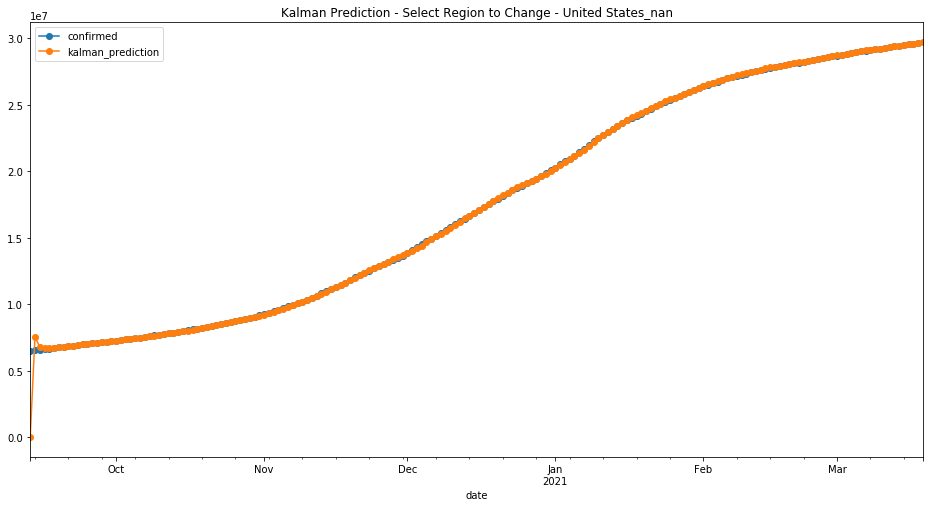

In [42]:
# Select region
region='United States_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

         region           mse           rmse           mae
213  Russia_nan  1.031236e+11  321128.584081  26414.614973


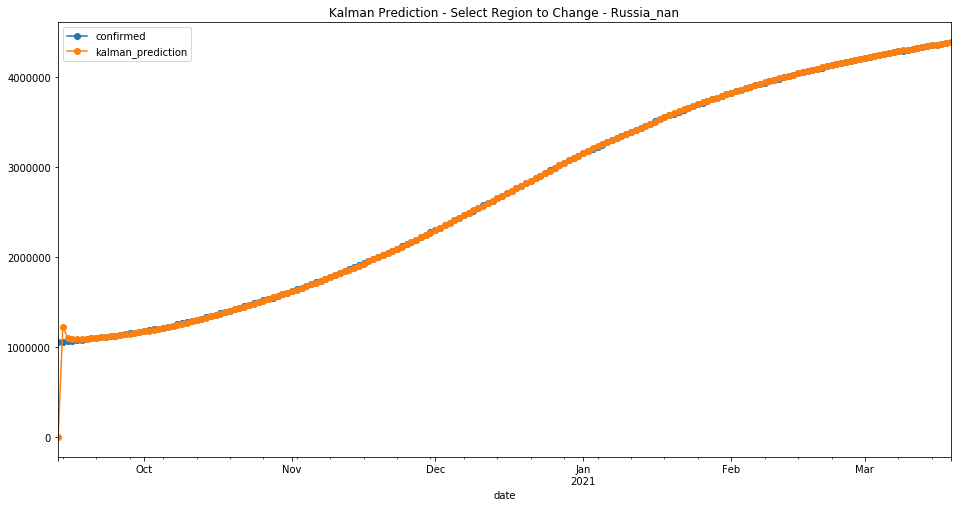

In [43]:
# Select region
region='Russia_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

        region           mse           rmse           mae
30  Brazil_nan  7.520700e+11  867219.694604  85222.203209


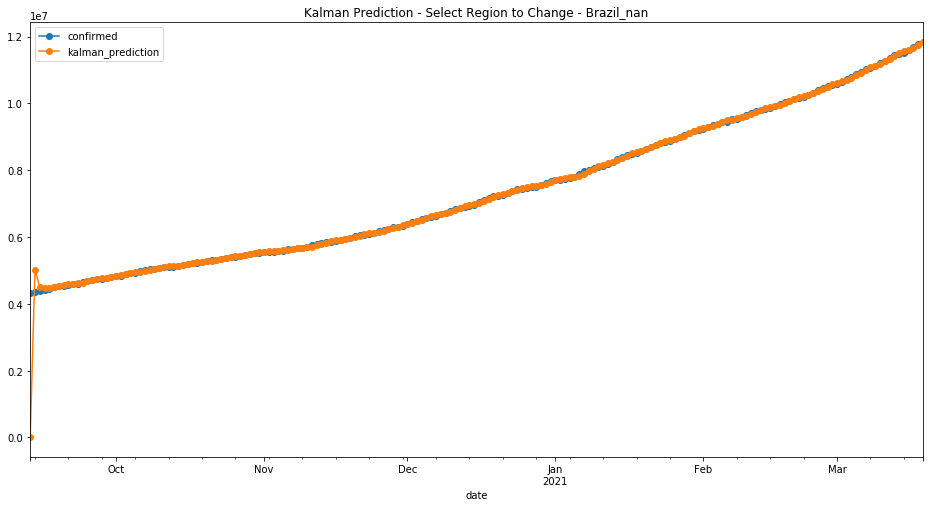

In [44]:
# Select region
region='Brazil_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

                 region           mse           rmse          mae
263  United Kingdom_nan  9.831317e+10  313549.304319  28705.59893


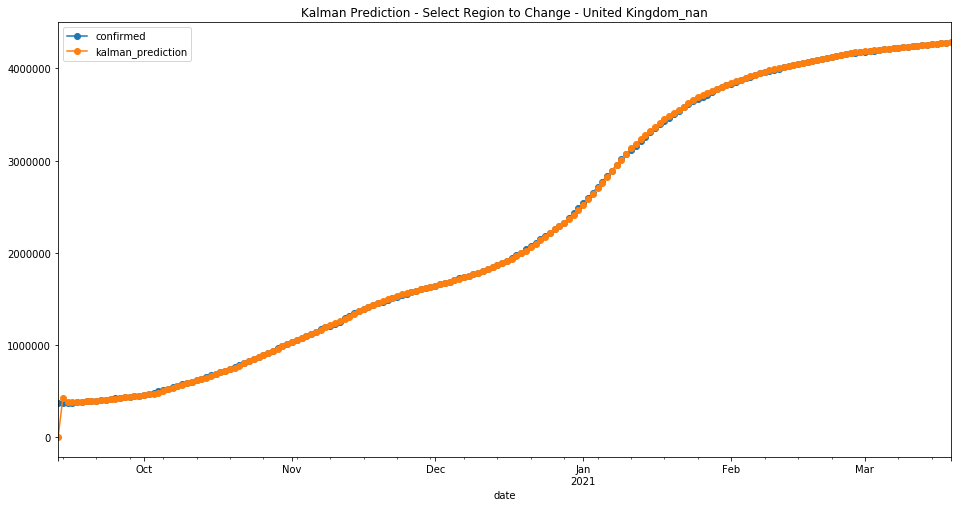

In [45]:
# Select region
region='United Kingdom_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

## Regression - 1 Day Prediction

In [46]:
#!pip install h2o
import h2o
from h2o.estimators import H2ORandomForestEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch
h2o.init(min_mem_size='3G')
import numpy as np
from sklearn.linear_model import LinearRegression

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.10" 2021-01-19; OpenJDK Runtime Environment (build 11.0.10+9-Ubuntu-0ubuntu1.18.04); OpenJDK 64-Bit Server VM (build 11.0.10+9-Ubuntu-0ubuntu1.18.04, mixed mode)
  Starting server from /home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp6269hasx
  JVM stdout: /tmp/tmp6269hasx/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp6269hasx/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


--------------------------  ----------------------------------------
H2O cluster uptime:         01 secs
H2O cluster timezone:       Etc/GMT
H2O data parsing timezone:  UTC
H2O cluster version:        3.22.0.1
H2O cluster version age:    2 years, 4 months and 20 days !!!
H2O cluster name:           H2O_from_python_unknownUser_xfvrfw
H2O cluster total nodes:    1
H2O cluster free memory:    3.543 Gb
H2O cluster total cores:    8
H2O cluster allowed cores:  8
H2O cluster status:         accepting new members, healthy
H2O connection url:         http://127.0.0.1:54321
H2O connection proxy:
H2O internal security:      False
H2O API Extensions:         XGBoost, Algos, AutoML, Core V3, Core V4
Python version:             3.7.7 final
--------------------------  ----------------------------------------

In [47]:

train=train.fillna(0)

########################################################

### Joao - Training  progression - When growth happened 2020/03/05 to 2020/04/12
### Joao - FIX - Refresh this daily forward

### Old Fixed manual ### Last run 17April2020
##
#train_df=train[train['date']>'2020-03-04']
#train_df=train[train['date']<'2020-04-16']
#boots=train_df[train_df['date']>='2020-04-08'] # some bootstrap to give more weight for recent days
#train_df=train_df.append([boots[boots['date']>='2020-04-12']]*1000,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
#region_to_train=my_train_list
#train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
#test=train[train['date']>='2020-04-03']
#test=test[test['date']<'2020-04-17']
#test_v2=test[test['region'].isin(region_to_train)]
#valid_v2=test_v2[test_v2['date']>='2020-04-16']

########################################################

# Set minimum of 14 training day 2weeks.
#
if number_past_days_training>=7 : 
    ntraindays=number_past_days_training 
else : 
    ntraindays=7
#
to_day=pd.to_datetime('today')
first_train_date=(to_day+pd.DateOffset(days=-ntraindays)).strftime('%Y-%m-%d') # ntraindays/7 weeks =ntraindays days training
last_train_date=(to_day+pd.DateOffset(days=-1)).strftime('%Y-%m-%d')
first_bootstrap_date=(to_day+pd.DateOffset(days=-9)).strftime('%Y-%m-%d')
boost_bootstrap_date=(to_day+pd.DateOffset(days=-4)).strftime('%Y-%m-%d')
first_test_date=(to_day+pd.DateOffset(days=-10)).strftime('%Y-%m-%d')
last_test_date=to_day.strftime('%Y-%m-%d')
first_valid_date=(to_day+pd.DateOffset(days=-2)).strftime('%Y-%m-%d')

print('first_train_date=',first_train_date)
print('last_train_date=',last_train_date)
print('first_bootstrap_date=',first_bootstrap_date)
print('boost_bootstrap_date=',boost_bootstrap_date)
print('first_test_date=',first_test_date)
print('last_test_date=',last_test_date)
print('first_valid_date=',first_valid_date)

train_df=train[train['date']>first_train_date]
train_df=train[train['date']<last_train_date]
boots=train_df[train_df['date']>=first_bootstrap_date] # some bootstrap to give more weight for recent days
train_df=train_df.append([boots[boots['date']>=boost_bootstrap_date]]*5,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
region_to_train=my_train_list
train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
test=train[train['date']>first_test_date]
test=test[test['date']<=last_test_date]
test_v2=test[test['region'].isin(region_to_train)]
valid_v2=test_v2[test_v2['date']>=first_valid_date]


first_train_date= 2021-02-20
last_train_date= 2021-03-18
first_bootstrap_date= 2021-03-10
boost_bootstrap_date= 2021-03-15
first_test_date= 2021-03-09
last_test_date= 2021-03-19
first_valid_date= 2021-03-17


In [48]:
x_col=[#'region',
            '1_day_change', '3_day_change','7_day_change',
            '1_day_change_rate', 
            '3_day_change_rate',
            '7_day_change_rate', 
            'last_day',
            'min', 'max',
            'infected_rate',
            'kalman_prediction'
          #  ,'population_percent_infected_rate_confirmed'
          #  ,'delta_new_cases'
          #  ,'delta_new_cases_per_1M_hab'
          ]

In [49]:
x=train_df[x_col]
y=train_df['confirmed']
reg = LinearRegression().fit(x,y)

pred2=reg.predict(test[x_col]); pred2=pd.DataFrame(pred2); pred2=round(pred2)
pred2['confirmed']=test['confirmed'].values; pred2['date']=test['date'].values; pred2['region']=test['region'].values


In [50]:
pred2.iloc[:25]

0  confirmed       date           region
0    56076.0      55894 2021-03-10  Afghanistan_nan
1    56090.0      55917 2021-03-11  Afghanistan_nan
2    56108.0      55959 2021-03-12  Afghanistan_nan
3    56146.0      55959 2021-03-13  Afghanistan_nan
4    56158.0      55985 2021-03-14  Afghanistan_nan
5    56180.0      55985 2021-03-15  Afghanistan_nan
6    56185.0      55995 2021-03-16  Afghanistan_nan
7    56193.0      56016 2021-03-17  Afghanistan_nan
8    56207.0      56044 2021-03-18  Afghanistan_nan
9    56232.0          0 2021-03-19  Afghanistan_nan
10  115035.0     114840 2021-03-10      Albania_nan
11  115638.0     115442 2021-03-11      Albania_nan
12  116209.0     116123 2021-03-12      Albania_nan
13  116849.0     116821 2021-03-13      Albania_nan
14  117512.0     117474 2021-03-14      Albania_nan
15  118159.0     118017 2021-03-15      Albania_nan
16  118706.0     118492 2021-03-16      Albania_nan
17  119180.0     118938 2021-03-17      Albania_nan
18  119607.0     119528 2021-03-18      Albania_nan
19  120152.0          0 2021-03-19      Albania_nan
20  114851.0     114681 2021-03-10      Algeria_nan
21  114987.0     114851 2021-03-11      Algeria_nan
22  115153.0     115008 2021-03-12      Algeria_nan
23  115308.0     115143 2021-03-13      Algeria_nan
24  115447.0     115265 2021-03-14      Algeria_nan

In [51]:
pred2.iloc[175:195]

0  confirmed       date          region
175  240838.0     240671 2021-03-15  Azerbaijan_nan
176  241268.0     241651 2021-03-16  Azerbaijan_nan
177  242297.0     242491 2021-03-17  Azerbaijan_nan
178  243121.0     243424 2021-03-18  Azerbaijan_nan
179  244134.0          0 2021-03-19  Azerbaijan_nan
180    8711.0       8642 2021-03-10     Bahamas_nan
181    8819.0       8642 2021-03-11     Bahamas_nan
182    8824.0       8658 2021-03-12     Bahamas_nan
183    8791.0       8658 2021-03-13     Bahamas_nan
184    8830.0       8658 2021-03-14     Bahamas_nan
185    8830.0       8765 2021-03-15     Bahamas_nan
186    8676.0       8776 2021-03-16     Bahamas_nan
187    8941.0       8800 2021-03-17     Bahamas_nan
188    8953.0       8800 2021-03-18     Bahamas_nan
189    8993.0          0 2021-03-19     Bahamas_nan
190  128359.0     128428 2021-03-10     Bahrain_nan
191  128992.0     129081 2021-03-11     Bahrain_nan
192  129627.0     129825 2021-03-12     Bahrain_nan
193  130372.0     130404 2021-03-13     Bahrain_nan
194  130970.0     131001 2021-03-14     Bahrain_nan

In [52]:
pred2.iloc[220:240]

0  confirmed       date       region
220  298760.0     298123 2021-03-10  Belarus_nan
221  299310.0     298960 2021-03-11  Belarus_nan
222  300125.0     300146 2021-03-12  Belarus_nan
223  301230.0     301328 2021-03-13  Belarus_nan
224  302345.0     302323 2021-03-14  Belarus_nan
225  303328.0     303270 2021-03-15  Belarus_nan
226  304294.0     304146 2021-03-16  Belarus_nan
227  305185.0     305270 2021-03-17  Belarus_nan
228  306299.0     306524 2021-03-18  Belarus_nan
229  307528.0          0 2021-03-19  Belarus_nan
230  793652.0     794605 2021-03-10  Belgium_nan
231  797007.0     798108 2021-03-11  Belgium_nan
232  800396.0     801723 2021-03-12  Belgium_nan
233  804160.0     805321 2021-03-13  Belgium_nan
234  807996.0     808283 2021-03-14  Belgium_nan
235  811155.0     809861 2021-03-15  Belgium_nan
236  812796.0     813026 2021-03-16  Belgium_nan
237  816190.0     818142 2021-03-17  Belgium_nan
238  821280.0     822801 2021-03-18  Belgium_nan
239  825855.0          0 2021-03-19  Belgium_nan

In [53]:
#
train_h20 = h2o.H2OFrame(train_df)
###train_h20_hubei = h2o.H2OFrame(train_df_hubei) # different model for Hubei
#
### Joao - Italian Model
train_h20_v2 = h2o.H2OFrame(train_df_v2) # different model for V2 region ### Spain This time


test_h20 = h2o.H2OFrame(test)
#test_h20_hubei = h2o.H2OFrame(test_hubei)
test_h20_v2 = h2o.H2OFrame(test_v2)

valid_h20_v2=h2o.H2OFrame(valid_v2)

#training_columns = ['region','1_day_change', '3_day_change', '7_day_change','1_day_change_rate','3_day_change_rate','7_day_change_rate','last_day', 'kalman_prediction','infected_rate', 'min', 'max']
training_cols_v2 = ['region']+x_col #+['population_percent_infected_rate_confirmed','delta_new_cases','delta_new_cases_per_1M_hab']
training_columns = training_cols_v2

# Output parameter train against input parameters
response_column = 'confirmed'

# model = H2ORandomForestEstimator(ntrees=300, max_depth=12)
# model.train(x=training_columns, y=response_column, training_frame=train_h20)

###model_hubei = H2ORandomForestEstimator(ntrees=300, max_depth=12)
###model_hubei.train(x=training_columns, y=response_column, training_frame=train_h20_hubei)

### Joao - Model V2
model_v2 = H2ORandomForestEstimator(ntrees=500, max_depth=23)
model_v2.train(x=training_columns, y=response_column, training_frame=train_h20_v2, validation_frame=valid_h20_v2)


/home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/utils/shared_utils.py:177: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data = _handle_python_lists(python_obj.as_matrix().tolist(), -1)[1]


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%


In [54]:
#Print Model

print('# MSE on the training data = ',model_v2.mse())
print('# MSE on the validation data = ',model_v2.mse(valid=True))
print('# R^2 on the training data = ',model_v2.r2())
print('# R^2 on the validation data = ',model_v2.r2(valid=True))

# MSE on the training data =  6134134385.247471
# MSE on the validation data =  11509570475146.188
# R^2 on the training data =  0.9995627724506589
# R^2 on the validation data =  0.4207351528443888


In [55]:
model_v2.show()

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1616136059834_1


ModelMetricsRegression: drf
** Reported on train data. **

MSE: 6134134385.247471
RMSE: 78320.7149178777
MAE: 7596.17208609431
RMSLE: 0.21279695651768987
Mean Residual Deviance: 6134134385.247471

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 11509570475146.188
RMSE: 3392575.787679059
MAE: 872119.9931788187
RMSLE: 7.562961792106645
Mean Residual Deviance: 11509570475146.188
Scoring History: 


timestamp            duration    number_of_trees    training_rmse       training_mae        training_deviance    validation_rmse     validation_mae     validation_deviance
---  -------------------  ----------  -----------------  ------------------  ------------------  -------------------  ------------------  -----------------  ---------------------
     2021-03-19 06:41:07  0.108 sec   0.0                nan                 nan                 nan                  nan                 nan                nan
     2021-03-19 06:41:07  0.573 sec   1.0                128034.46569187488  17049.34379074224   16392824405.003887   3331703.091161024   835610.8399493244  11100245487651.922
     2021-03-19 06:41:07  0.965 sec   2.0                161613.20389879914  21938.20522440893   26118827674.434822   3346425.967224783   839113.8503544267  11198566754116.324
     2021-03-19 06:41:08  1.190 sec   3.0                131226.6518020166   19526.11921979828   17220434143.167706   3345625.544509669   839932.5232108177  11193210284075.62
     2021-03-19 06:41:08  1.272 sec   4.0                185819.68990919058  20642.412116661184  34528957157.94774    3350019.6991332066  844883.4512267585  11222631984580.541
---  ---                  ---         ---                ---                 ---                 ---                  ---                 ---                ---
     2021-03-19 06:41:19  12.170 sec  195.0              82696.44991398006   8025.887544864503   6838702828.375412    3382186.6696752184  871883.324009675   11439186668528.746
     2021-03-19 06:41:23  16.172 sec  284.0              80999.91166837263   7966.095257477808   6560985690.284168    3385101.530257738   873953.4835536402  11458912370153.281
     2021-03-19 06:41:27  20.190 sec  372.0              79792.85662925431   7771.896903926251   6366899969.056733    3391257.2829084764  874848.0677898302  11500625958879.781
     2021-03-19 06:41:31  24.236 sec  458.0              78395.6024100395    7594.3191017409745  6145870477.232991    3388644.7187909563  871221.5800978652  11482913030189.84
     2021-03-19 06:41:33  26.365 sec  500.0              78320.7149178777    7596.17208609431    6134134385.247471    3392575.787679059   872119.9931788187  11509570475146.188


See the whole table with table.as_data_frame()
Variable Importances: 


variable           relative_importance    scaled_importance    percentage
-----------------  ---------------------  -------------------  ------------
last_day           1.53739e+19            1                    0.341335
kalman_prediction  1.222e+19              0.794857             0.271312
region             6.86104e+18            0.44628              0.152331
7_day_change       3.53889e+18            0.230189             0.0785715
3_day_change       2.35836e+18            0.1534               0.0523609
infected_rate      1.70856e+18            0.111134             0.037934
1_day_change       1.22785e+18            0.0798659            0.027261
max                8.79615e+17            0.057215             0.0195294
min                6.066e+17              0.0394566            0.0134679
7_day_change_rate  1.31503e+17            0.00855365           0.00291966
3_day_change_rate  8.14891e+16            0.0053005            0.00180924
1_day_change_rate  5.26529e+16            0.00342483           0.00116901

In [56]:
#model_hubei.varimp(True).iloc[:,:] # Feature importance for Hubei Model RF
### Joao -  Model V2
modlv2=model_v2.varimp(True).iloc[:,:] # Feature importance for Model V2 Global RF
modlv2.sort_values('percentage',ascending=False)

variable  relative_importance  scaled_importance  percentage
0            last_day         1.537385e+19           1.000000    0.341335
1   kalman_prediction         1.222002e+19           0.794857    0.271312
2              region         6.861039e+18           0.446280    0.152331
3        7_day_change         3.538892e+18           0.230189    0.078571
4        3_day_change         2.358355e+18           0.153400    0.052361
5       infected_rate         1.708562e+18           0.111134    0.037934
6        1_day_change         1.227847e+18           0.079866    0.027261
7                 max         8.796147e+17           0.057215    0.019529
8                 min         6.066002e+17           0.039457    0.013468
9   7_day_change_rate         1.315025e+17           0.008554    0.002920
10  3_day_change_rate         8.148910e+16           0.005300    0.001809
11  1_day_change_rate         5.265286e+16           0.003425    0.001169

In [57]:
## Joao - Model Predictions - Country_nan _v2
performance = model_v2.model_performance(test_data=test_h20_v2)
# # Model Create Predictions
pred=model_v2.predict(test_h20_v2);pred=pred.as_data_frame(); pred=round(pred)
# #pred['daily_outcome']=test['daily_outcome'].values
pred['confirmed']=test_v2['confirmed'].values
pred['date']=test_v2['date'].values
pred['region']=test_v2['region'].values

drf prediction progress: |████████████████████████████████████████████████| 100%


## Correlation Matrix And Temperature

Correlation Matrix


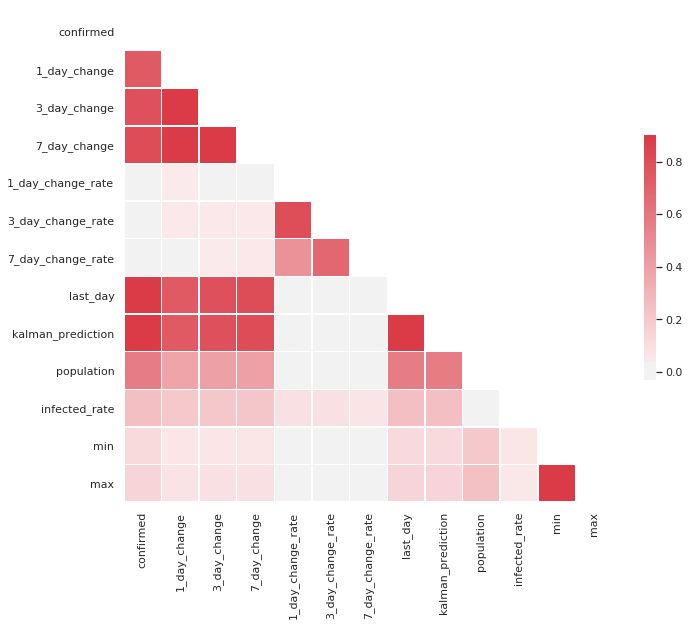

In [58]:
from string import ascii_letters
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
# Compute the correlation matrix
corr = train.iloc[:,2:].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
print ('Correlation Matrix')

In [59]:
print('Correlation To Confirmed') 
print (corr.confirmed)

Correlation To Confirmed
confirmed            1.000000
1_day_change         0.742974
3_day_change         0.785863
7_day_change         0.806974
1_day_change_rate    0.023156
3_day_change_rate    0.021457
7_day_change_rate    0.014385
last_day             0.992929
kalman_prediction    0.993413
population           0.572116
infected_rate        0.249665
min                  0.120609
max                  0.142389
Name: confirmed, dtype: float64


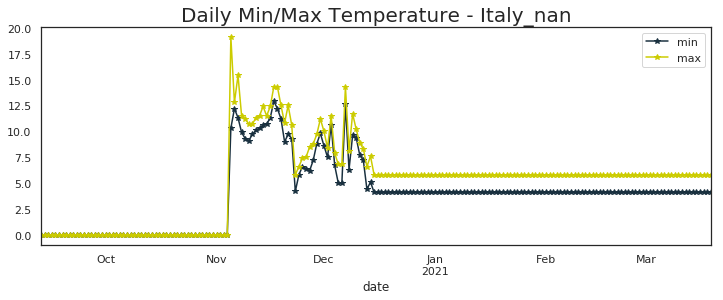

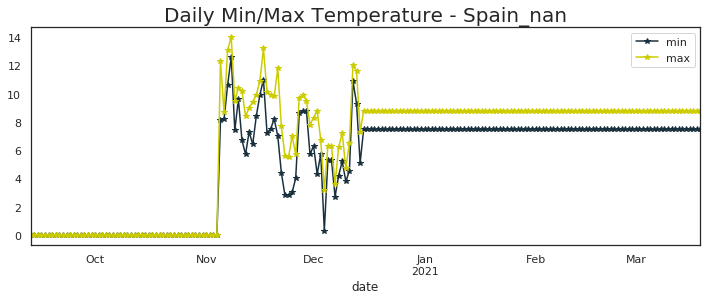

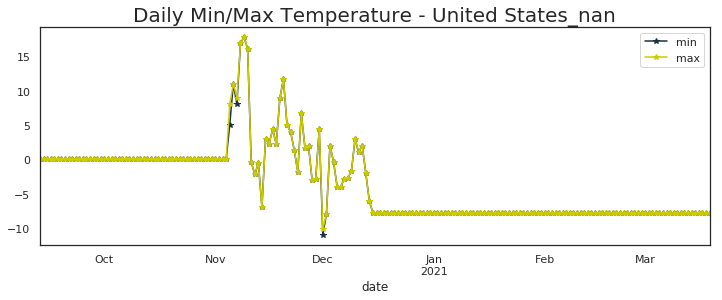

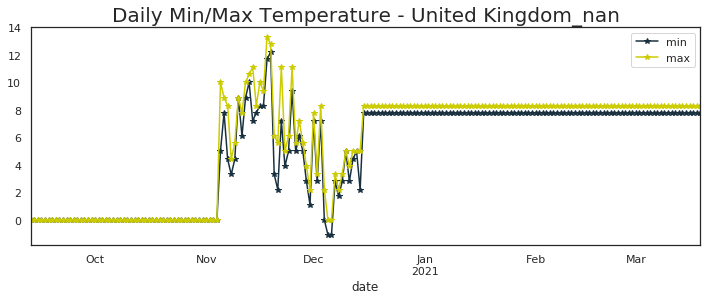

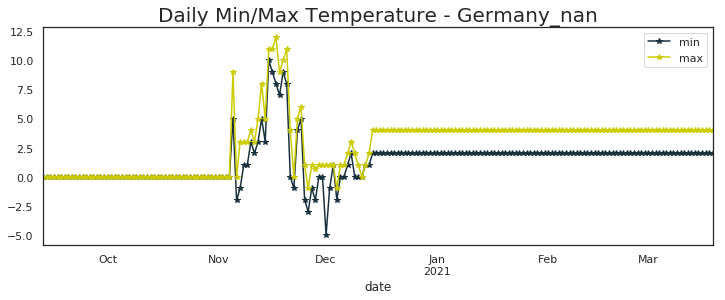

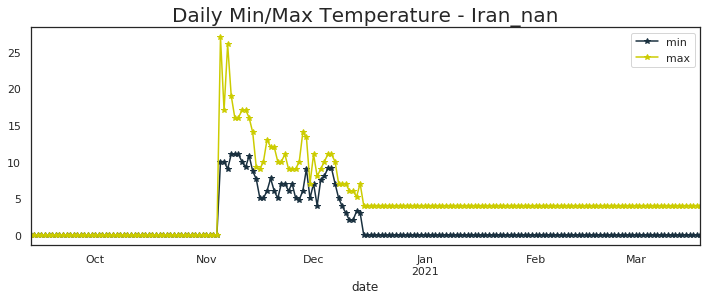

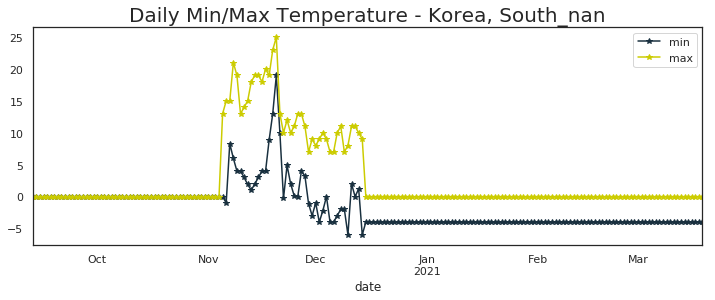

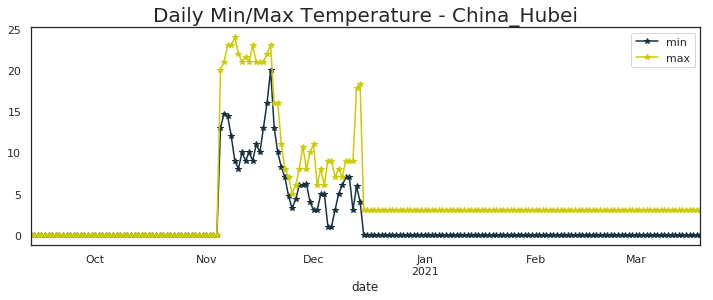

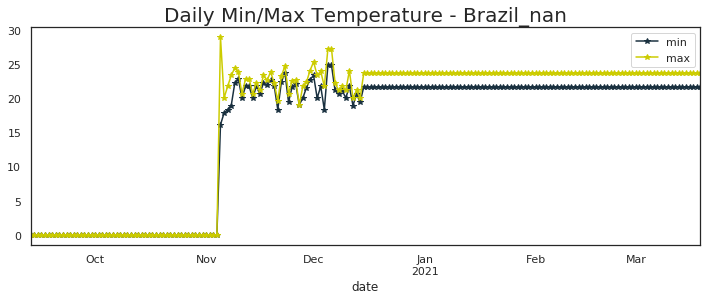

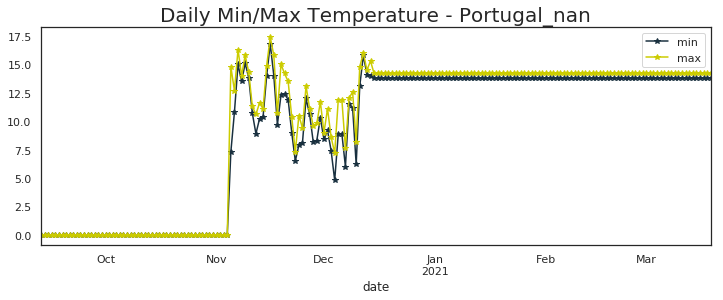

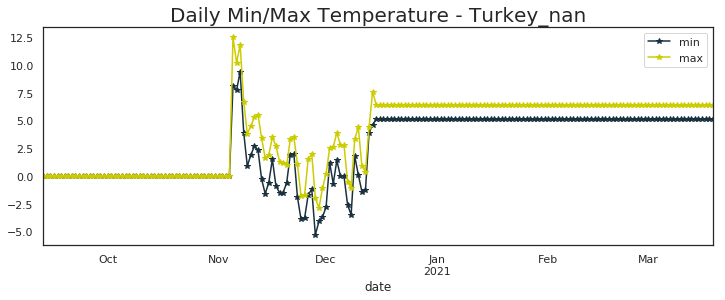

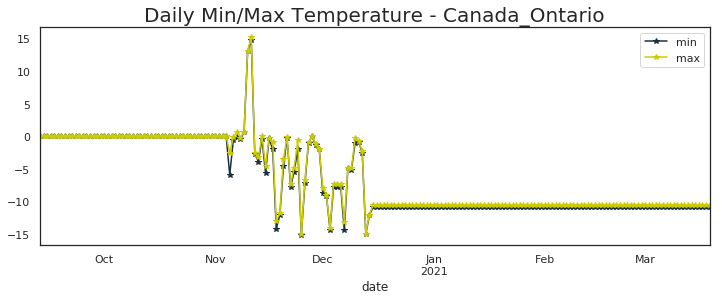

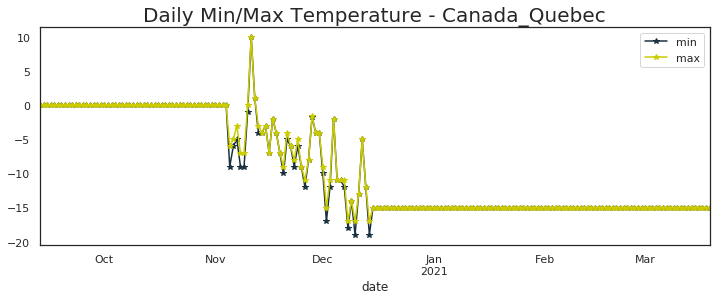

In [60]:
import matplotlib.pyplot as plt
p=train[['date','region','min','max']].set_index('date')
#
#rg1='China_Hubei'
#p=p[p['region']==rg1]
#p.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+rg1,fontdict={'fontsize': 20})
#
## JOAO - Temp. Teast Italy - Data Supply finishes 13/03/2020
region_s=['Italy_nan','Spain_nan','United States_nan','United Kingdom_nan','Germany_nan','Iran_nan',
          'Korea, South_nan','China_Hubei','Brazil_nan','Portugal_nan','Turkey_nan',
          'Canada_Ontario','Canada_Quebec']
p=train[['date','region','min','max']].set_index('date')
for i in range(0,len(region_s)):     
    pv=p[p['region']==region_s[i]]
    pv.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+region_s[i],fontdict={'fontsize': 20})
#

In [61]:
avg_temp=train[['region','confirmed','min','max']]  # from 20-02-20 to 06-04-2020
avg_temp=avg_temp.groupby(by='region').max()
avg_temp=avg_temp.sort_values('confirmed',ascending=False)
print( 'Most infected Areas Avg Temperature')
print(avg_temp.iloc[:100,1:])

Most infected Areas Avg Temperature
                             min   max
region                                
United States_nan           17.8  17.8
Brazil_nan                  24.8  28.9
India_nan                   22.0  31.0
Russia_nan                   0.0   4.0
United Kingdom_nan          12.2  13.3
France_nan                  12.1  13.3
Italy_nan                   12.9  19.1
Spain_nan                   12.6  14.0
Turkey_nan                   9.4  12.5
Germany_nan                 10.0  12.0
Colombia_nan                 0.0   0.0
Argentina_nan                0.0   0.0
Mexico_nan                  15.1  15.1
Poland_nan                   8.9  10.6
Iran_nan                    11.0  27.0
Ukraine_nan                  0.0   0.0
South Africa_nan             0.0   0.0
Indonesia_nan                0.0   0.0
Czechia_nan                  0.0   0.0
Peru_nan                    24.6  29.9
Netherlands_nan             14.4  16.1
Chile_nan                   18.0  22.0
Romania_nan                 

### Kalman X Days Ahead Prediction

In [62]:
%%R

#install.packages('reshape')

NULL


In [63]:
%%R

require(pracma)
require(Metrics)
require(readr)
library(reshape)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL

### JOAO - FIX
#
### Flexy Days maximum forward prediction =A Hint!= "Error increases as number of days increases"
days_prediction<-max_days_prediction # Set i days prediction # max_days_prediction=90 days forward prediction with Kalman Filter

for (i in 1: days_prediction) { 
  if( i>1) {all<-all_new}
  date<-all[,1]
  date[nrow(date) + 1,1] <-all[nrow(all),1]+1
  pred_all<-NULL
  for (n in 2:ncol(all)-1) {
    Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
    sig_w<-0.01
    w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
    sig_v<-0.01
    v<-sig_v*randn(1,100)  
    t<-0.45
    phi<-matrix(c(1,0,t,1),2,2)
    gama<-matrix(c(0.5*t^2,t),2,1)
    H<-matrix(c(1,0),1,2)
    #Kalman
    x0_0<-p0_0<-matrix(c(0,0),2,1)
    p0_0<-matrix(c(1,0,0,1),2,2)
    Q<-0.01
    R<-0.01
    X<-NULL
    X2<-NULL
    pred<-NULL
    for (i in 0:nrow(all)) {
      namp <-paste("p", i+1,"_",i, sep = "")
      assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
      namk <- paste("k", i+1, sep = "")
      assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
      namx <- paste("x", i+1,"_",i, sep = "")
      assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
      namE <- paste("E", i+1, sep = "")
      assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
      namx2 <- paste("x", i+1,"_",i+1, sep = "")
      assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
      namp2 <- paste("p", i+1,"_",i+1, sep = "")
      assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
      X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
      X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
      if(i>2){
        remove(list=(paste("p", i-1,"_",i-2, sep = "")))
        remove(list=(paste("k", i-1, sep = "")))
        remove(list=(paste("E", i-1, sep = "")))
        remove(list=(paste("p", i-2,"_",i-2, sep = "")))
        remove(list=(paste("x", i-1,"_",i-2, sep = "")))
        remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
    } 
    pred<-NULL
    pred<-cbind(Y,X,round(X2,4))
    pred<-as.data.frame(pred)
    pred$region<-colnames(all[,n+1])
    pred$date<-date$date
    pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
    pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
    pred$pred_rate<-(pred$X/pred$Y-1)*100
    pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
    pred_all<-rbind(pred_all,pred)
  }
  pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
  names(pred_all)[5]<-"X2"
  pred_all<-pred_all[,1:5]
       
pred_all_today=pred_all[with( pred_all, order(region, date)), ]
all_new=all
#all_new[nrow(all_new),1]<-all_new[nrow(all),1]+1
temp<-with(pred_all_today, pred_all_today[date == all[nrow(all),1]+1, ])
temp<-cbind(temp[,1:2],temp[,4])
temp2<-reshape(temp, direction = "wide", idvar = "date", timevar = "region")
rand_num<-runif(ncol(temp2)-1, 0.9, 1.05)
temp2[,2:ncol(temp2)]<-temp2[,2:ncol(temp2)]*rand_num
colnames(temp2)=colnames(all_new)
all_new<-rbind(all_new,temp2)
all_new[,2:ncol(all_new)]<-round(all_new[,2:ncol(all_new)])
for (i in 2:ncol(all_new)) {
  all_new[nrow(all_new),i]=max(all_new[nrow(all_new)-1,i],all_new[nrow(all_new),i])}
}

── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  date = col_date(format = "")
)
ℹ Use `spec()` for the full column specifications.




In [64]:
all_new=%R all_new

In [65]:
all_new['date']=pd.to_datetime(all_new['date'],unit='d')

Text(0.5, 1.0, 'Kalman Prediction - Select Country/Region to Change - Spain_nan')

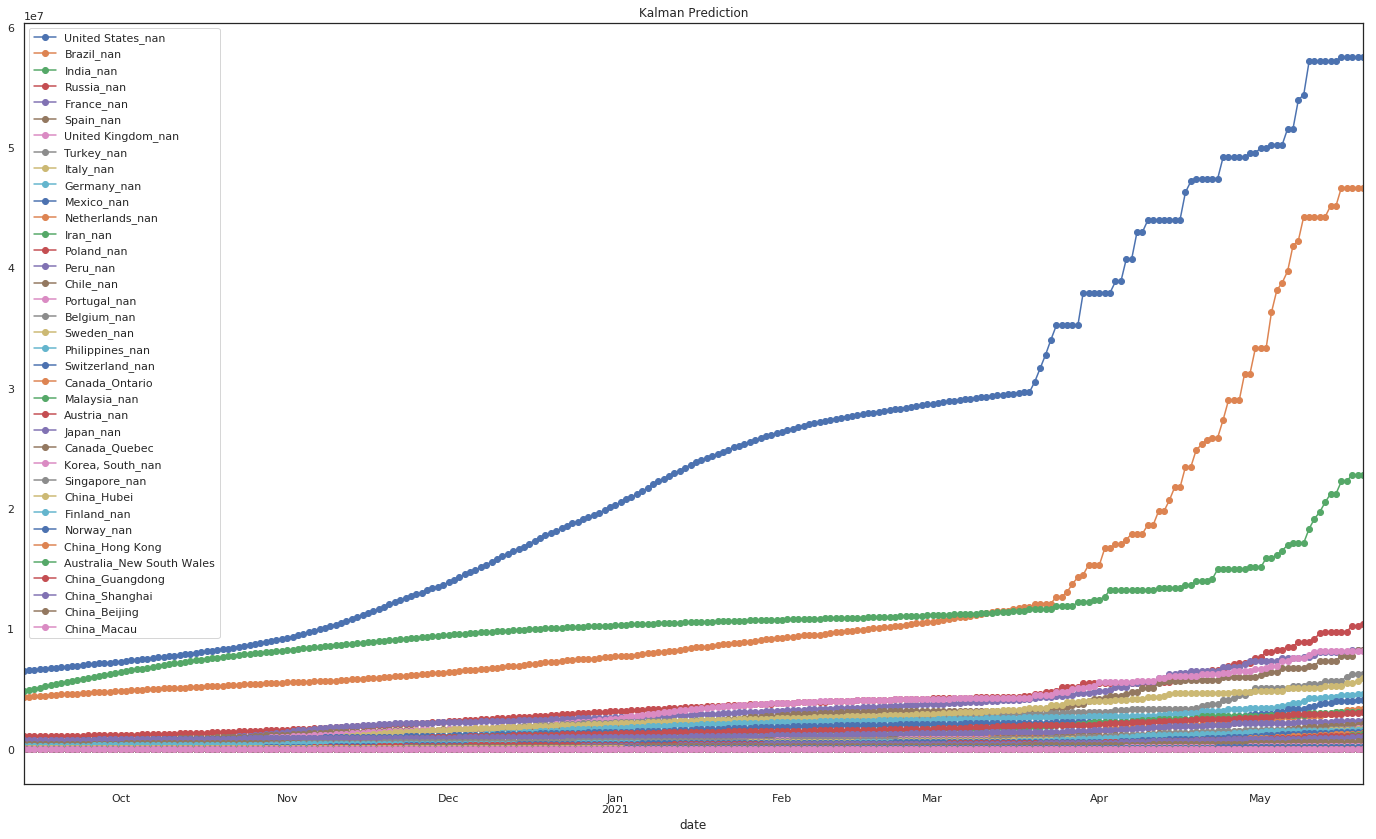

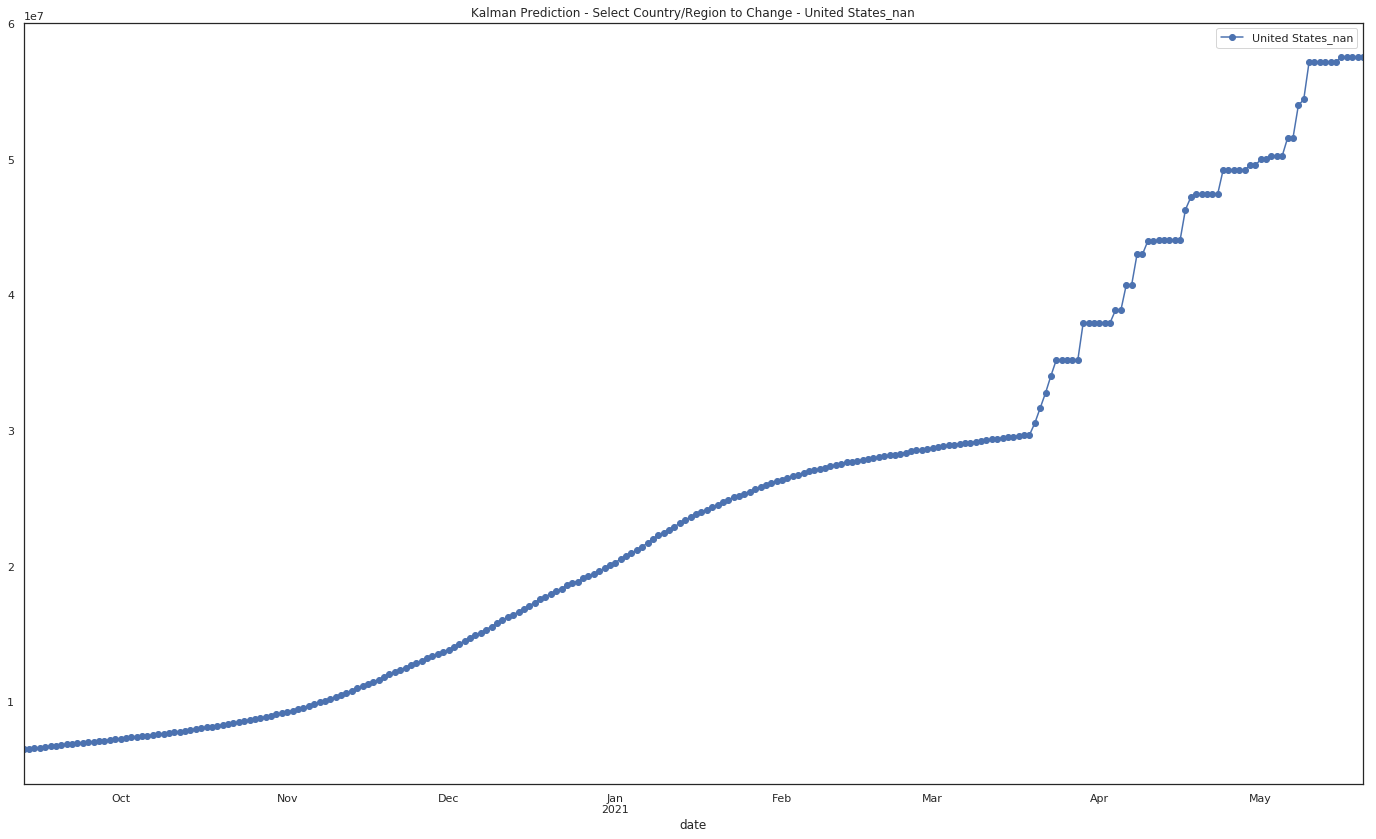

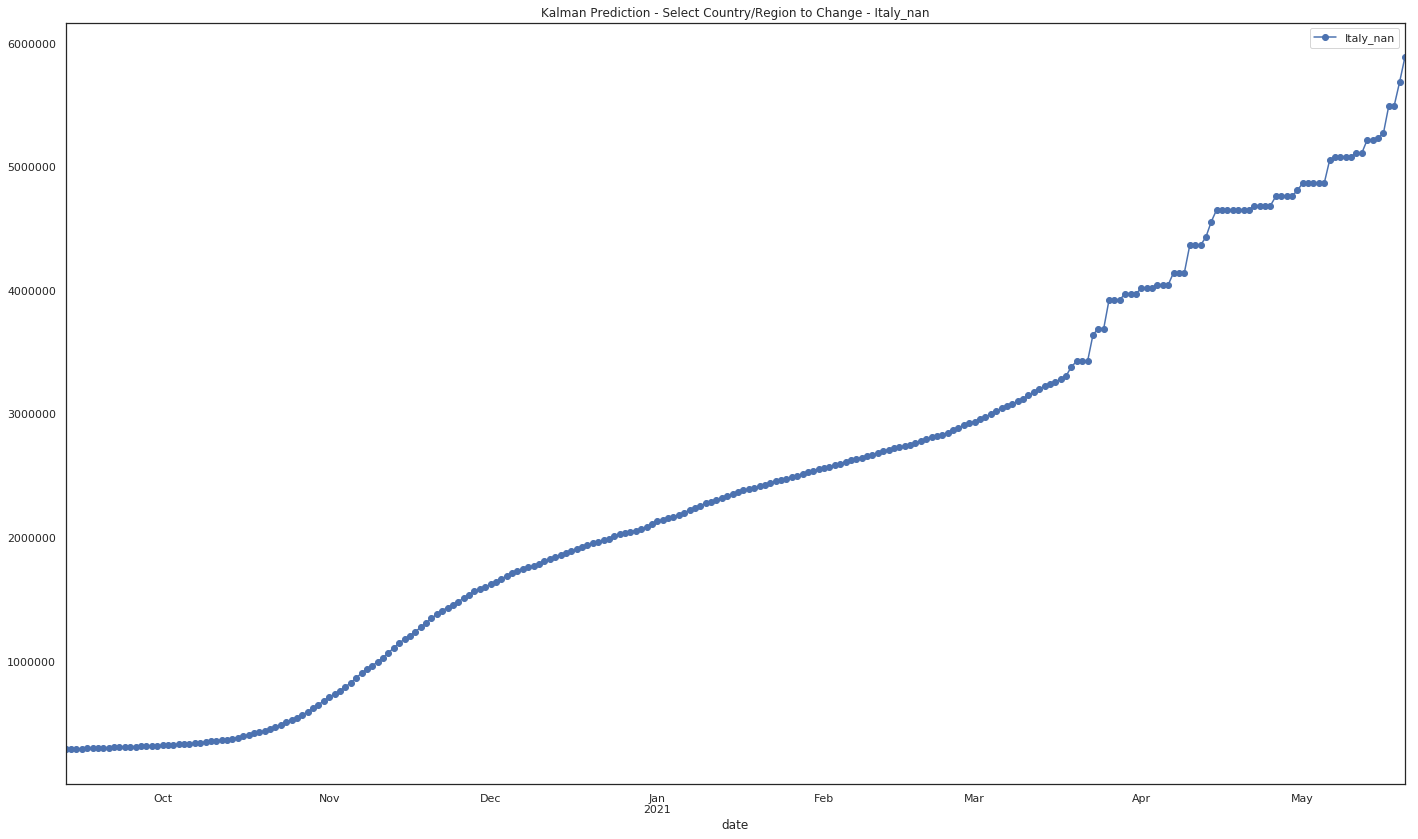

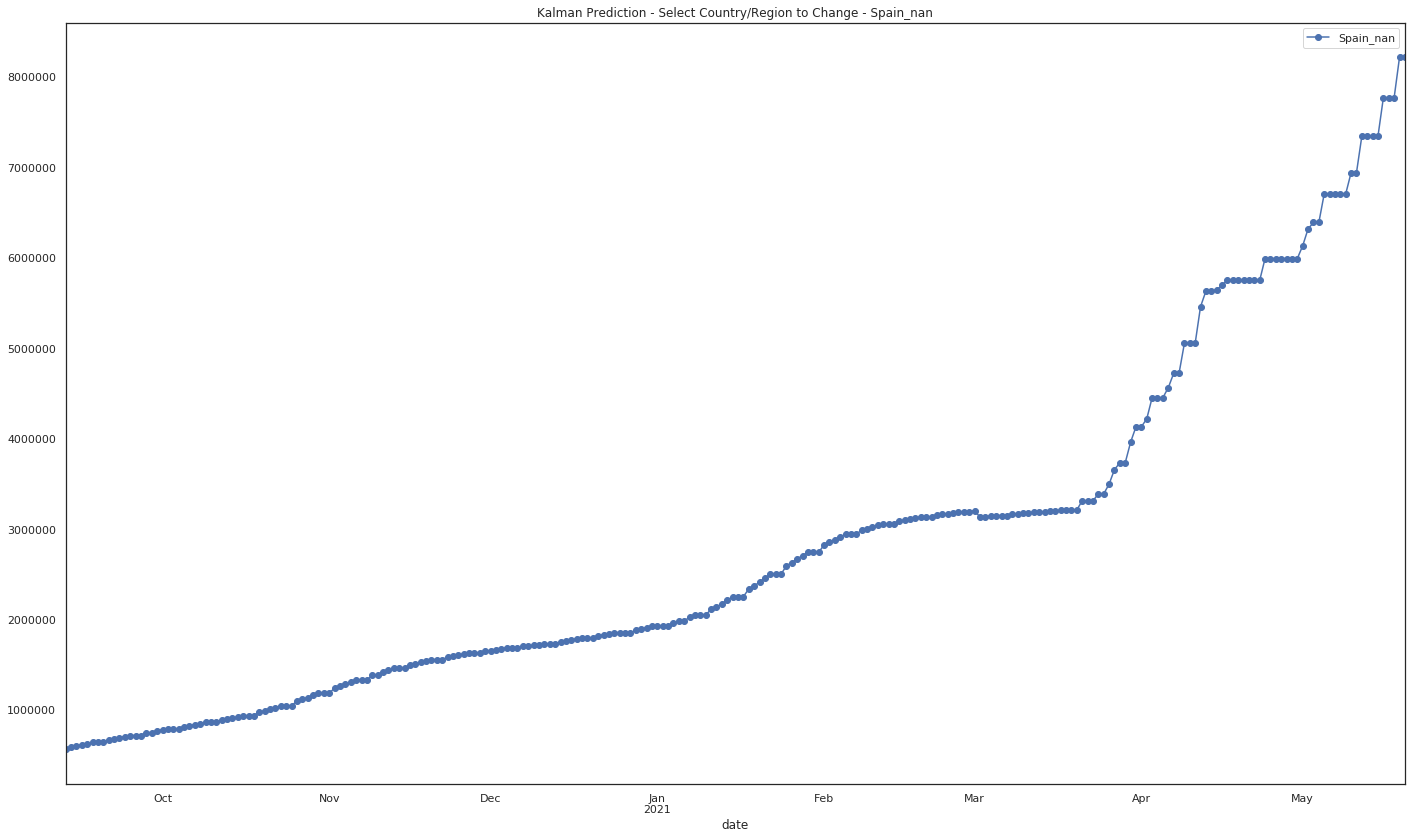

In [66]:
#
### Joao - Moving Forward ...
# Select regions From my_train_list
#
region=['date']+my_train_list
p_kalman=all_new[region]
#p=all_new
#p.iloc[len(p)-1,2]=None
p_kalman=p_kalman.set_index(['date'])
p_kalman=p_kalman.reindex(p_kalman.max().sort_values(ascending=False).index, axis=1)
p_kalman.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction')
#
p_kalman2=all_new[['date','United States_nan']] ## Joao
p_kalman2=p_kalman2.set_index(['date'])
p_kalman2.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman2.columns[0]))
#
p_kalman3=all_new[['date','Italy_nan']] ## Joao
p_kalman3=p_kalman3.set_index(['date'])
p_kalman3.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman3.columns[0]))
#
p_kalman4=all_new[['date','Spain_nan']] ## Joao
p_kalman4=p_kalman4.set_index(['date'])
p_kalman4.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman4.columns[0]))
#

/home/notebookuser/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


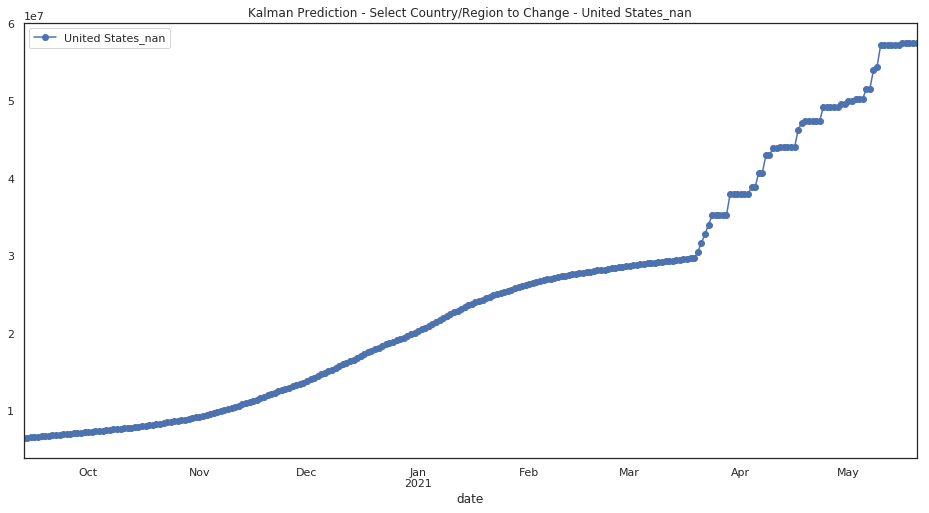

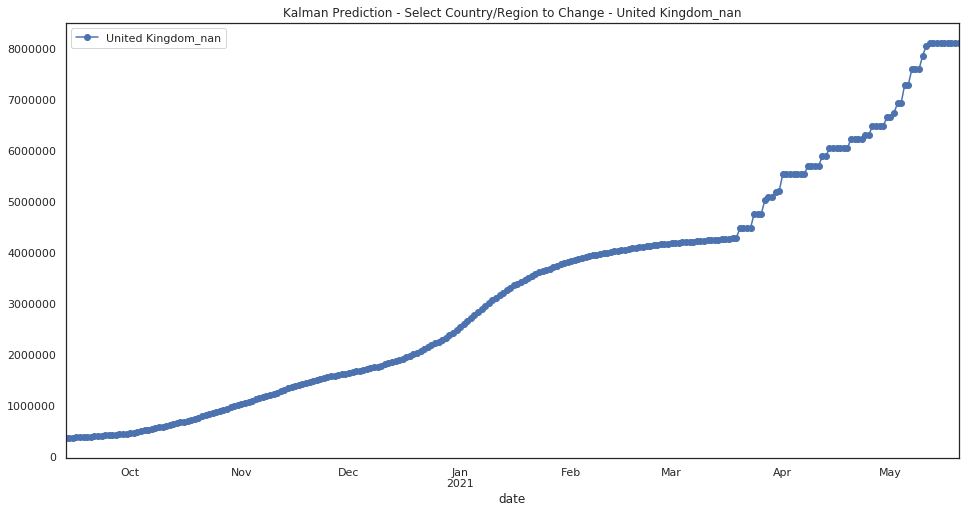

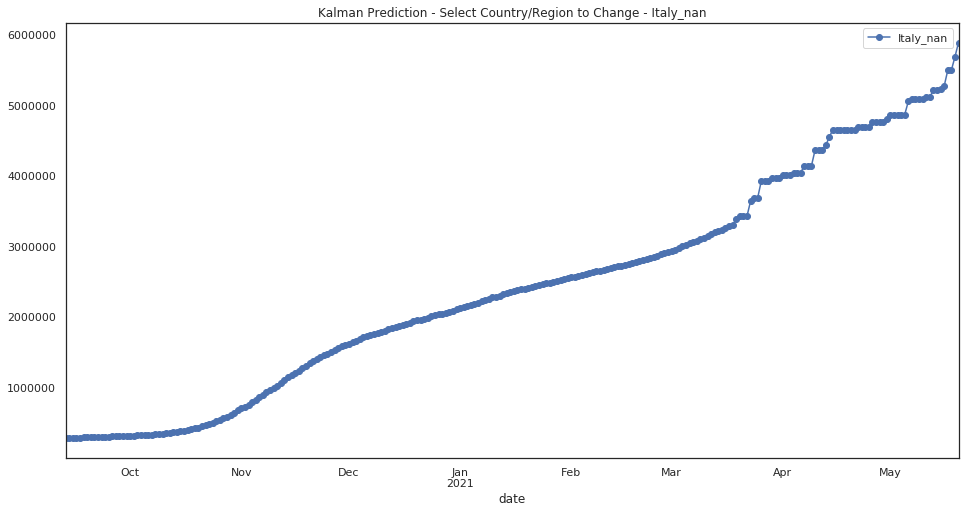

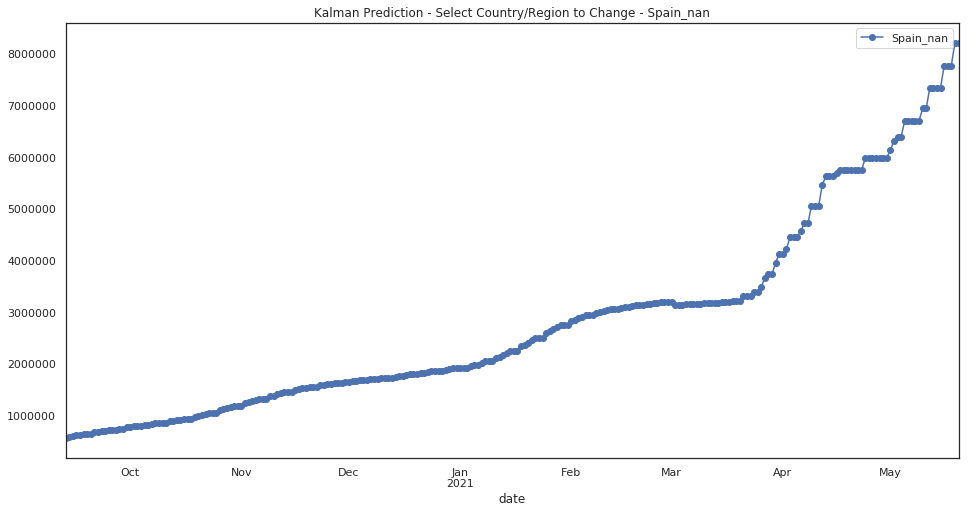

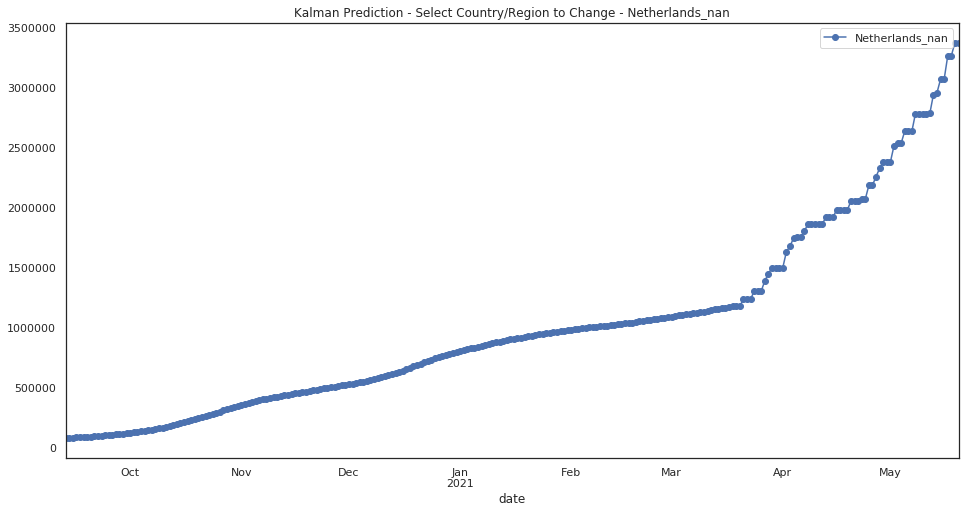

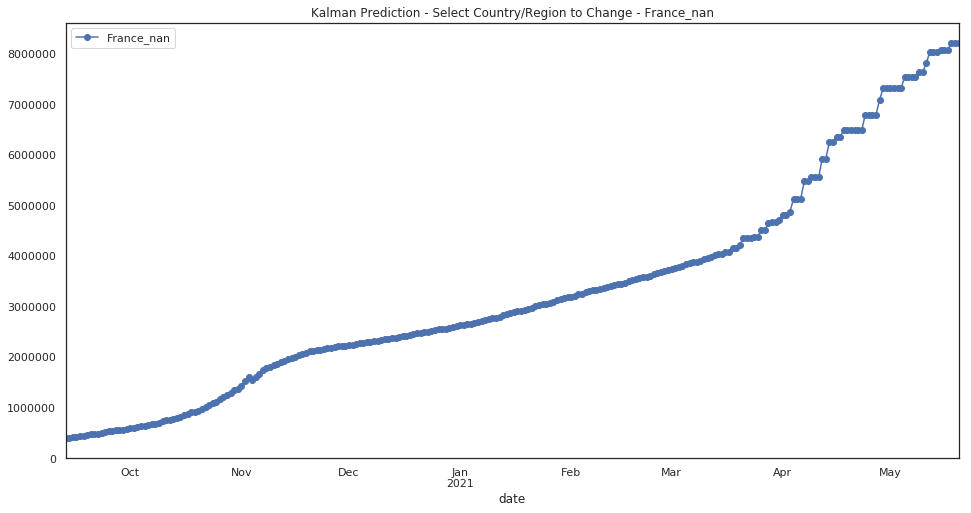

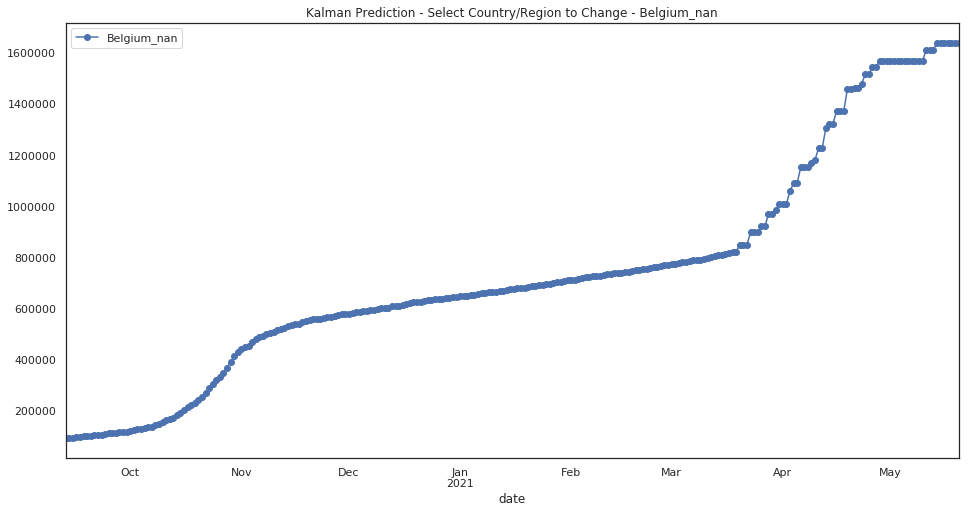

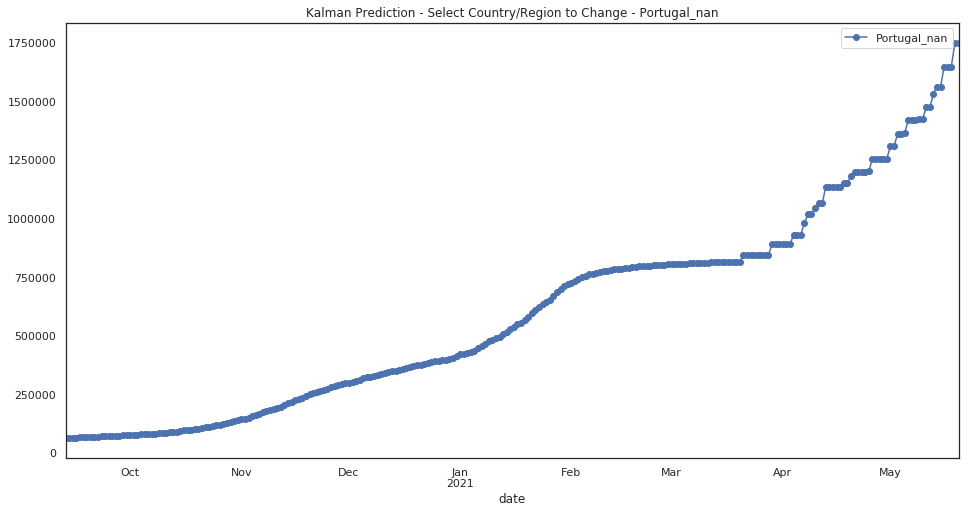

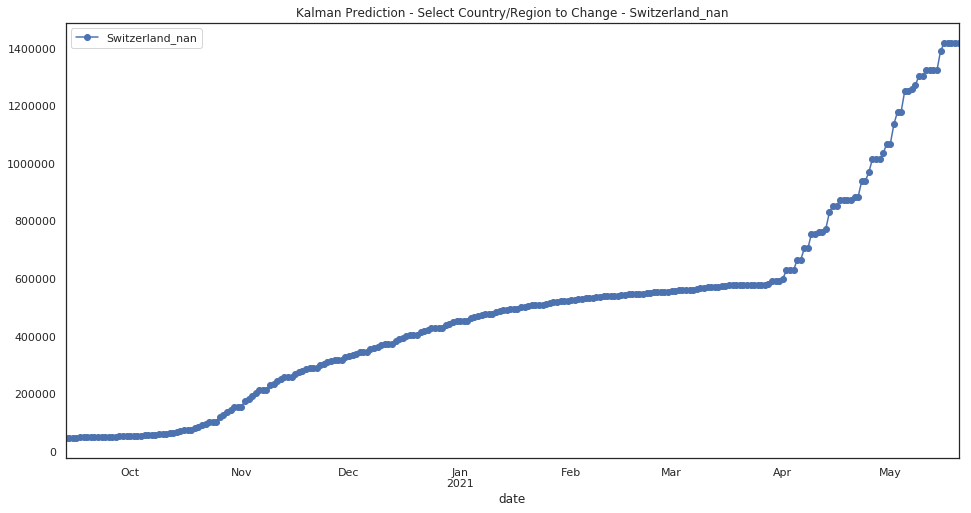

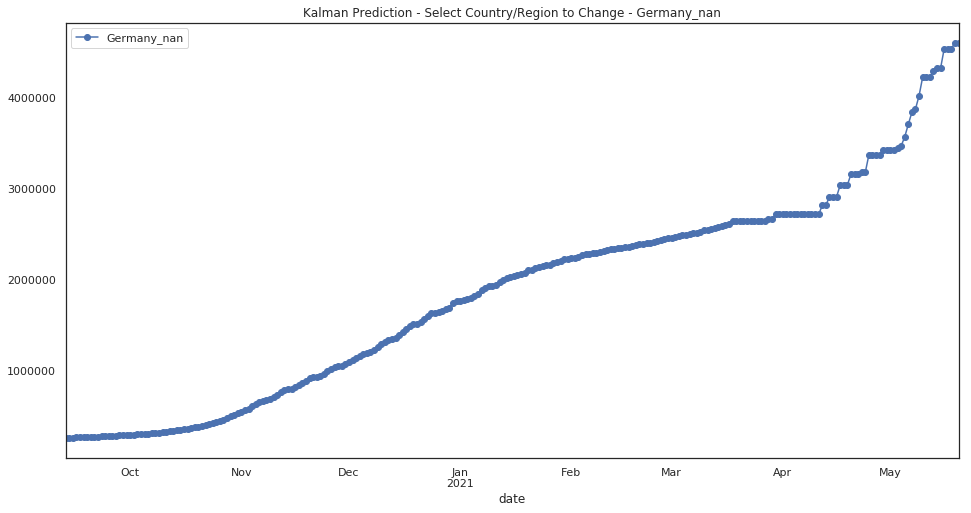

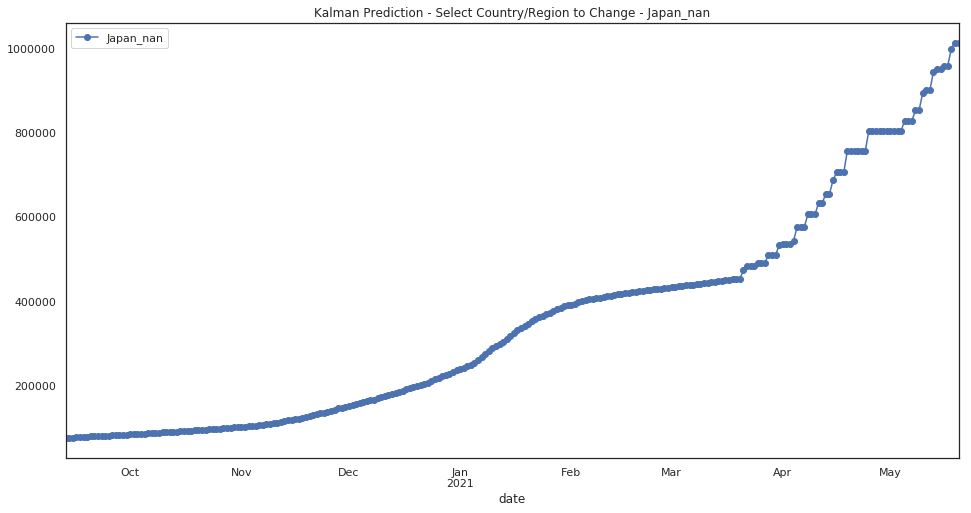

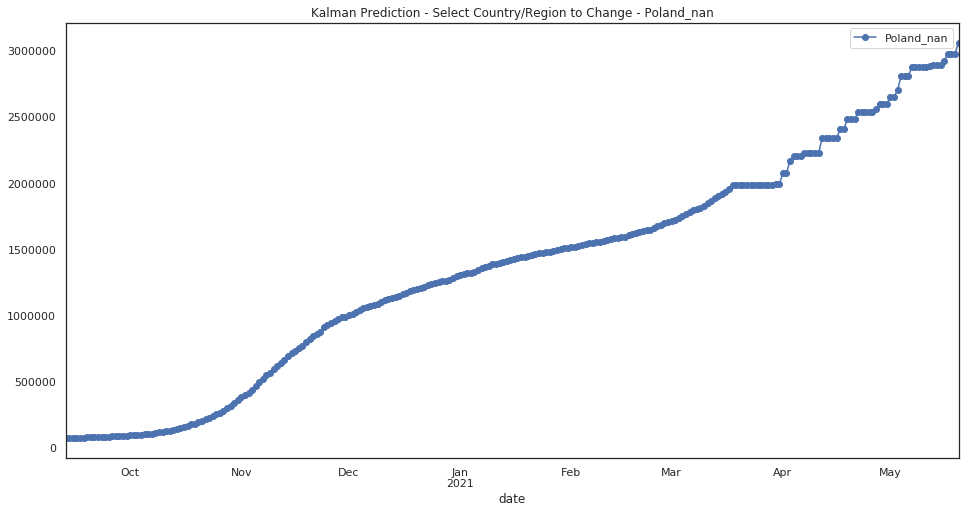

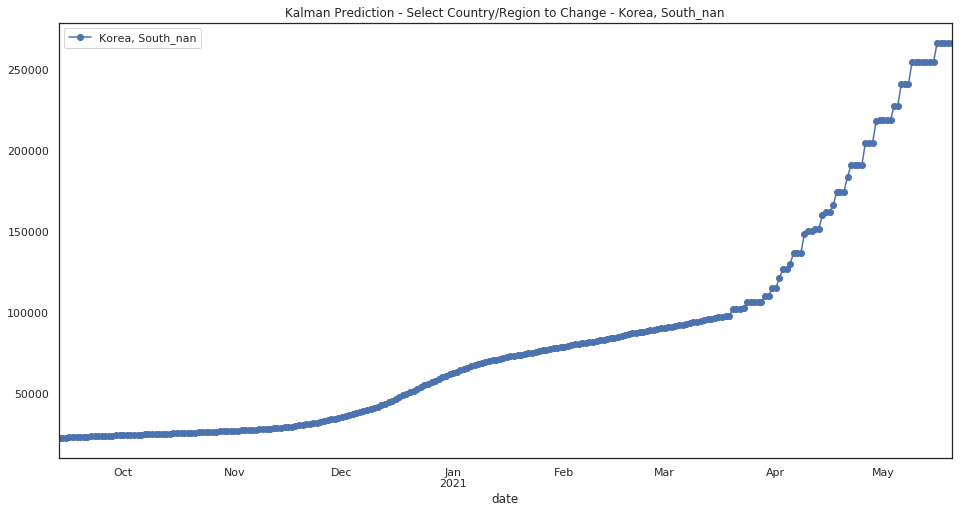

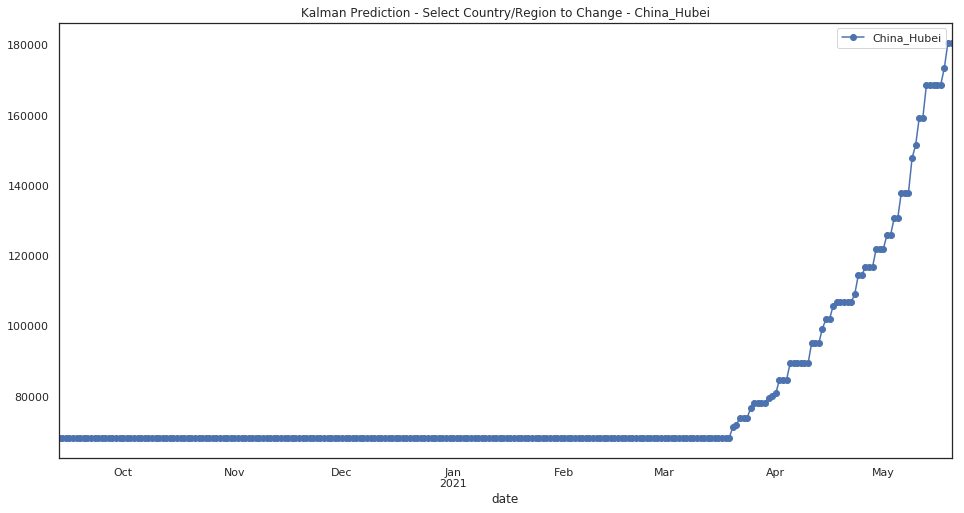

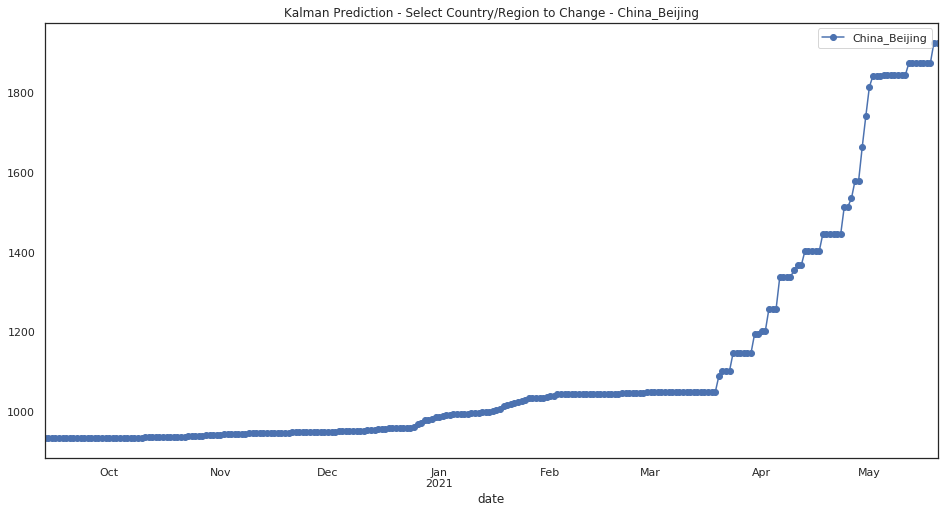

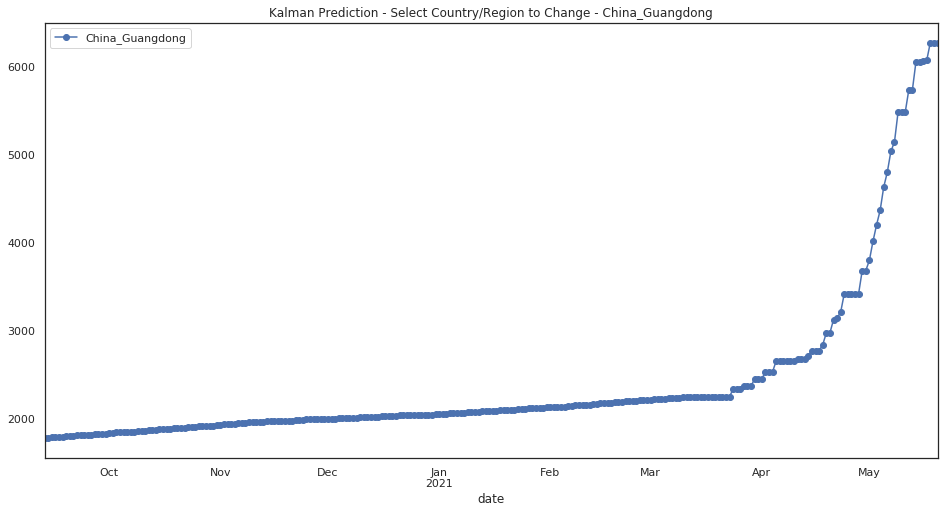

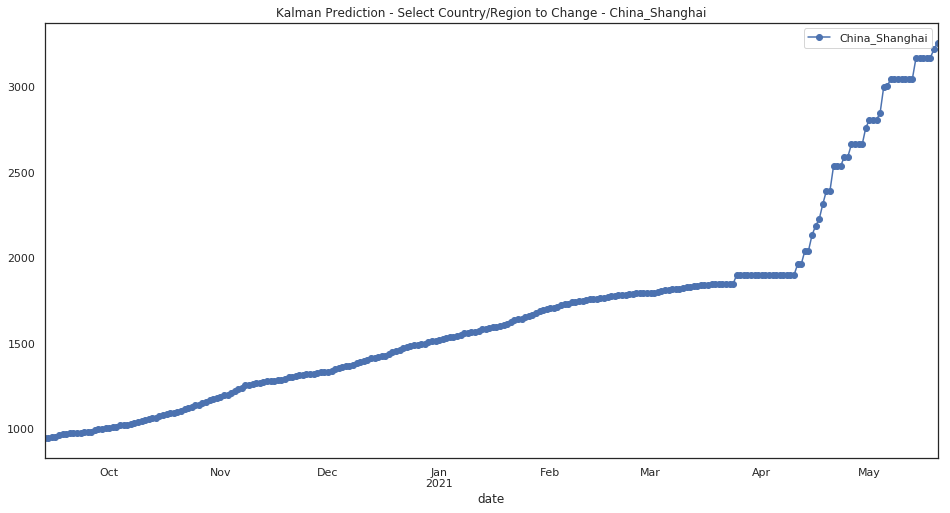

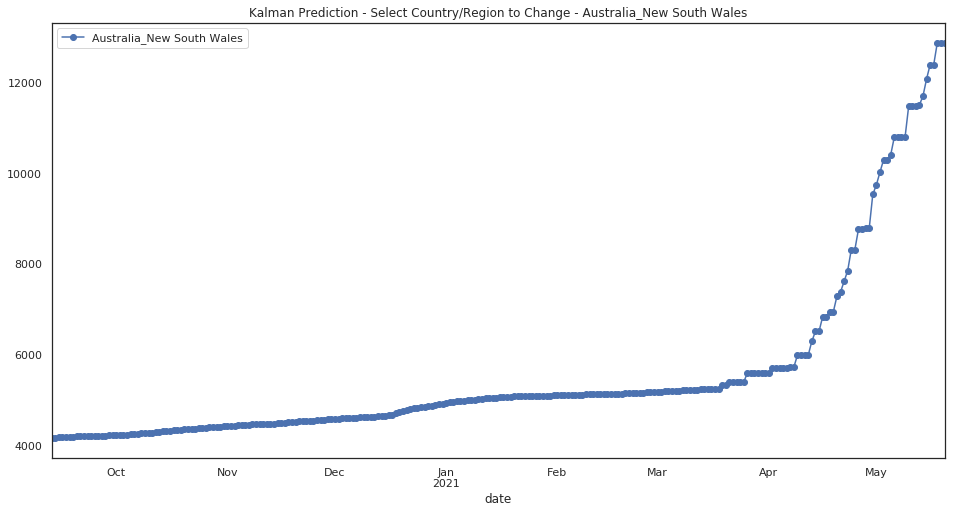

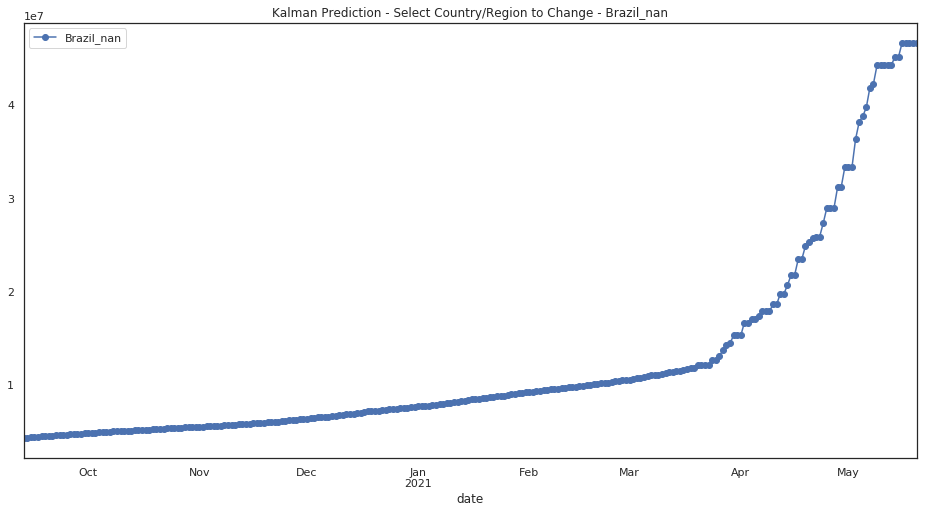

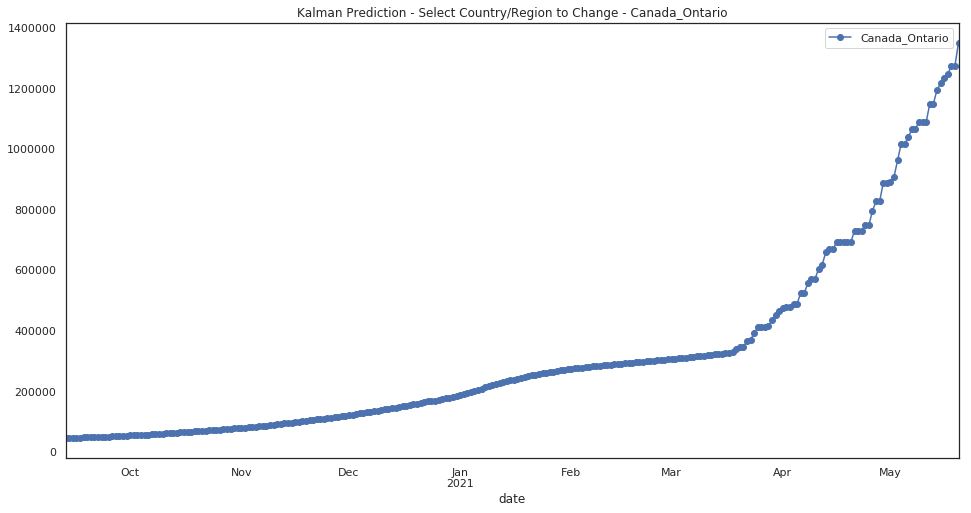

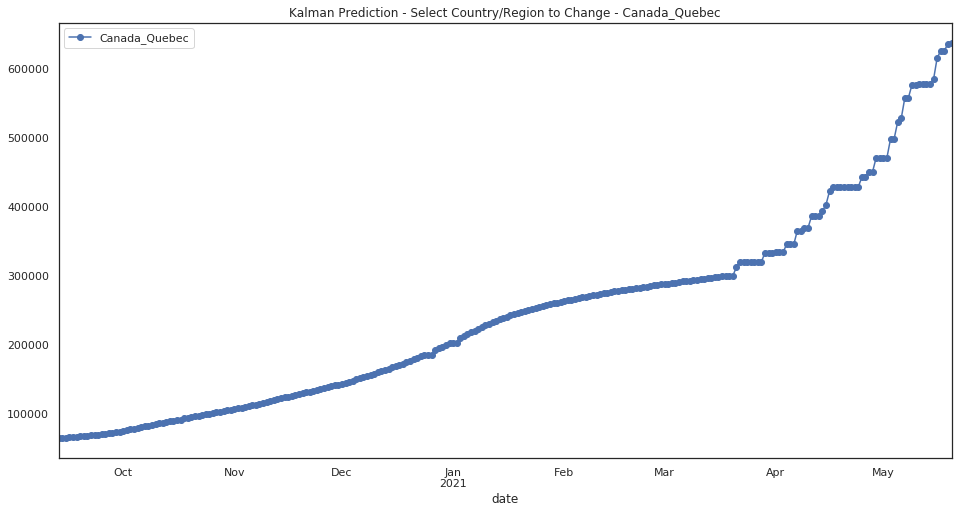

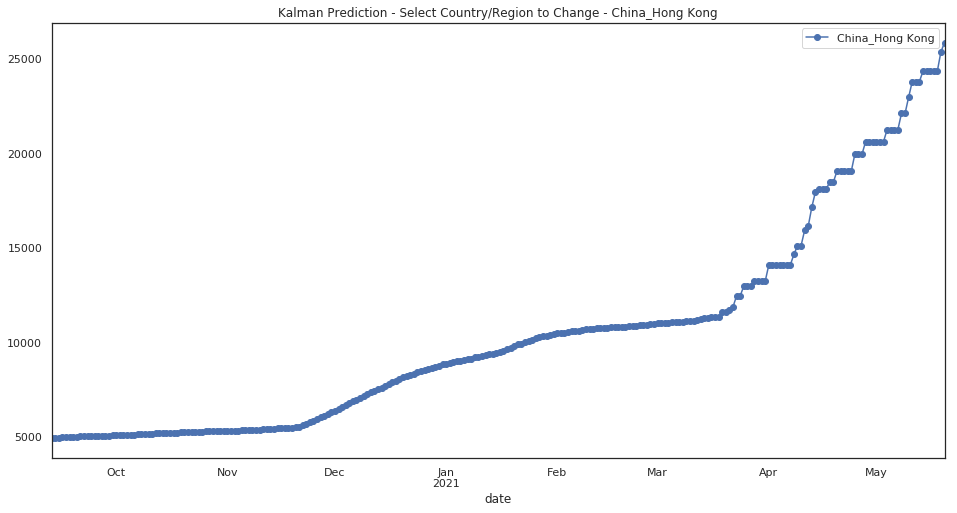

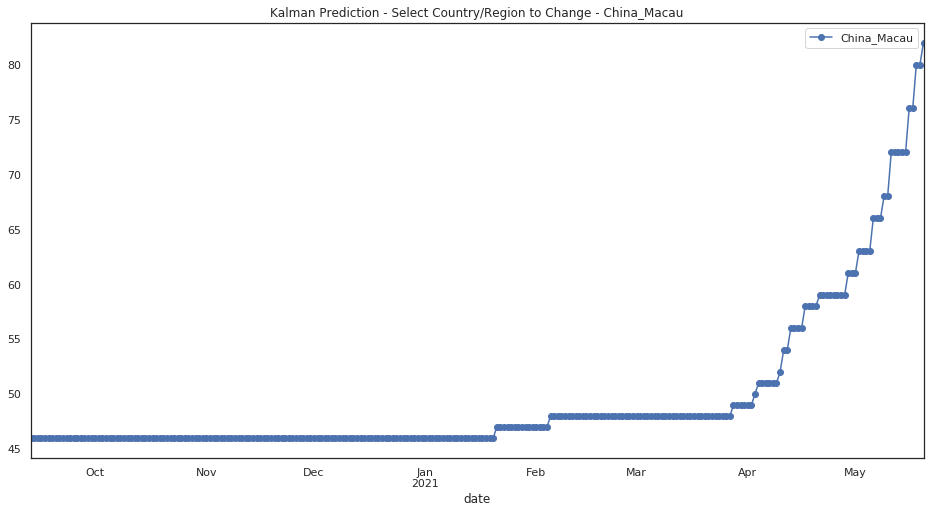

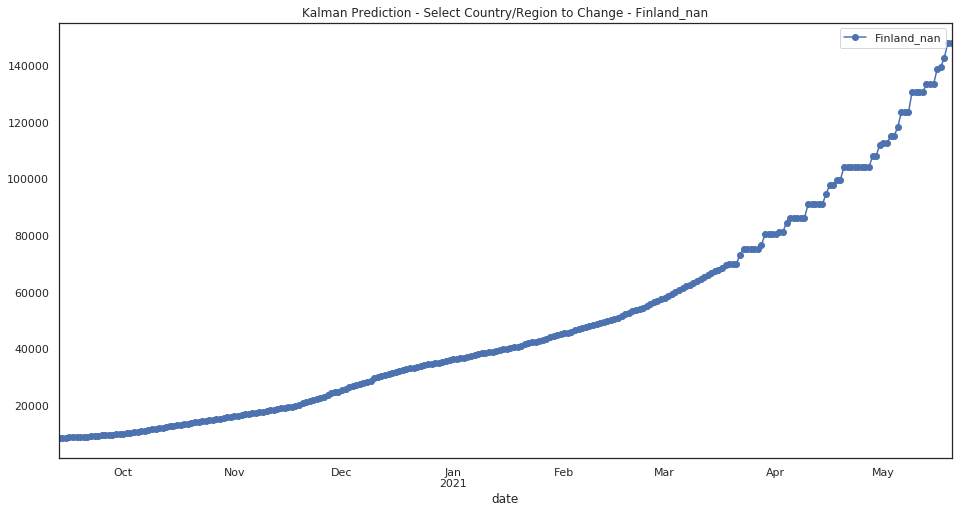

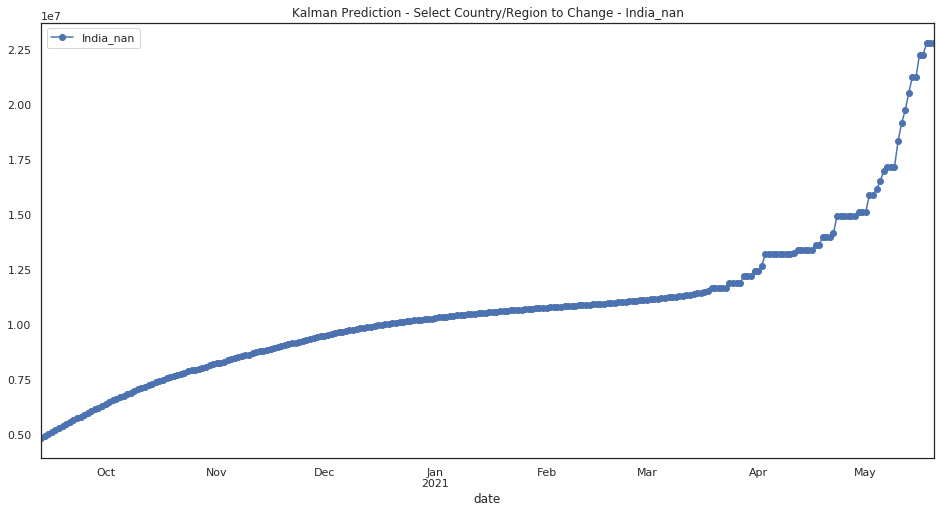

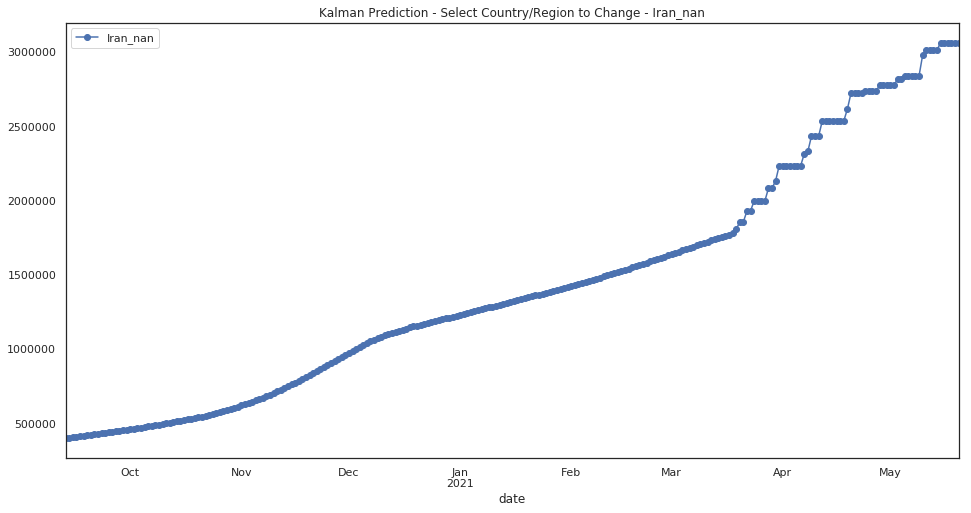

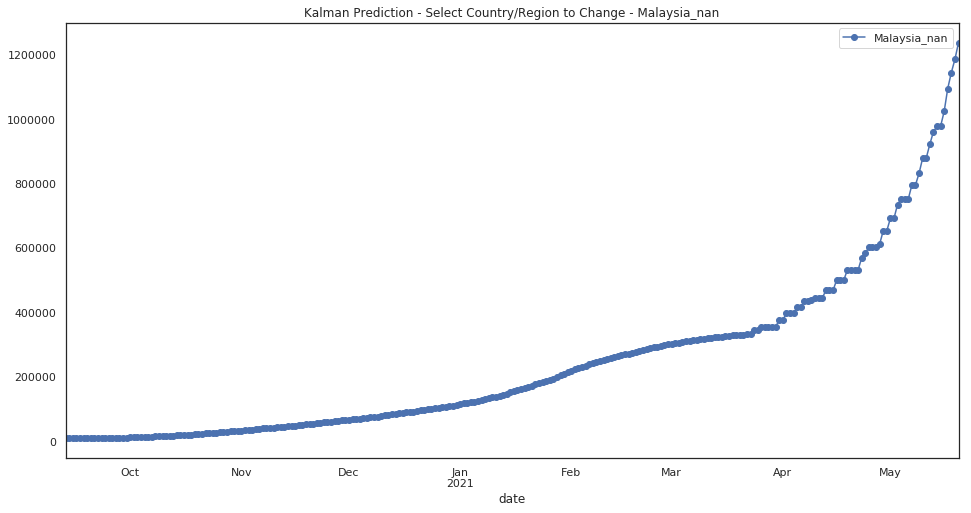

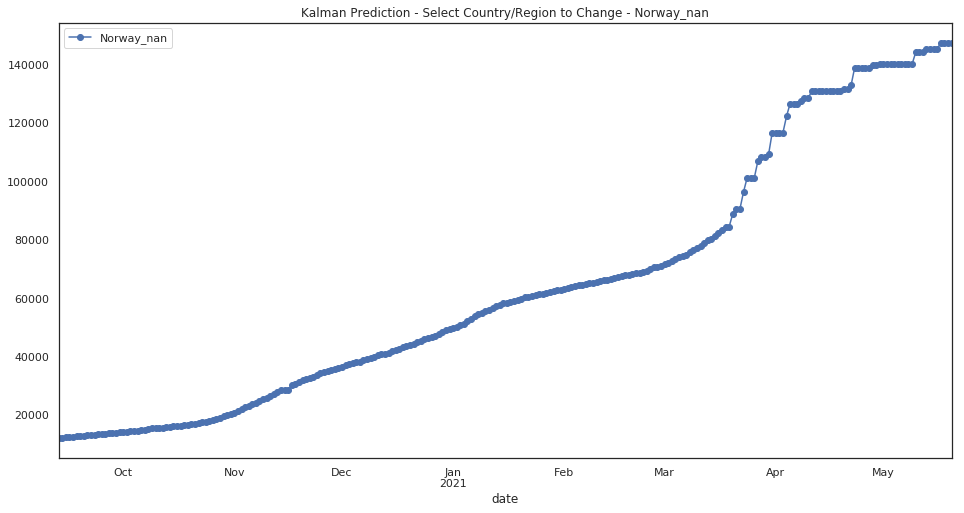

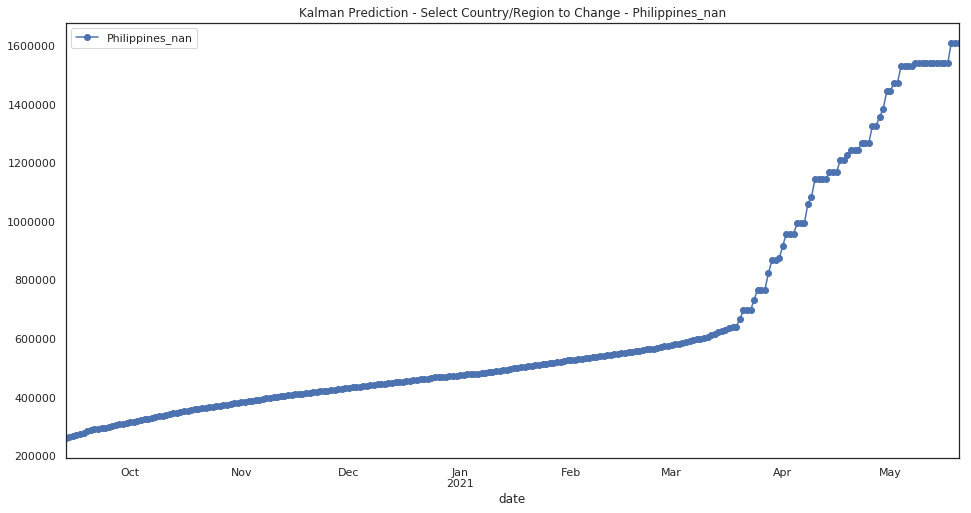

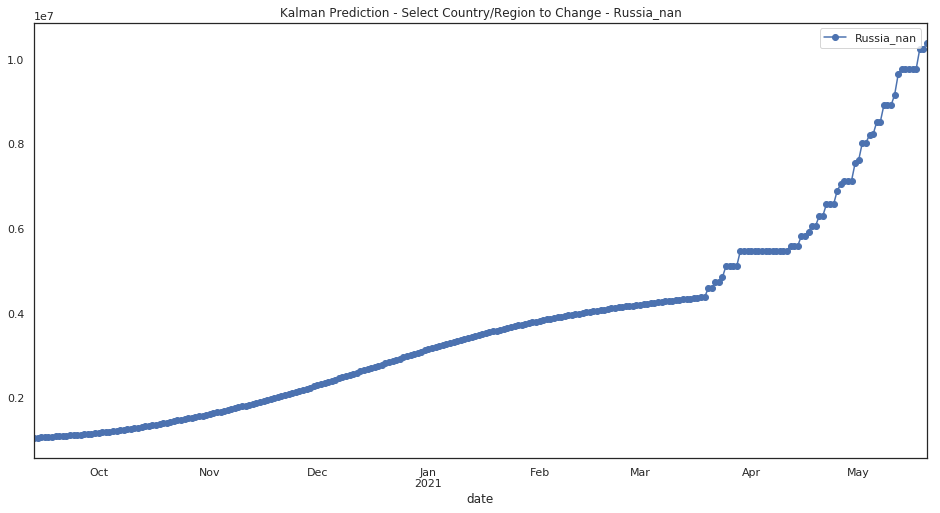

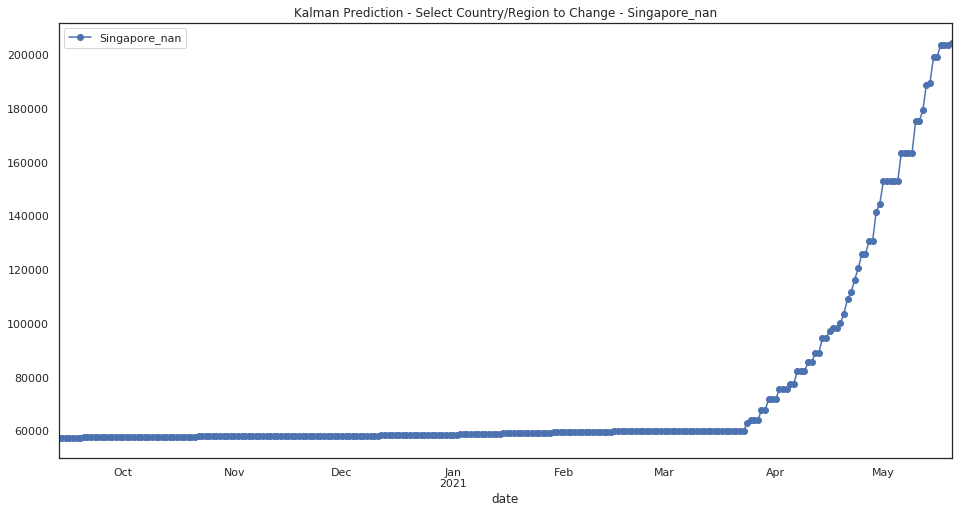

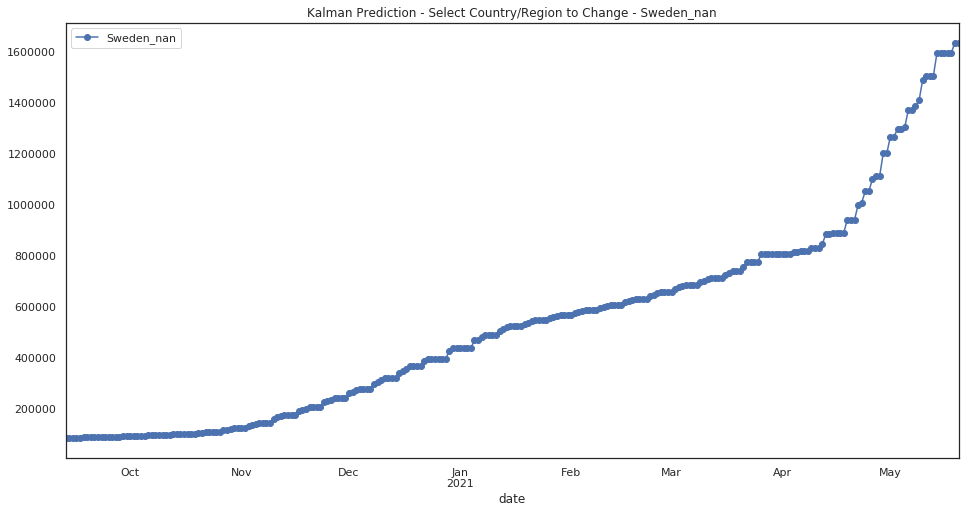

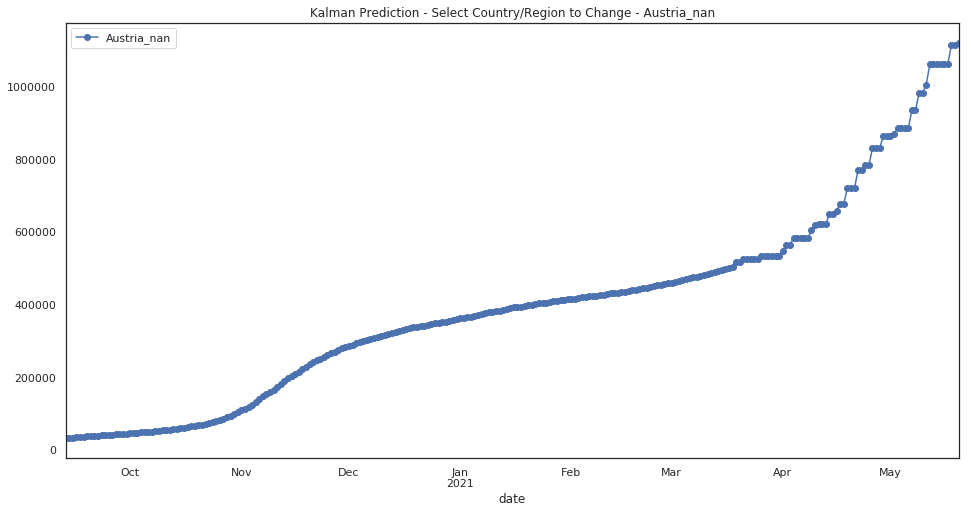

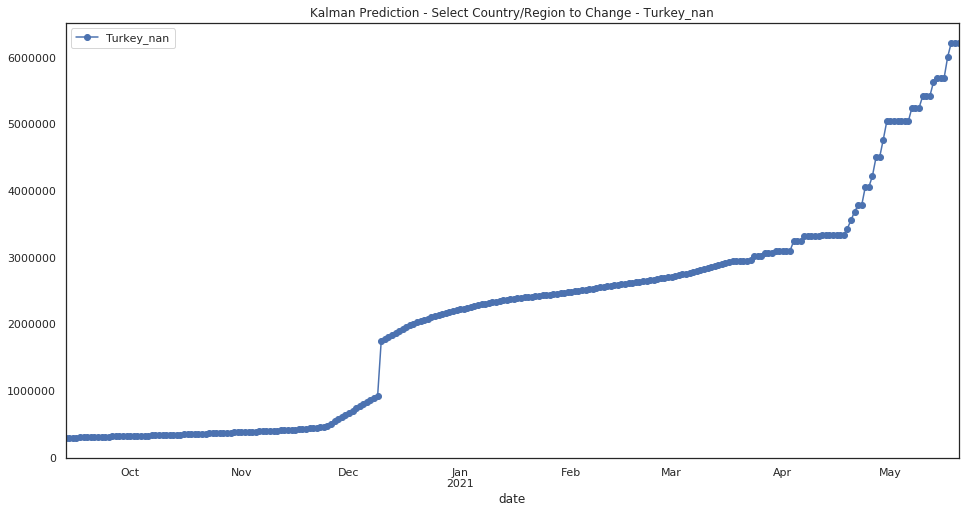

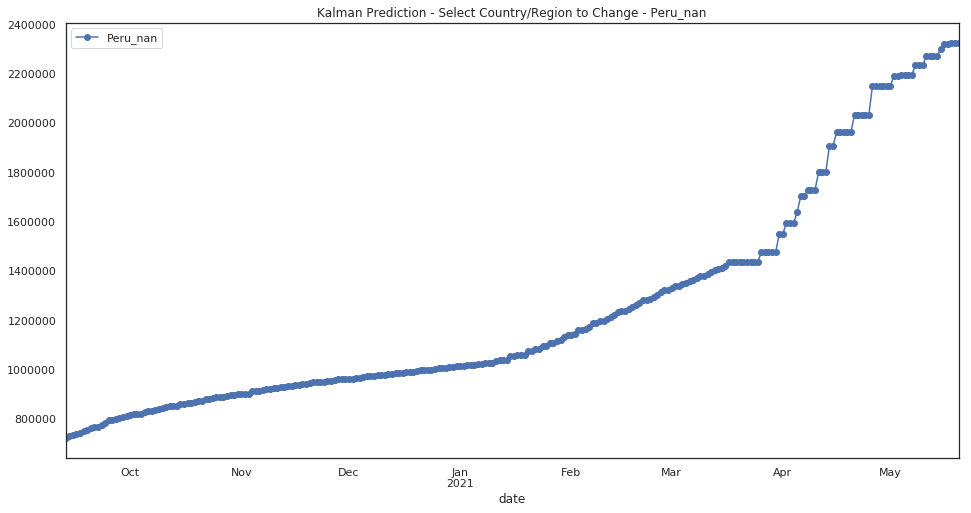

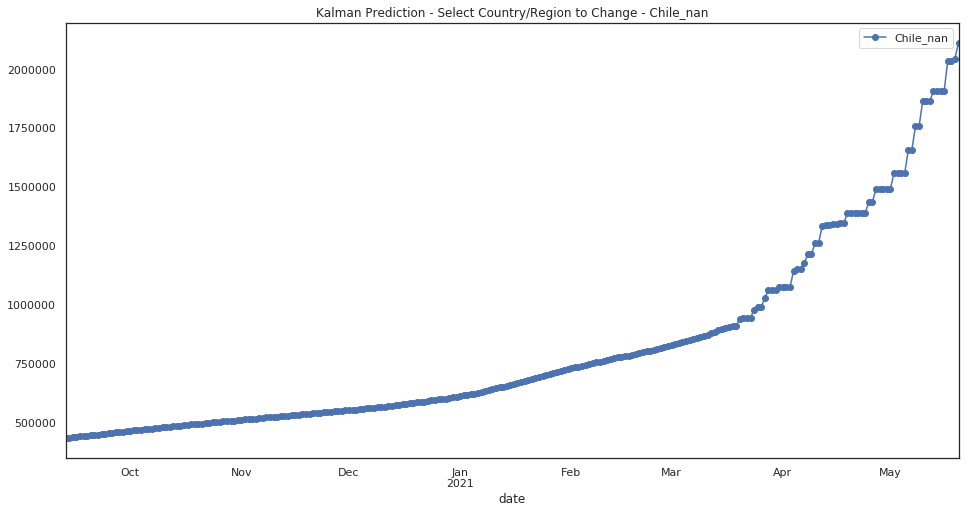

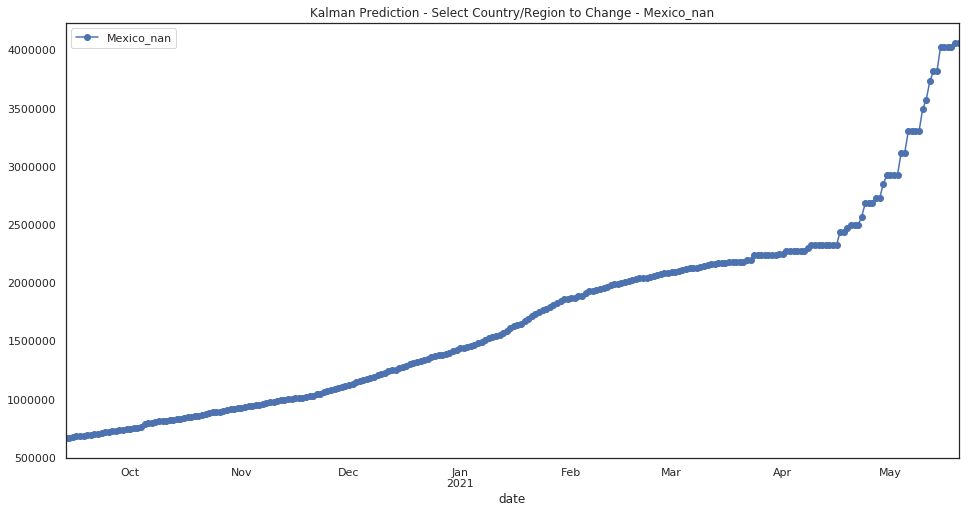

In [67]:
### Joao - Dynamic plot all regions individually
#print(region[:])
for i in range(1,len(region)):
    country_print=region[i]
    #print("here:"+country_print)
    p_kalman_rg=all_new[['date',country_print]]
    p_kalman_rg=p_kalman_rg.set_index(['date'])
    p_kalman_rg.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman_rg.columns[0]))
    

In [68]:
max_p0=all_new[:]
max_p0=max_p0.max()
max_date=max_p0[:1]
max_p0=max_p0[1:]
max_p0=pd.DataFrame(max_p0)
max_p0=max_p0.astype(str)
max_p0['pred_confirmed']=max_p0[max_p0.columns[0]].str.split(' ').str[-1].astype(float)
max_p0[max_p0.columns[0]]=max_p0[max_p0.columns[0]][:-len(max_p0['pred_confirmed'])]
max_p0=max_p0.sort_values(by='pred_confirmed', ascending=False)
#
print("### -- Confirmed max cases per country at last prediction date -- ###")
print(max_date)
max_p0[:]

### -- Confirmed max cases per country at last prediction date -- ###
date    2021-05-20 00:00:00
dtype: object


0  pred_confirmed
United States_nan                                   NaN      57502827.0
Brazil_nan                                          NaN      46665011.0
India_nan                                           NaN      22805163.0
Russia_nan                                          NaN      10397644.0
France_nan                                          NaN       8222513.0
Spain_nan                                           NaN       8217049.0
United Kingdom_nan                                  NaN       8119314.0
Turkey_nan                                          NaN       6222585.0
Italy_nan                                           NaN       5885663.0
Colombia_nan                                        NaN       5713807.0
Germany_nan                                         NaN       4599998.0
Mexico_nan                                          NaN       4063025.0
South Africa_nan                                    NaN       3861014.0
Argentina_nan                                       NaN       3735101.0
Ukraine_nan                                         NaN       3628986.0
Netherlands_nan                                     NaN       3372592.0
Indonesia_nan                                       NaN       3128999.0
Iran_nan                                            NaN       3062987.0
Poland_nan                                          NaN       3062812.0
Czechia_nan                                         NaN       2937137.0
Peru_nan                                            NaN       2325340.0
Romania_nan                                         NaN       2169786.0
Chile_nan                                           NaN       2112683.0
Israel_nan                                          NaN       2036349.0
Portugal_nan                                        NaN       1751311.0
Belgium_nan                                         NaN       1640451.0
Sweden_nan                                          NaN       1633435.0
Philippines_nan                                     NaN       1610942.0
Pakistan_nan                                        NaN       1562191.0
Switzerland_nan                                     NaN       1419244.0
...                                                 ...             ...
China_Hainan                                        NaN           320.0
China_Guizhou                                       NaN           283.0
Dominica_nan                                        NaN           281.0
Australia_Australian Capital Territory              NaN           272.0
Australia_Northern Territory                        NaN           260.0
Fiji_nan                                            NaN           226.0
Laos_nan                                            NaN           168.0
Canada_Northwest Territories                        NaN           153.0
China_Ningxia                                       NaN           150.0
Canada_Yukon                                        NaN           120.0
United Kingdom_Falkland Islands (Malvinas)          NaN           104.0
Saint Kitts and Nevis_nan                           NaN            89.0
China_Macau                                         NaN            82.0
Holy See_nan                                        NaN            74.0
Denmark_Greenland                                   NaN            56.0
France_Saint Pierre and Miquelon                    NaN            49.0
Solomon Islands_nan                                 NaN            37.0
United Kingdom_Montserrat                           NaN            33.0
United Kingdom_Anguilla                             NaN            29.0
Canada_Grand Princess                               NaN            28.0
China_Qinghai                                       NaN            27.0
Canada_Repatriated Travellers                       NaN            26.0
MS Zaandam_nan                                      NaN             9.0
United Kingdom_Saint Helena, Ascension and Tris...  NaN             4.0
Marshall Islands_nan  

In [69]:
t.to_csv(r'data/t_confirmed_global.csv', index = False, header=True)

In [70]:
all_new.to_csv(r'data/prediction_kalman_filter_global.csv', index = False, header=True)

## Iterative Regression

In [71]:
t_iter=all_new.set_index(['date'])
t_iter=t_iter.stack().reset_index(name='confirmed')
t_iter.columns=['date', 'region','confirmed']
t_iter['date']=pd.to_datetime(t_iter['date'] ,errors ='coerce')
t_iter=t_iter.sort_values(['region', 'date'])

t_iter=t_iter.reset_index(drop=True)
for i in range(1,len(t_iter)+1):
    if(t_iter.iloc[i,1] is not t_iter.iloc[i-1,1]):
        t_iter.loc[len(t_iter)+1] = [t_iter.iloc[i-1,0]+ pd.DateOffset(1),t_iter.iloc[i-1,1], 0] 
t_iter=t_iter.sort_values(['region', 'date'])
t_iter=t_iter.reset_index(drop=True)

### Joao - Fix - RuntimeWarning: divide by zero encountered in double_scalars
#
t_iter['1_day_change']=t_iter['3_day_change']=t_iter['7_day_change']=t_iter['1_day_change_rate']=t_iter['3_day_change_rate']=t_iter['7_day_change_rate']=t_iter['last_day']=0
for i in range(1,len(t_iter)):
    if(t_iter.iloc[i,1] is t_iter.iloc[i-2,1]):
        t_iter.iloc[i,3]=t_iter.iloc[i-1,2]-t_iter.iloc[i-2,2]
        t_iter.iloc[i,6]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-2,2]*100 -1 +1))*100
        t_iter.iloc[i,9]=t_iter.iloc[i-1,2]
    if(t_iter.iloc[i,1] is t_iter.iloc[i-4,1]):
        t_iter.iloc[i,4]=t_iter.iloc[i-1,2]-t_iter.iloc[i-4,2]
        t_iter.iloc[i,7]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-4,2]*100 -1 +1))*100
    if(t_iter.iloc[i,1] is t_iter.iloc[i-8,1]):
        t_iter.iloc[i,5]=t_iter.iloc[i-1,2]-t_iter.iloc[i-8,2]
        t_iter.iloc[i,8]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-8,2]*100 -1 +1))*100
t_iter=t_iter.fillna(0)  

# t_iter=t_iter.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
# t_iter=t_iter.rename(columns = {'X':'kalman_prediction'}) 
t_iter=t_iter.replace([np.inf, -np.inf], 0)
t_iter['kalman_prediction']=round(t_iter['confirmed'])

test_iter=t_iter.merge(confirmed[['region',' Population ']],how='left',on='region')
test_iter=test_iter.rename(columns = {' Population ':'population'})
test_iter['population']=test_iter['population'].str.replace(r" ", '')
test_iter['population']=test_iter['population'].str.replace(r",", '')
test_iter['population']=test_iter['population'].fillna(10000000) # Fill 10M population if null
test_iter['population']=test_iter['population'].astype('int32')
## Joao - Fix Divid By Zero
#test_iter['infected_rate'] =test_iter['last_day']/test_iter['population']*10000
#test_iter['infected_rate'] =((test_iter['last_day']+1)*10000)/((test_iter['population']+1)*100)*100
test_iter['infected_rate']=(((test_iter['last_day'] +1)*100)/((test_iter['population'] +1)*100000) *10)
#
test_iter=test_iter.merge(w,how='left',on=['date','region'])
#test_iter=test_iter.sort_values(['region', 'date'])

test_iter_temp=test_iter[np.isnan(test_iter['min'])]
test_iter_temp=test_iter_temp.drop(columns=['min', 'max'])
test_iter_temp=test_iter_temp.merge(w_forecast,how='left',on=['date','region'])
test_iter=test_iter.dropna()
test_iter=test_iter.append(test_iter_temp)
test_iter=test_iter.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(test_iter)):
    if(np.isnan(test_iter.iloc[i,13])):
        if(test_iter.iloc[i,1] is test_iter.iloc[i-1,1]):
            test_iter.iloc[i,13]=test_iter.iloc[i-1,13]+abs(test_iter.iloc[i-1,13]*.01)
            test_iter.iloc[i,14]=test_iter.iloc[i-1,14]+abs(test_iter.iloc[i-1,14]*.01)


/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in double_scalars


In [72]:
test_iter=test_iter.fillna(0) 
test_iter[test_iter.isnull().any(axis=1)]


Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [73]:
### JOAO - ERROR - ValueError: Index contains duplicate entries, cannot reshape
pred=reg.predict(test_iter[x_col]); pred=pd.DataFrame(pred); pred.columns = ['prediction'];pred=round(pred)
pred['confirmed']=test_iter['confirmed'].values; pred['date']=test_iter['date'].values; pred['region']=test_iter['region'].values

for i in range(1,len(pred)):
    if(pred.iloc[i,3] is pred.iloc[i-1,3]):
        if(pred.iloc[i,0]<pred.iloc[i-1,1]):
            pred.iloc[i,0]=pred.iloc[i-1,1]
### JOAO - Drop Duplicates
pred=pred.drop_duplicates(subset=['date','region'], keep='last', inplace=False)        
### Joao - Save long term predictions
pred.to_csv('data/pred_'+str(num_days_R_prediction)+'_days.csv', index = False, header=True)
###
pred=pred.pivot(index='date',columns='region',values='prediction') # pivot pred df

In [74]:
pred[:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-09-13          55061.0      31484.0      63280.0      22859.0   
2020-09-14          55109.0      31628.0      63488.0      22940.0   
2020-09-15          38772.0      11520.0      48496.0       1438.0   
2020-09-16          38815.0      11672.0      48734.0       1438.0   
2020-09-17          38855.0      11816.0      49070.0       1483.0   
2020-09-18          38872.0      11948.0      49289.0       1483.0   
2020-09-19          38897.0      12073.0      49500.0       1564.0   
2020-09-20          38919.0      12226.0      49702.0       1564.0   
2020-09-21          39234.0      12518.0      50137.0       1980.0   
2020-09-22          39273.0      12673.0      50330.0       1681.0   
2020-09-23          39320.0      12821.0      50518.0       2099.0   
2020-09-24          39337.0      12962.0      50700.0       1753.0   
2020-09-25          39357.0      13067.0      50877.0       2114.0   
2020-09-26          39366.0      13191.0      51040.0       1836.0   
2020-09-27          39395.0      13320.0      51195.0       2131.0   
2020-09-28          39412.0      13448.0      51343.0       2243.0   
2020-09-29          39431.0      13544.0      51497.0       1966.0   
2020-09-30          39446.0      13686.0      51660.0       2378.0   
2020-10-01          39462.0      13840.0      51823.0       2050.0   
2020-10-02          39469.0      13970.0      51982.0       2380.0   
2020-10-03          39478.0      14128.0      52133.0       2110.0   
2020-10-04          39515.0      14290.0      52274.0       2353.0   
2020-10-05          39588.0      14437.0      52409.0       2577.0   
2020-10-06          39652.0      14598.0      52537.0       2370.0   
2020-10-07          39719.0      14744.0      52659.0       2988.0   
2020-10-08          39786.0      14910.0      52796.0       2568.0   
2020-10-09          39857.0      15075.0      52942.0       3047.0   
2020-10-10          39872.0      15246.0      53082.0       2696.0   
2020-10-11          39961.0      15417.0      53216.0       2994.0   
2020-10-12          40023.0      15585.0      53453.0       3252.0   
...                     ...          ...          ...          ...   
2021-04-22          85336.0     225926.0     156692.0      14769.0   
2021-04-23          86974.0     226895.0     158990.0      15033.0   
2021-04-24          91333.0     228464.0     160202.0      15402.0   
2021-04-25          94245.0     228464.0     159341.0      15480.0   
2021-04-26          93438.0     228464.0     161333.0      16043.0   
2021-04-27         100571.0     239440.0     162485.0      16251.0   
2021-04-28         103499.0     245646.0     162414.0      16620.0   
2021-04-29         103001.0     241350.0     162414.0      16788.0   
2021-04-30         107355.0     241350.0     162414.0      16808.0   
2021-05-01         113934.0     252068.0     162414.0      16971.0   
2021-05-02         115978.0     266157.0     162414.0      16971.0   
2021-05-03         114719.0     274354.0     162414.0      17701.0   
2021-05-04         118924.0     276920.0     162572.0      18039.0   
2021-05-05         128427.0     274566.0     162572.0      18742.0   
2021-05-06         135158.0     286675.0     163401.0      18743.0   
2021-05-07         135142.0     294099.0     163828.0      18742.0   
2021-05-08         135112.0     292054.0     163524.0      19020.0   
2021-05-09         137659.0     298808.0     167598.0      19398.0   
2021-05-10         144152.0     317061.0     169653.0      19469.0   
2021-05-11         153044.0     329082.0     168154.0      19708.0   
2021-05-12         159717.0     323013.0     170911.0      19708.0   
2021-05-13         161437.0     323013.0     172839.0      20408.0   
2021-05-14         160192.0     344082.0     172249.0      20780.0   
2021-05-15         160863.0     357540.0     172149.0      21075.0   
2021-05-16

In [75]:
### JOAO - FIX - issue if all source days ts[:]
## Comment for -35days start. 26feb.2020 ts=ts[35:]
## 06Aug2020 - For all
pred=pred[:-1]

In [76]:
region1=max_p0[max_p0.columns[0]].astype(str).reset_index().rename(columns={"index": "region"}).get_values()
region=[region[0] for region in region1]
region

['United States_nan',
 'Brazil_nan',
 'India_nan',
 'Russia_nan',
 'France_nan',
 'Spain_nan',
 'United Kingdom_nan',
 'Turkey_nan',
 'Italy_nan',
 'Colombia_nan',
 'Germany_nan',
 'Mexico_nan',
 'South Africa_nan',
 'Argentina_nan',
 'Ukraine_nan',
 'Netherlands_nan',
 'Indonesia_nan',
 'Iran_nan',
 'Poland_nan',
 'Czechia_nan',
 'Peru_nan',
 'Romania_nan',
 'Chile_nan',
 'Israel_nan',
 'Portugal_nan',
 'Belgium_nan',
 'Sweden_nan',
 'Philippines_nan',
 'Pakistan_nan',
 'Switzerland_nan',
 'Bangladesh_nan',
 'Canada_Ontario',
 'Iraq_nan',
 'Malaysia_nan',
 'Jordan_nan',
 'Austria_nan',
 'Morocco_nan',
 'Japan_nan',
 'Lebanon_nan',
 'Hungary_nan',
 'Serbia_nan',
 'Nepal_nan',
 'Panama_nan',
 'United Arab Emirates_nan',
 'Bulgaria_nan',
 'Slovakia_nan',
 'Canada_Quebec',
 'Ecuador_nan',
 'Kazakhstan_nan',
 'Azerbaijan_nan',
 'Tunisia_nan',
 'Saudi Arabia_nan',
 'Georgia_nan',
 'Bosnia and Herzegovina_nan',
 'Croatia_nan',
 'Lithuania_nan',
 'West Bank and Gaza_nan',
 'Egypt_nan',
 'Boli

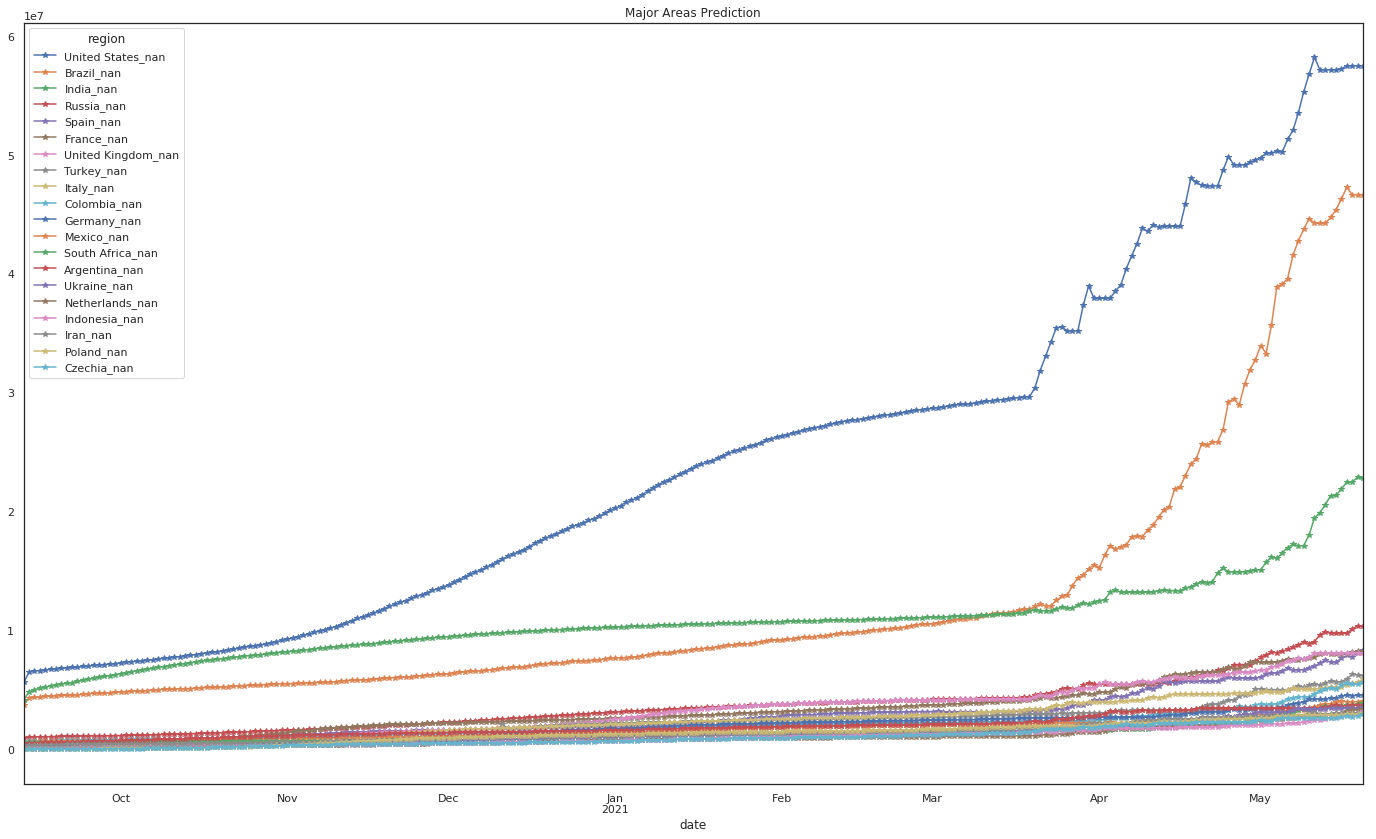

In [77]:
#
p=pred[region[:20]]
p[:].reindex(p.max().sort_values(ascending=False).index, axis=1).plot(marker='*',figsize=(24,14),title ='Major Areas Prediction')

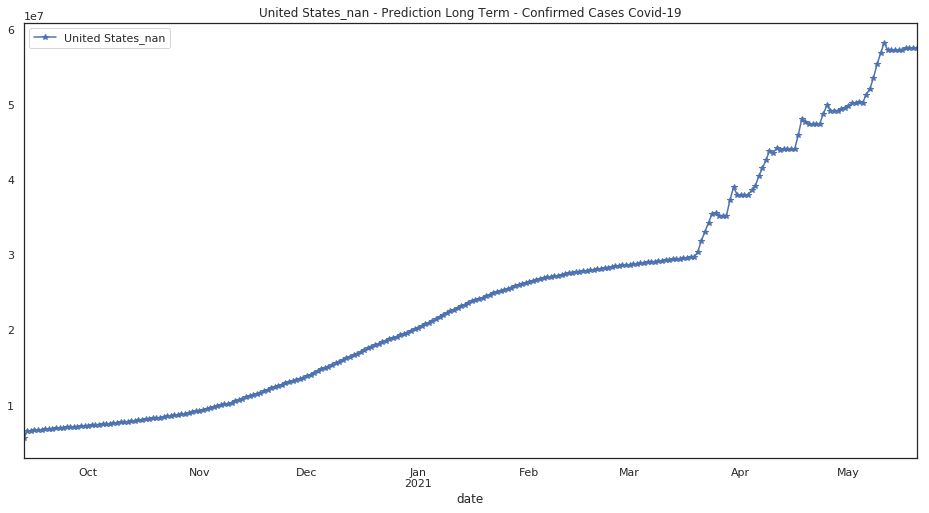

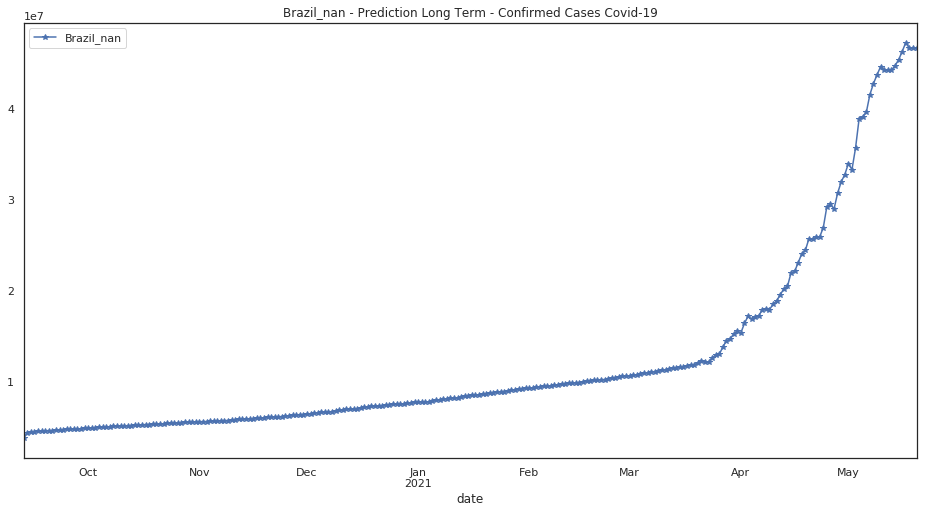

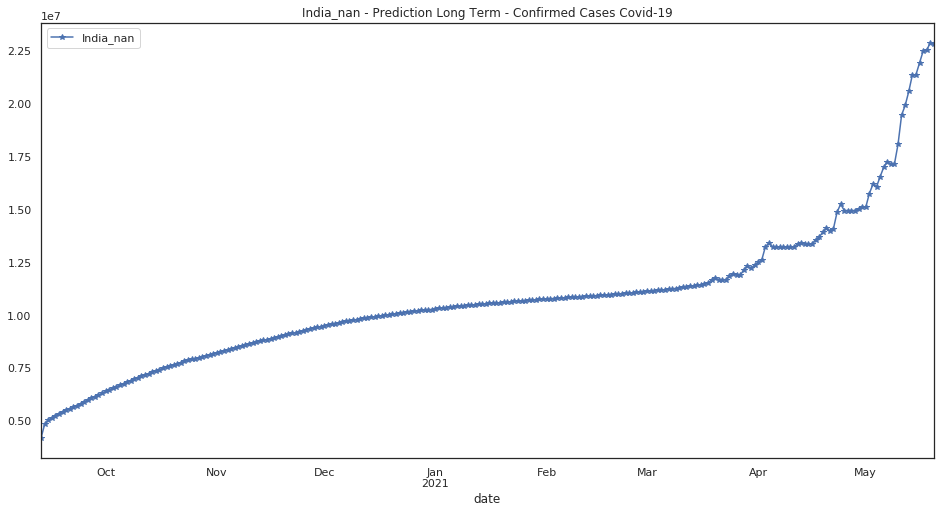

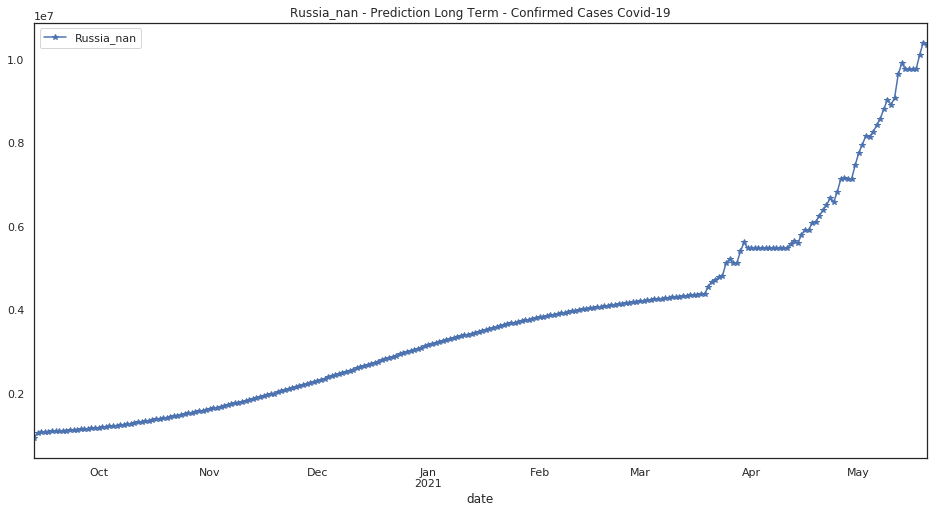

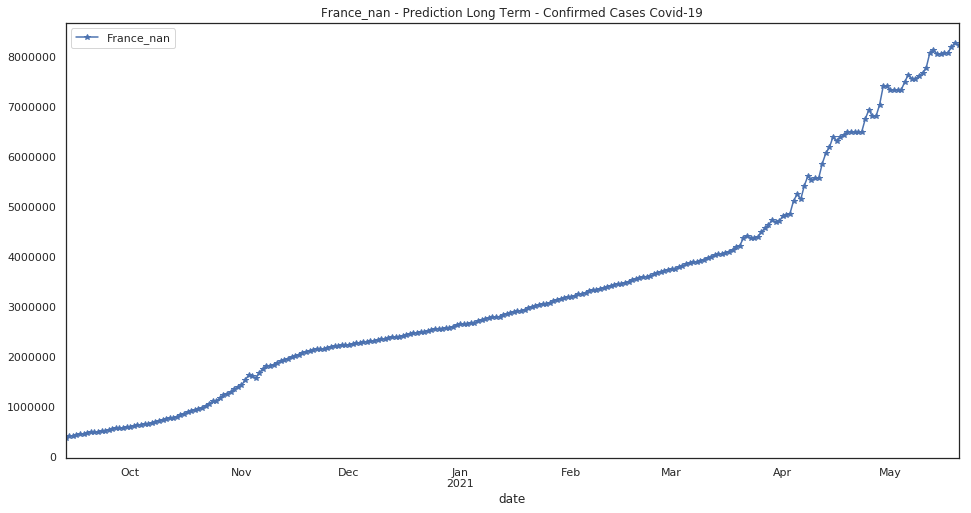

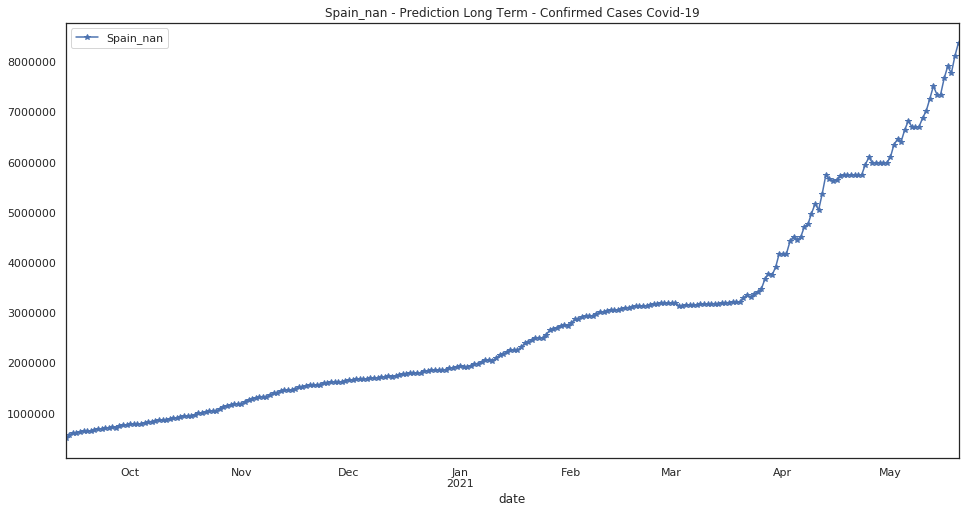

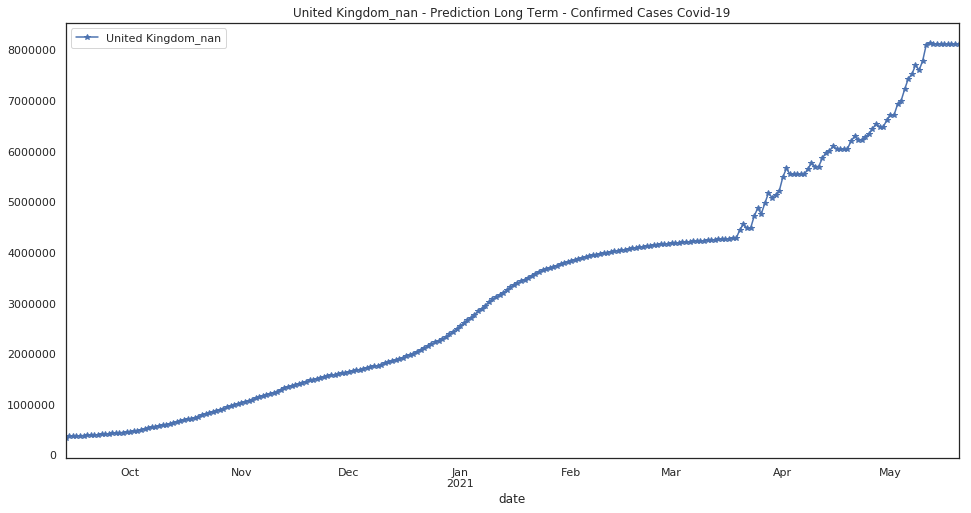

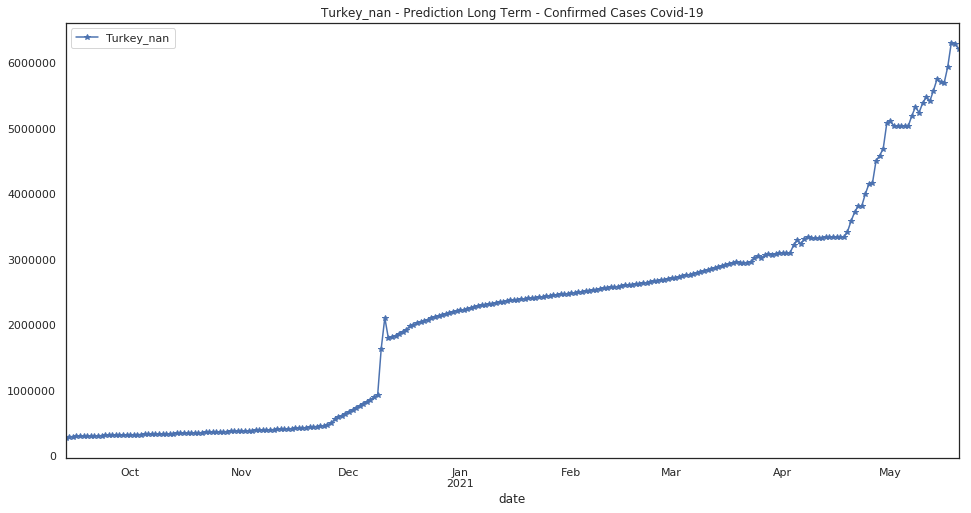

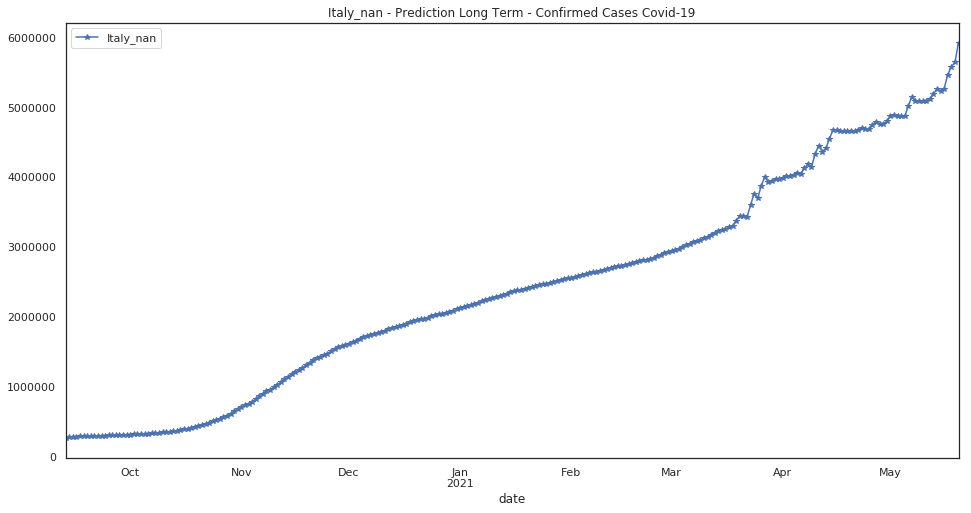

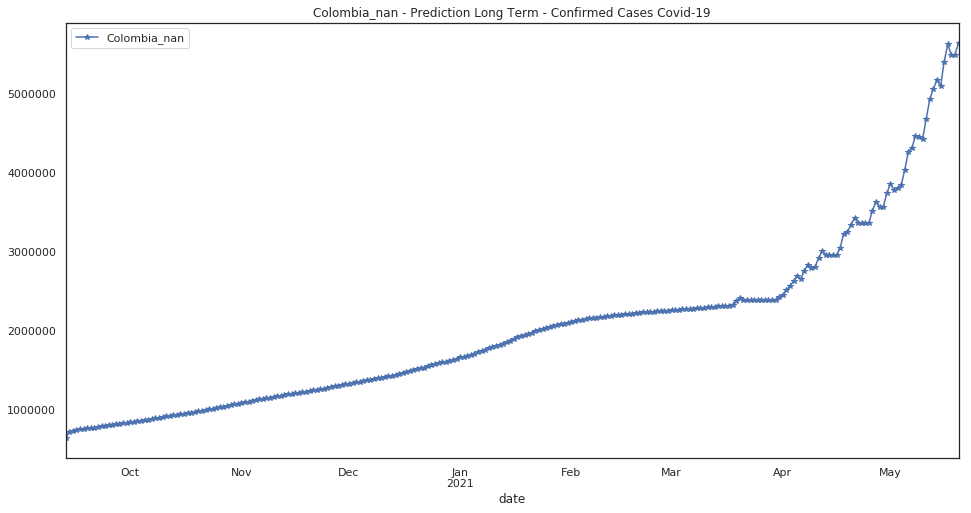

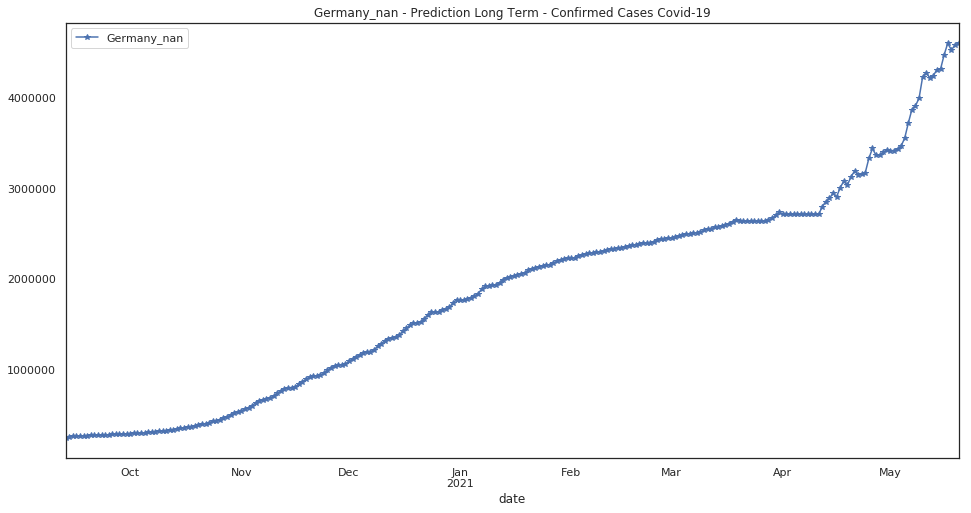

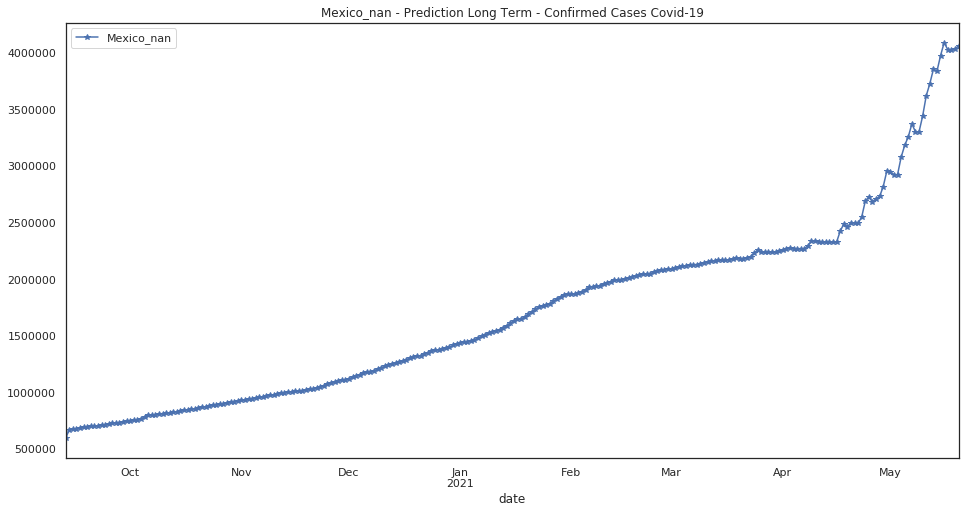

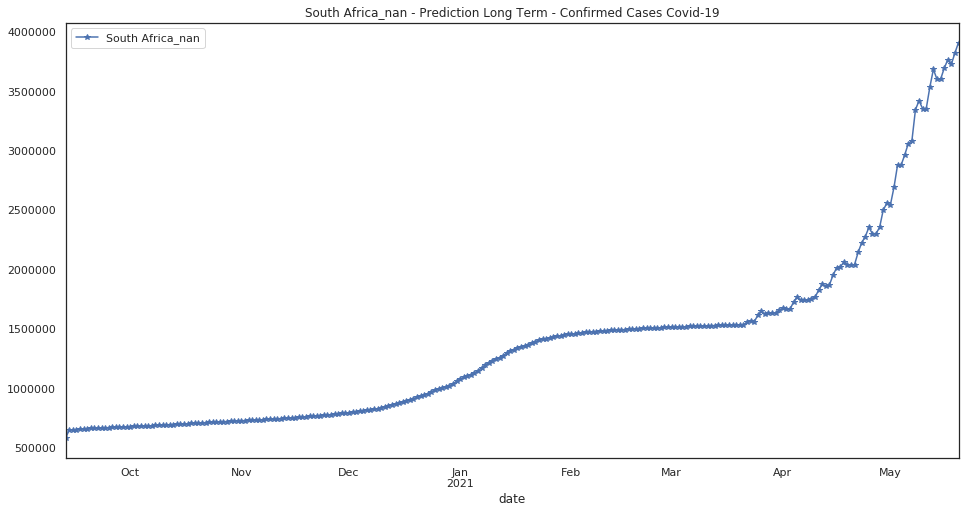

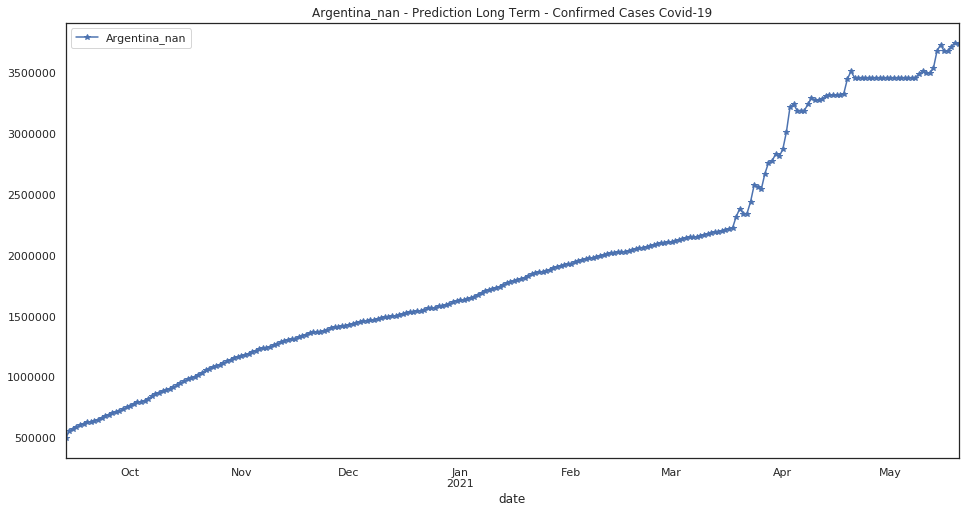

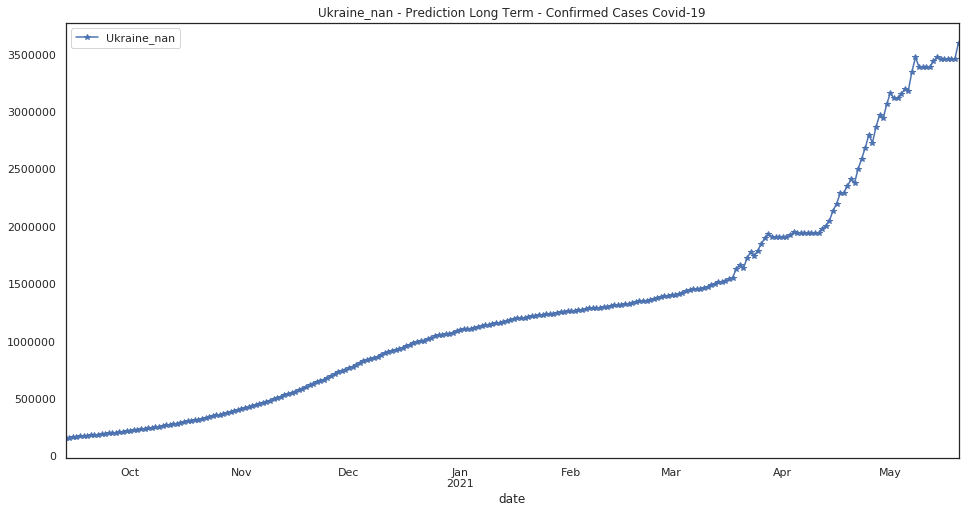

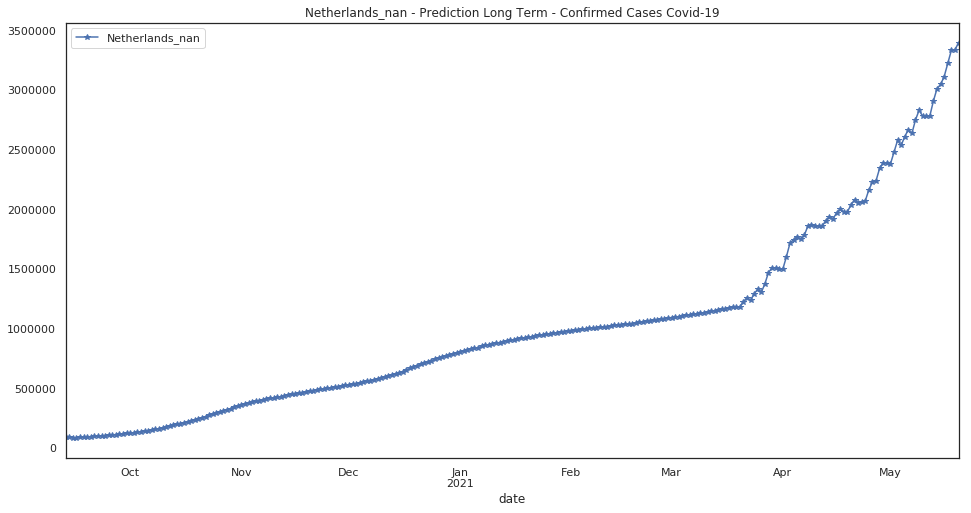

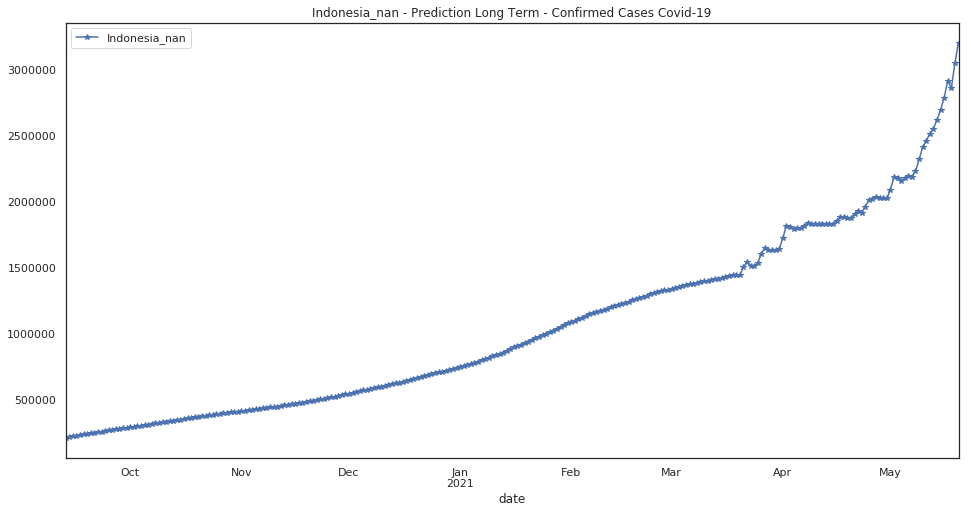

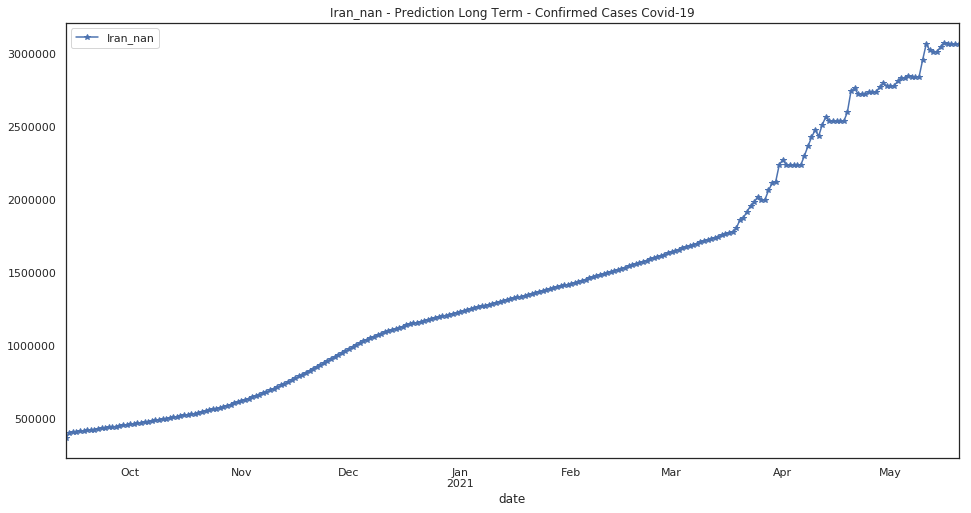

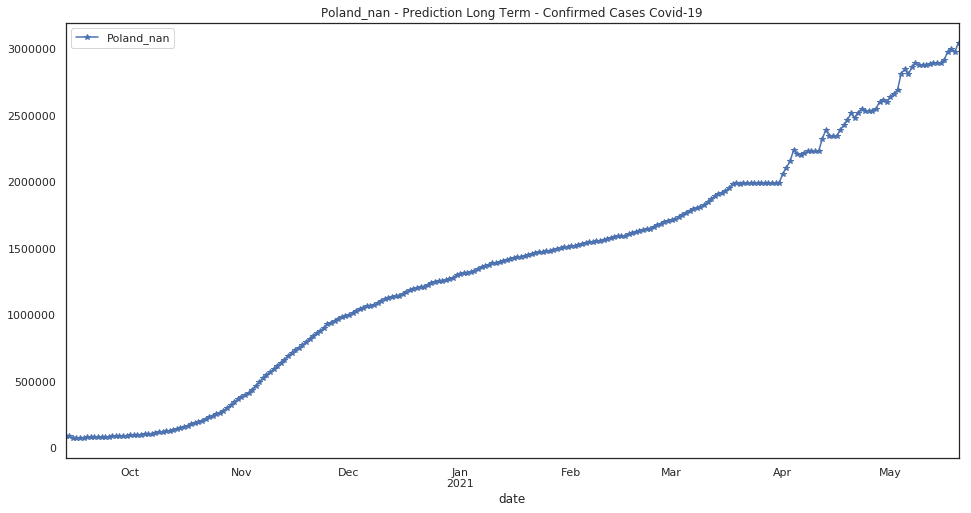

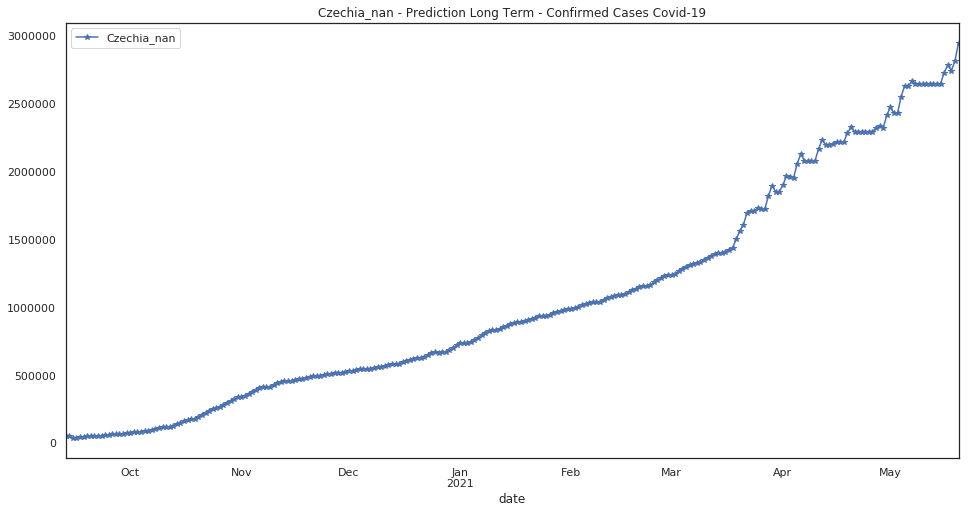

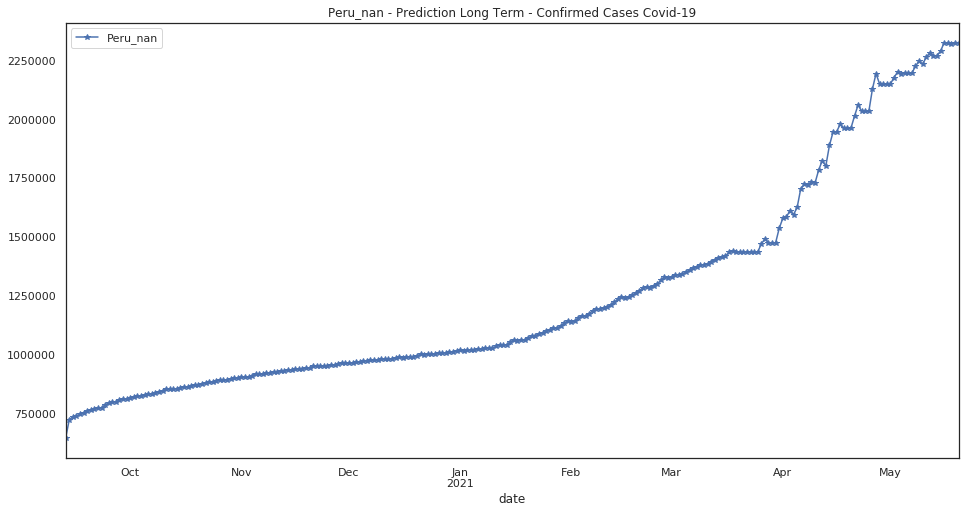

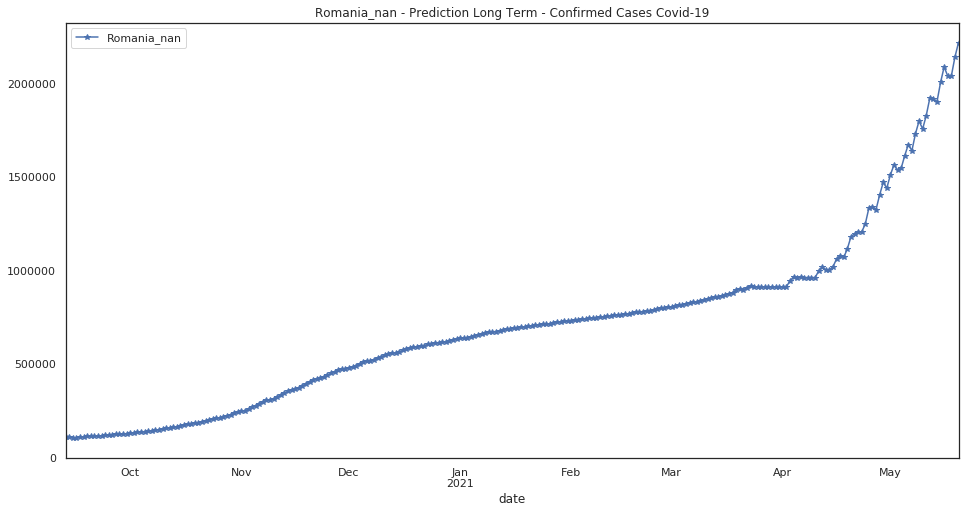

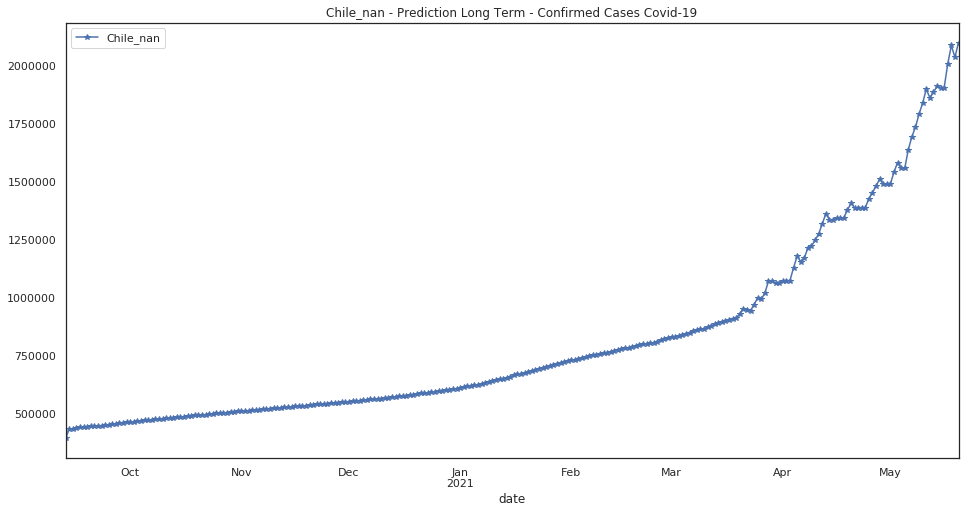

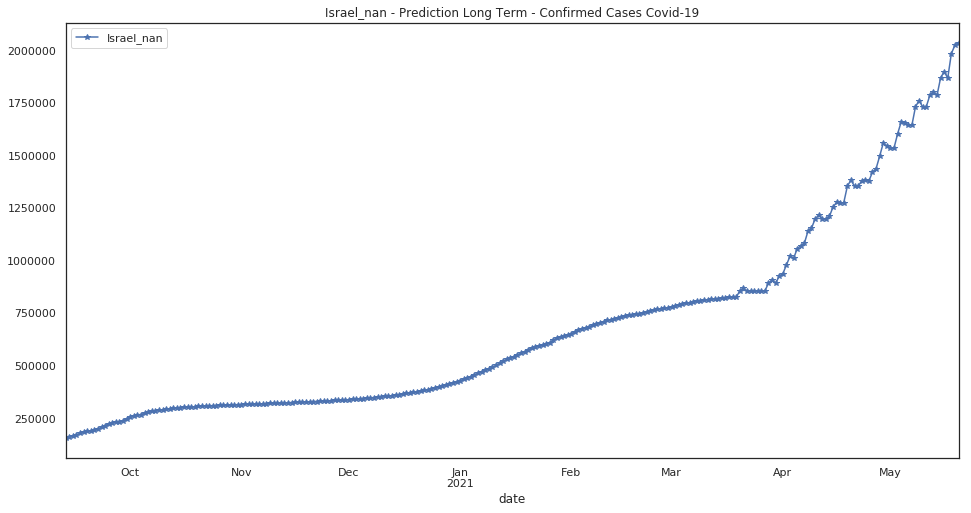

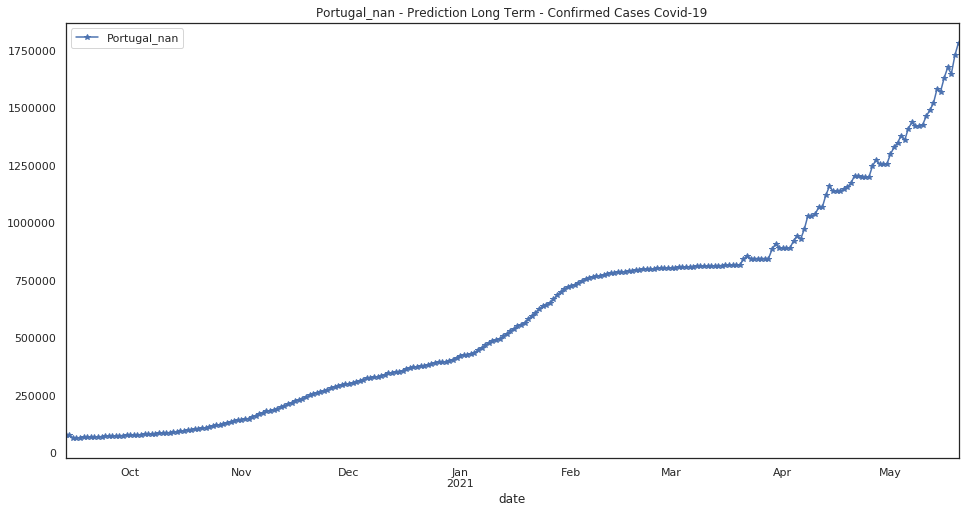

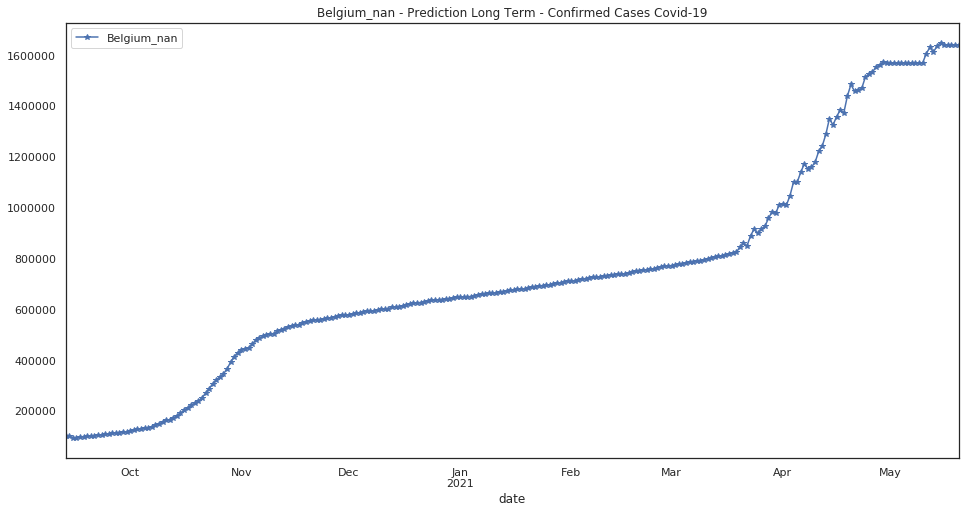

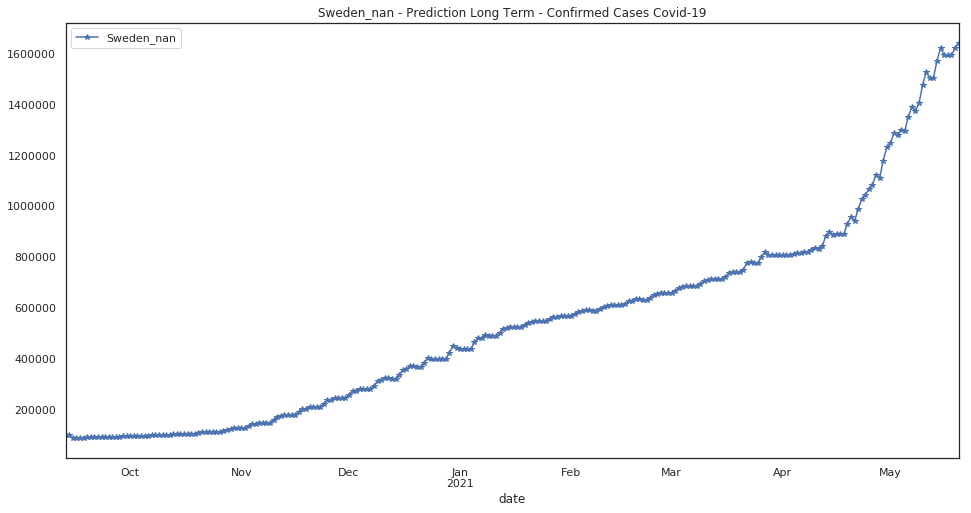

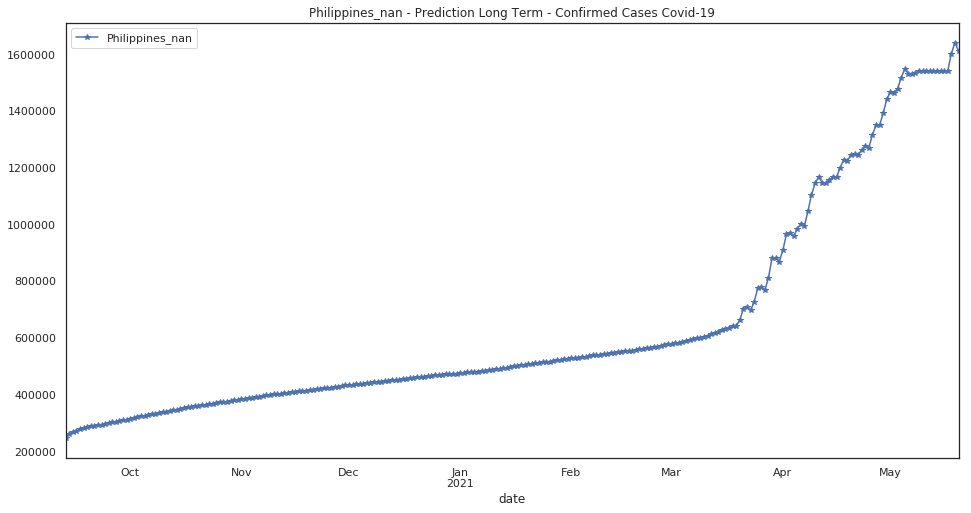

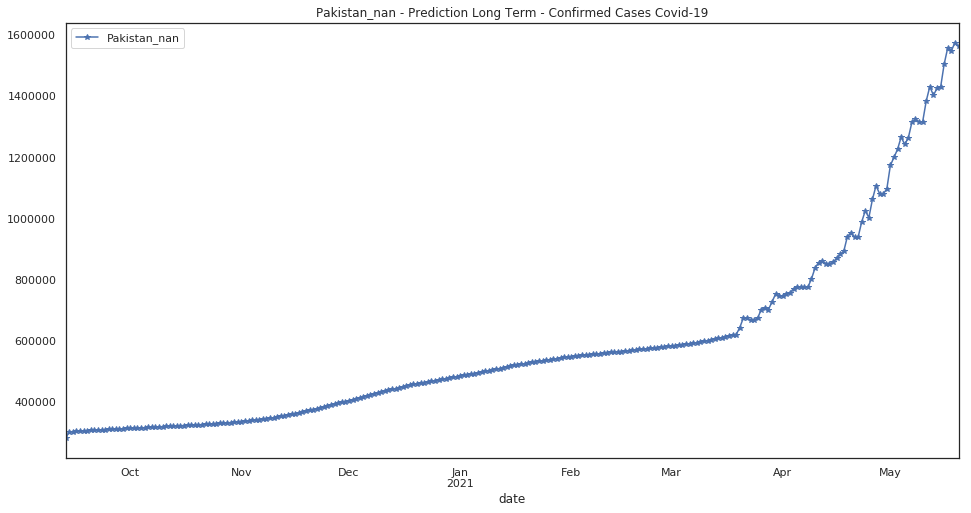

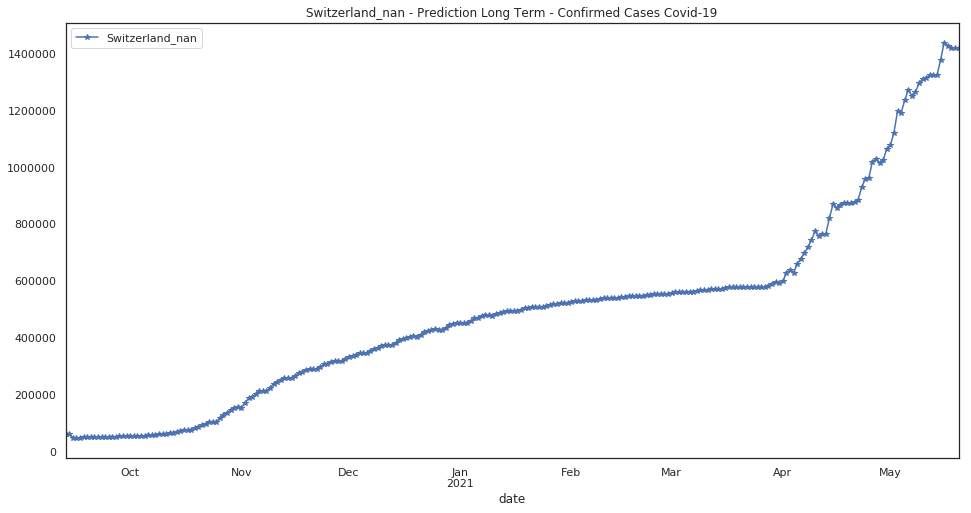

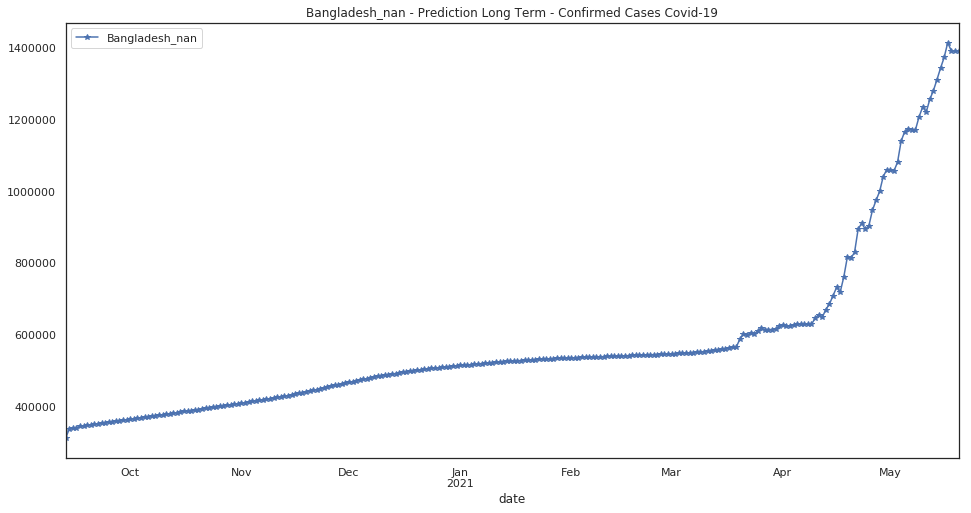

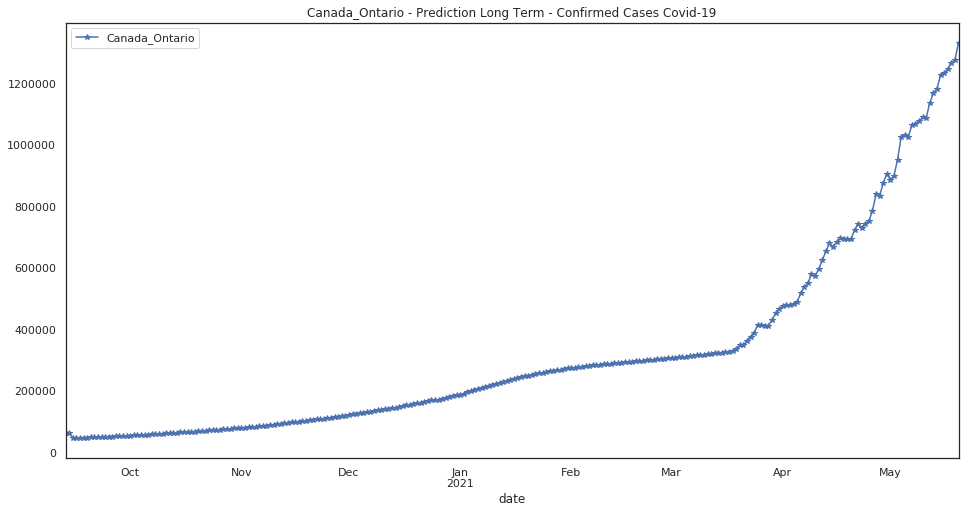

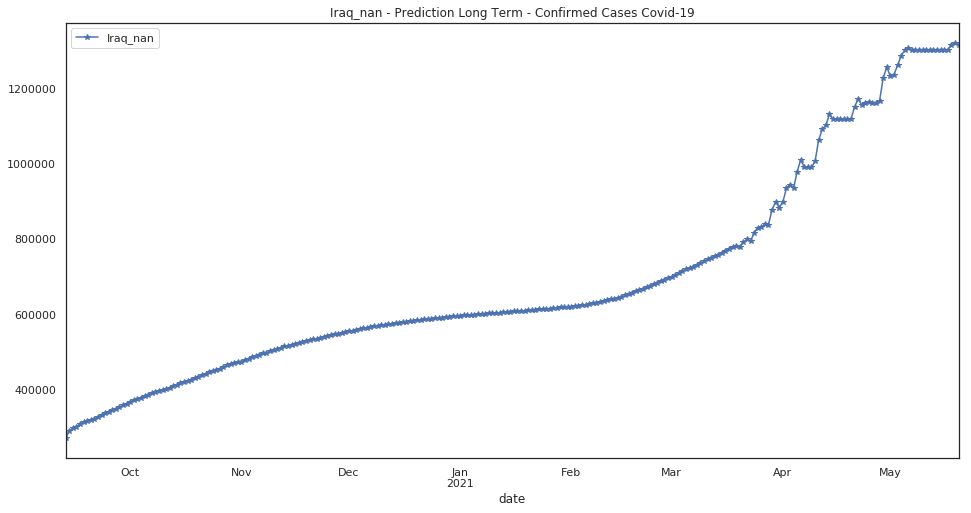

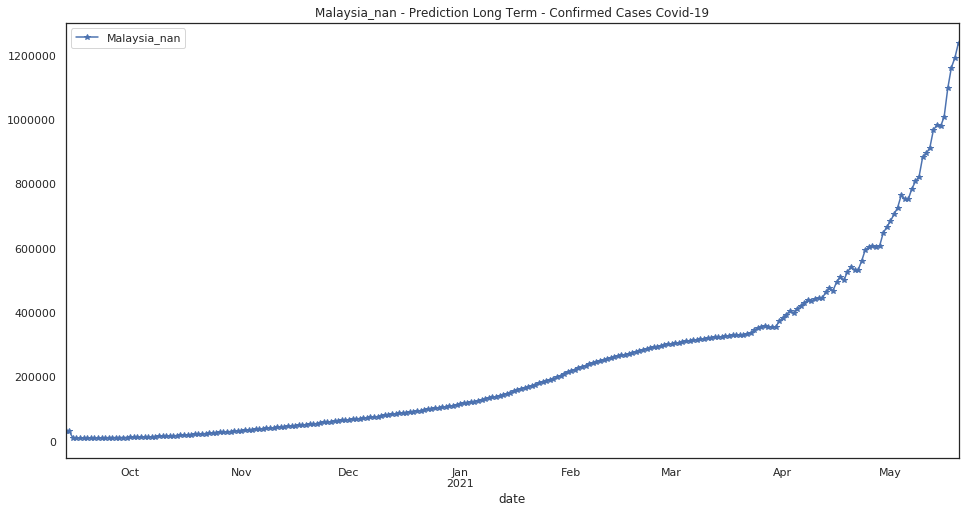

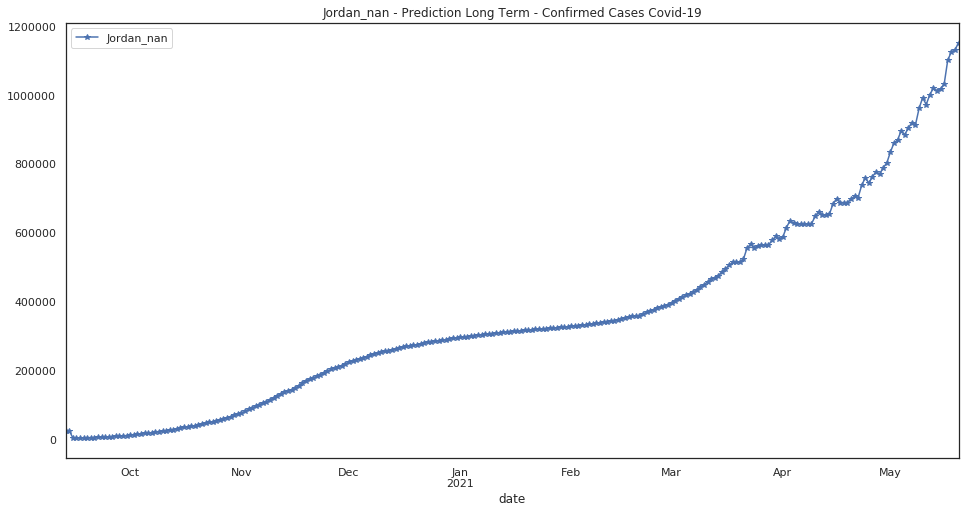

In [78]:
#
rgsx=region[:35]
for i in range (0,len(rgsx)):
        rg_print=rgsx[i]
        pred_prg=pd.DataFrame()
        pred_prg=pred[rg_print]
        pred_prg[:].plot(marker='*',figsize=(16,8),title =rg_print+' - Prediction Long Term - Confirmed Cases Covid-19')
        plt.legend(loc = 'upper left')
        plt.show()
#

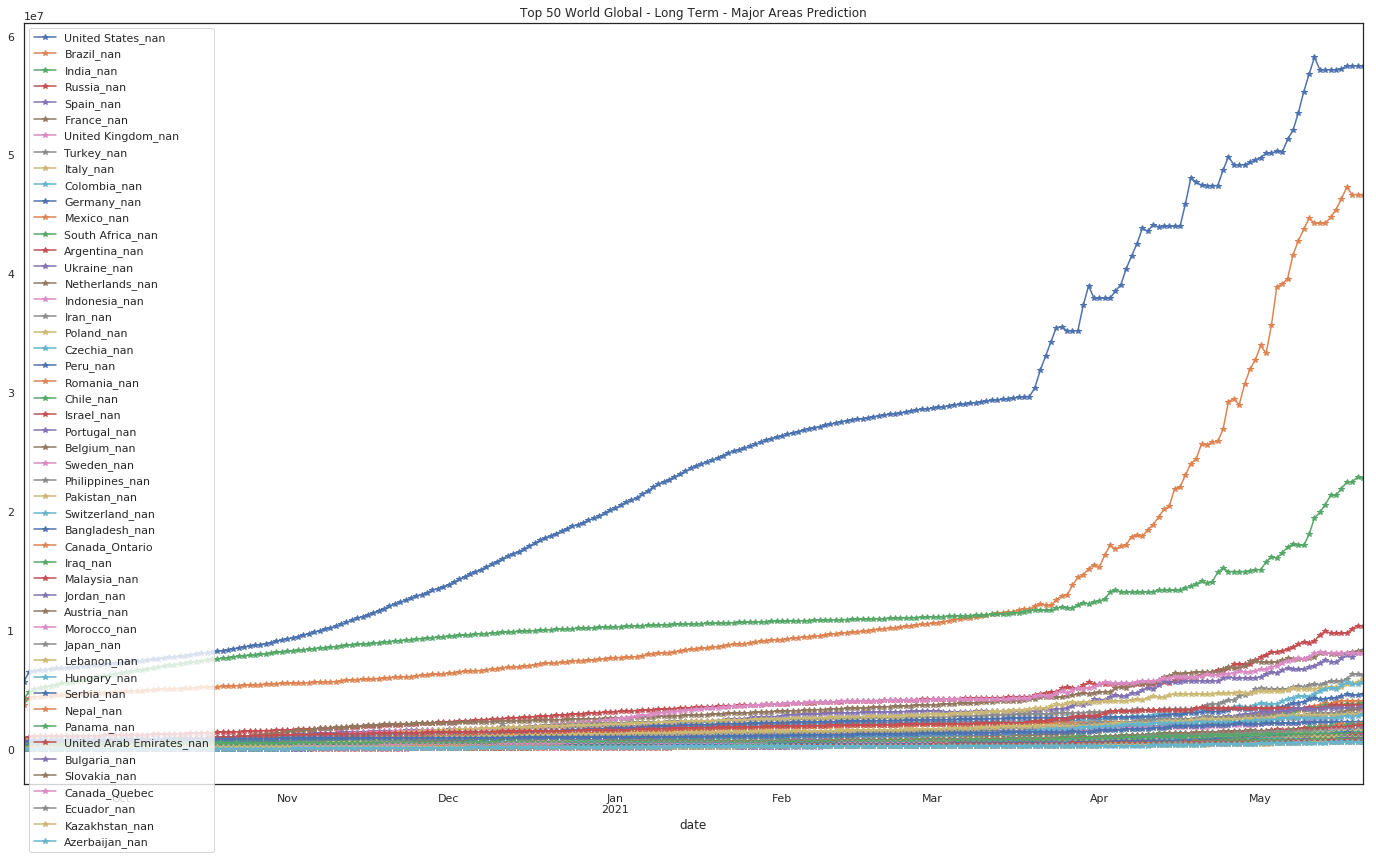

In [79]:
#region=my_train_list
pv2=pred
pv2=pv2.reindex(pv2.max().sort_values(ascending=False).index, axis=1)
pv2[:].iloc[:,0:50].plot(marker='*',figsize=(24,14),title ='Top 50 World Global - Long Term - Major Areas Prediction')
plt.legend(loc = 'upper left')
plt.show()

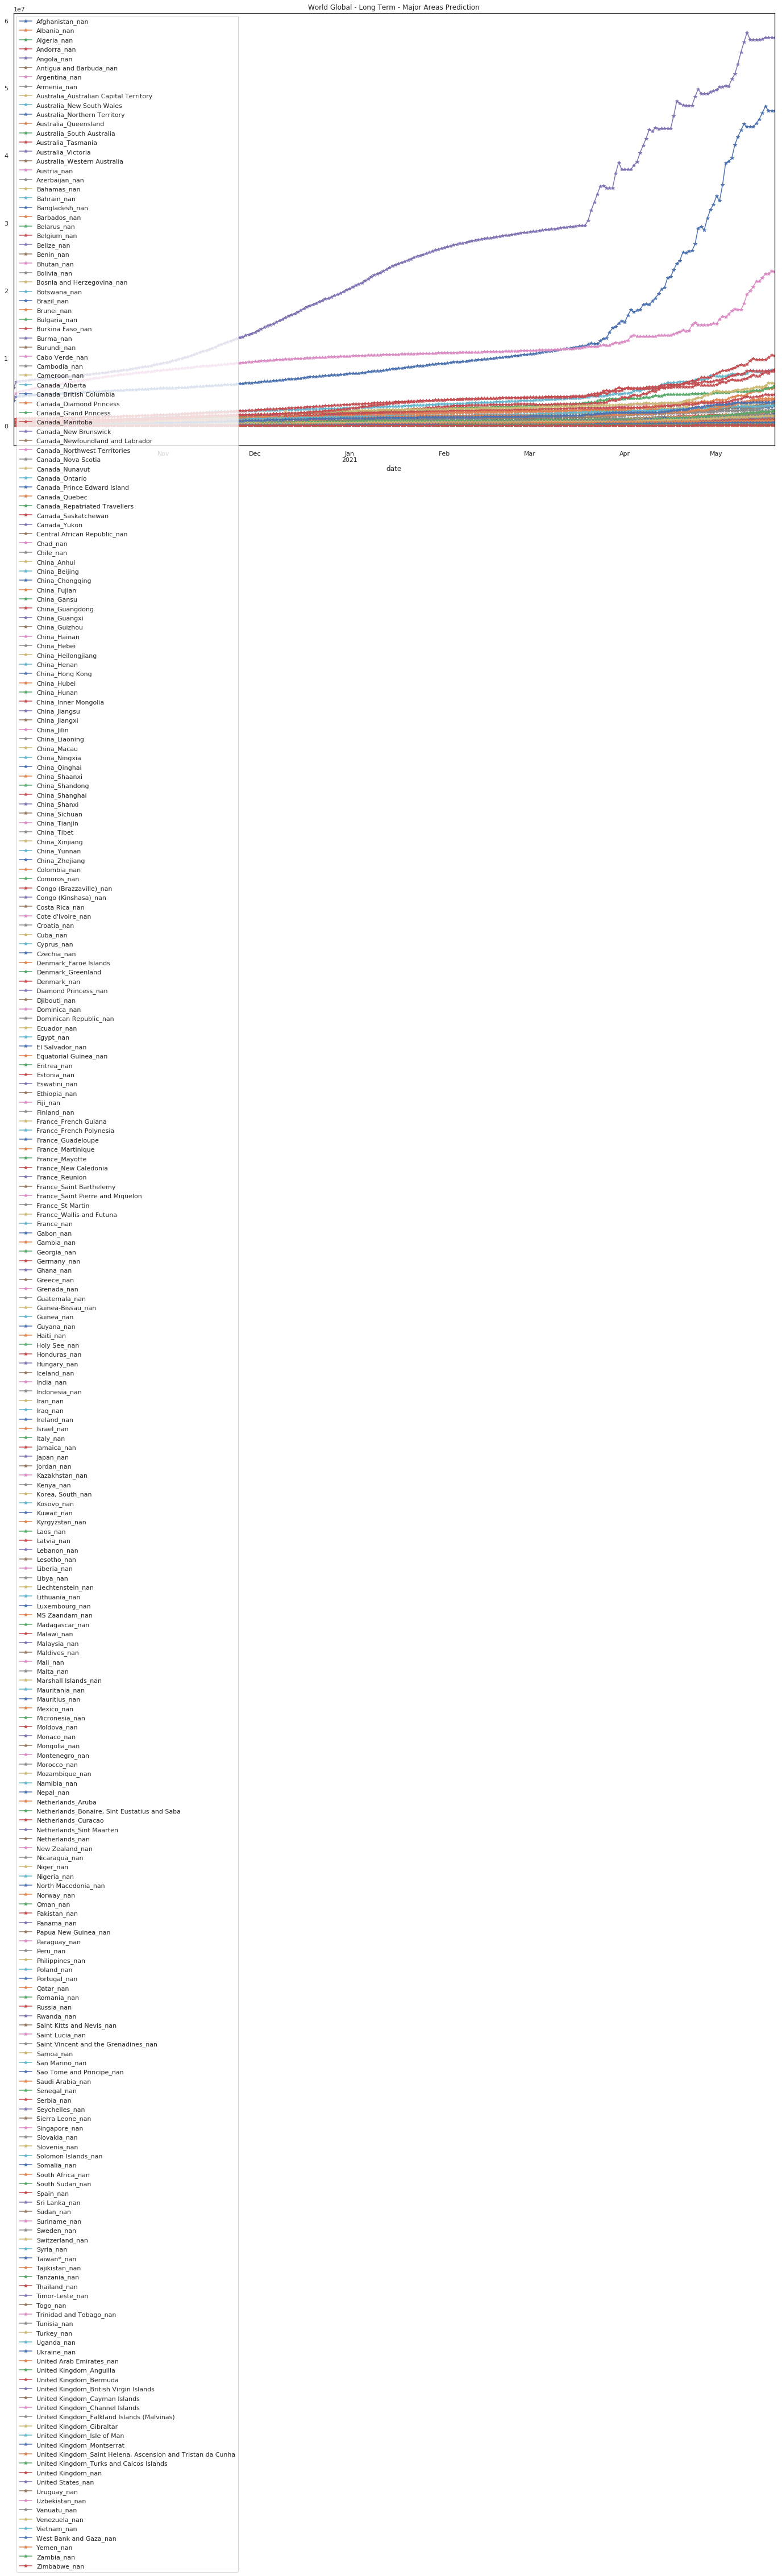

In [80]:
#region=my_train_list
pv2=pred
pv2[:].plot(marker='*',figsize=(24,14),title ='World Global - Long Term - Major Areas Prediction')
plt.legend(loc = 'upper left')
plt.show()


## Prediction Heatmap

In [81]:
pv1=pv2[:] #p  #p2.append(p3).append(p4).append(p5).append(p6).append(p8).append(p9).append(p11)
p=pd.DataFrame(pv1)

In [82]:
p[45:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-10-28          41289.0      19995.0      57130.0       4410.0   
2020-10-29          41415.0      20258.0      57440.0       4517.0   
2020-10-30          41489.0      20600.0      57757.0       4650.0   
2020-10-31          41580.0      20827.0      58053.0       4665.0   
2020-11-01          41653.0      21193.0      58372.0       4756.0   
2020-11-02          41774.0      21464.0      58678.0       4825.0   
2020-11-03          41872.0      21843.0      59065.0       4888.0   
2020-11-04          41964.0      22216.0      59601.0       5099.0   
2020-11-05          42084.0      22634.0      60242.0       5045.0   
2020-11-06          42130.0      23110.0      60887.0       5135.0   
2020-11-07          42191.0      23576.0      61475.0       5486.0   
2020-11-08          42305.0      24082.0      62117.0       5319.0   
2020-11-09          42432.0      24609.0      62754.0       5383.0   
2020-11-10          42601.0      25156.0      63472.0       5472.0   
2020-11-11          42753.0      25658.0      64279.0       5546.0   
2020-11-12          42934.0      26112.0      65126.0       5567.0   
2020-11-13          43106.0      26628.0      66000.0       5674.0   
2020-11-14          43182.0      27112.0      66846.0       5725.0   
2020-11-15          43371.0      27687.0      67691.0       5990.0   
2020-11-16          43580.0      28285.0      68588.0       5872.0   
2020-11-17          43793.0      28980.0      69573.0       5939.0   
2020-11-18          44044.0      29673.0      70616.0       6035.0   
2020-11-19          44291.0      30454.0      71648.0       6018.0   
2020-11-20          44485.0      31269.0      72739.0       6087.0   
2020-11-21          44634.0      32012.0      73776.0       6142.0   
2020-11-22          44819.0      32634.0      74835.0       6207.0   
2020-11-23          45081.0      33431.0      75855.0       6264.0   
2020-11-24          45280.0      34109.0      76950.0       6304.0   
2020-11-25          45500.0      34786.0      78011.0       6373.0   
2020-11-26          45716.0      35482.0      79071.0       6428.0   
...                     ...          ...          ...          ...   
2021-04-21          81772.0     225926.0     155170.0      14170.0   
2021-04-22          85336.0     225926.0     156692.0      14769.0   
2021-04-23          86974.0     226895.0     158990.0      15033.0   
2021-04-24          91333.0     228464.0     160202.0      15402.0   
2021-04-25          94245.0     228464.0     159341.0      15480.0   
2021-04-26          93438.0     228464.0     161333.0      16043.0   
2021-04-27         100571.0     239440.0     162485.0      16251.0   
2021-04-28         103499.0     245646.0     162414.0      16620.0   
2021-04-29         103001.0     241350.0     162414.0      16788.0   
2021-04-30         107355.0     241350.0     162414.0      16808.0   
2021-05-01         113934.0     252068.0     162414.0      16971.0   
2021-05-02         115978.0     266157.0     162414.0      16971.0   
2021-05-03         114719.0     274354.0     162414.0      17701.0   
2021-05-04         118924.0     276920.0     162572.0      18039.0   
2021-05-05         128427.0     274566.0     162572.0      18742.0   
2021-05-06         135158.0     286675.0     163401.0      18743.0   
2021-05-07         135142.0     294099.0     163828.0      18742.0   
2021-05-08         135112.0     292054.0     163524.0      19020.0   
2021-05-09         137659.0     298808.0     167598.0      19398.0   
2021-05-10         144152.0     317061.0     169653.0      19469.0   
2021-05-11         153044.0     329082.0     168154.0      19708.0   
2021-05-12         159717.0     323013.0     170911.0      19708.0   
2021-05-13         161437.0     323013.0     172839.0      20408.0   
2021-05-14         160192.0     344082.0     172249.0      20780.0   
2021-05-15

In [83]:
pfname='data/p+'+str(num_days_R_prediction)+'_confirmed_daily.csv'
p.to_csv(pfname, index = False, header=True)

In [84]:
#!pip install gmplot
# Import the necessary libraries
import pandas as pd
import gmplot
# For improved table display in the notebook
#from IPython.display import display
import random 

In [85]:
heatmap=confirmed[['region','Lat','Long']]
p_m=p.T # pred.T #
### JOAO - Change Global HeapMap print - USA is too small, as USA States datasets are not used! 
#heatmap=heatmap[heatmap['region'].isin(region)]  ## heatmap for region dataset only 
heatmap=heatmap[heatmap['region'].isin(confirmed['region'])] ## Global heatmap
p_m=p_m.reset_index()
heatmap_m=heatmap.merge(p_m,how='left',on='region')


In [86]:
heatmap_m[:]

region        Lat        Long  \
0                                      Afghanistan_nan  33.939110   67.709953   
1                                          Albania_nan  41.153300   20.168300   
2                                          Algeria_nan  28.033900    1.659600   
3                                          Andorra_nan  42.506300    1.521800   
4                                           Angola_nan -11.202700   17.873900   
5                              Antigua and Barbuda_nan  17.060800  -61.796400   
6                                        Argentina_nan -38.416100  -63.616700   
7                                          Armenia_nan  40.069100   45.038200   
8               Australia_Australian Capital Territory -35.473500  149.012400   
9                            Australia_New South Wales -33.868800  151.209300   
10                        Australia_Northern Territory -12.463400  130.845600   
11                                Australia_Queensland -27.469800  153.025100   
12                           Australia_South Australia -34.928500  138.600700   
13                                  Australia_Tasmania -42.882100  147.327200   
14                                  Australia_Victoria -37.813600  144.963100   
15                         Australia_Western Australia -31.950500  115.860500   
16                                         Austria_nan  47.516200   14.550100   
17                                      Azerbaijan_nan  40.143100   47.576900   
18                                         Bahamas_nan  25.025885  -78.035889   
19                                         Bahrain_nan  26.027500   50.550000   
20                                      Bangladesh_nan  23.685000   90.356300   
21                                        Barbados_nan  13.193900  -59.543200   
22                                         Belarus_nan  53.709800   27.953400   
23                                         Belgium_nan  50.833300    4.469936   
24                                          Belize_nan  17.189900  -88.497600   
25                                           Benin_nan   9.307700    2.315800   
26                                          Bhutan_nan  27.514200   90.433600   
27                                         Bolivia_nan -16.290200  -63.588700   
28                          Bosnia and Herzegovina_nan  43.915900   17.679100   
29                                        Botswana_nan -22.328500   24.684900   
..                                                 ...        ...         ...   
250                                    Timor-Leste_nan  -8.874217  125.727539   
251                                           Togo_nan   8.619500    0.824800   
252                            Trinidad and Tobago_nan  10.691800  -61.222500   
253                                        Tunisia_nan  33.886917    9.537499   
254                                         Turkey_nan  38.963700   35.243300   
255                                  United States_nan  40.000000 -100.000000   
256                                         Uganda_nan   1.373333   32.290275   
257                                        Ukraine_nan  48.379400   31.165600   
258                           United Arab Emirates_nan  23.424076   53.847818   
259                            United Kingdom_Anguilla  18.220600  -63.068600   
260                             United Kingdom_Bermuda  32.307800  -64.750500   
261              United Kingdom_British Virgin Islands  18.420700  -64.640000   
262                      United Kingdom_Cayman Islands  19.313300  -81.254600   
263                     United Kingdom_Channel Islands  49.372300   -2.364400   
264         United Kingdom_Falkland Islands (Malvinas) -51.796300  -59.523600   
265                           United Kingdom_Gibraltar  36.140800   -5.353600   
266                         United Kingdom_Isle of Man  54.236100   -4.548100   
267                          United Kingdom_Montserrat  16.742498  -62.187366  

In [87]:
# Fill empty lat,long with 0
heatmap_m['Lat']=heatmap_m['Lat'].fillna(0)
heatmap_m['Long']=heatmap_m['Long'].fillna(0)
#
heatmap_m_fn="heatmap_m_"+str(num_days_R_prediction)+".csv"
heatmap_m.to_csv(r'data/'+heatmap_m_fn, index = False, header=True)

In [88]:
#!pip install folium
import folium
import re

lat=40.99474
lang=6.87237

p21_cluster=folium.Map(location=[lat,lang],zoom_start=3)
from folium import plugins
cluster=plugins.MarkerCluster().add_to(p21_cluster)

colors={'A':'darkgreen','B':'darkpurple','C':'pink','D':'beige','E':'red','F':'lightblue','G':'darkblue','H':'cadetblue','I':'gray',
        'J':'lightred','K':'blue','L':'orange','M':'lightgreen','N':'orange','O':'purple','P':'lightgray','Q':'darkred','R':'green',
        'S':'black','T':'blue','U':'purple','V':'green','X':'blue','Y':'beige','W':'pink','Z':'white'}

date_pred=(datetime.today()+pd.DateOffset(days=num_days_R_prediction)).strftime('%Y-%m-%d')
ndaysavg=num_days_R_prediction
ndayarray=-1-num_days_R_prediction

for lat,lng,num,totpred,ldaygrowth in zip(heatmap_m.Lat,heatmap_m.Long,range(0,heatmap_m.shape[0]), heatmap_m[heatmap_m.columns[-1]],  (heatmap_m[heatmap_m.columns[-1]]-heatmap_m[heatmap_m.columns[ndayarray]])/ndaysavg ):
    use_color=heatmap_m['region'][num][0]
    print_region=re.sub('_nan',  '', heatmap_m['region'][num])
    popup = folium.Popup( print_region+' ConfirmedPred='+str(round(totpred))+' Roling7DayAVG='+str(round(ldaygrowth))+' Date='+date_pred , parse_html=True)
    #
    folium.Marker(
                    [lat,lng],
                    popup=popup,
                    icon=folium.Icon(color=colors[use_color])
            ).add_to(p21_cluster)
p21_cluster

In [89]:
# Top 50 Regions in the World impacted
#
max_cont=max_countries_map
region_m2=region[:max_cont]
#
heatmap_m2=heatmap_m[heatmap_m['region'].isin(region_m2)].reset_index()
#
heatmap_m2[:]

index                    region        Lat        Long  \
0       6             Argentina_nan -38.416100  -63.616700   
1      16               Austria_nan  47.516200   14.550100   
2      17            Azerbaijan_nan  40.143100   47.576900   
3      20            Bangladesh_nan  23.685000   90.356300   
4      23               Belgium_nan  50.833300    4.469936   
5      30                Brazil_nan -14.235000  -51.925300   
6      32              Bulgaria_nan  42.733900   25.485800   
7      51            Canada_Ontario  51.253800  -85.323200   
8      53             Canada_Quebec  52.939900  -73.549100   
9      59                 Chile_nan -35.675100  -71.543000   
10     93              Colombia_nan   4.570900  -74.297300   
11    102               Czechia_nan  49.817500   15.473000   
12    110               Ecuador_nan  -1.831200  -78.183400   
13    131                France_nan  46.227600    2.213700   
14    136               Germany_nan  51.165691   10.451526   
15    148               Hungary_nan  47.162500   19.503300   
16    150                 India_nan  20.593684   78.962880   
17    151             Indonesia_nan  -0.789300  113.921300   
18    152                  Iran_nan  32.427908   53.688046   
19    153                  Iraq_nan  33.223191   43.679291   
20    155                Israel_nan  31.046051   34.851612   
21    156                Israel_nan  31.046051   34.851612   
22    157                 Italy_nan  41.871940   12.567380   
23    159                 Japan_nan  36.204824  138.252924   
24    160                Jordan_nan  31.240000   36.510000   
25    161            Kazakhstan_nan  48.019600   66.923700   
26    169               Lebanon_nan  33.854700   35.862300   
27    170               Lebanon_nan  33.854700   35.862300   
28    180              Malaysia_nan   4.210484  101.975766   
29    187                Mexico_nan  23.634500 -102.552800   
30    193               Morocco_nan  31.791700   -7.092600   
31    196                 Nepal_nan  28.166700   84.250000   
32    201           Netherlands_nan  52.132600    5.291300   
33    209              Pakistan_nan  30.375300   69.345100   
34    210                Panama_nan   8.538000  -80.782100   
35    213                  Peru_nan  -9.190000  -75.015200   
36    214           Philippines_nan  12.879721  121.774017   
37    215                Poland_nan  51.919400   19.145100   
38    216              Portugal_nan  39.399900   -8.224500   
39    218               Romania_nan  45.943200   24.966800   
40    219                Russia_nan  61.524010  105.318756   
41    229                Serbia_nan  44.016500   21.005900   
42    233              Slovakia_nan  48.669000   19.699000   
43    237          South Africa_nan -30.559500   22.937500   
44    239                 Spain_nan  40.463667   -3.749220   
45    243                Sweden_nan  60.128161   18.643501   
46    244           Switzerland_nan  46.818200    8.227500   
47    254                Turkey_nan  38.963700   35.243300   
48    255         United States_nan  40.000000 -100.000000   
49    257               Ukraine_nan  48.379400   31.165600   
50    258  United Arab Emirates_nan  23.424076   53.847818   
51    270        United Kingdom_nan  55.378100   -3.436000   

    2020-09-13 00:00:00  2020-09-14 00:00:00  2020-09-15 00:00:00  \
0              500382.0             555537.0             577562.0   
1               50273.0              50602.0              33541.0   
2               54726.0              54791.0              38403.0   
3              312527.0             337520.0             339332.0   
4              102227.0             102960.0              94306.0   
5             3753052.0            4330455.0            4381144.0   
6               37140.0              37264.0              18061.0   
7               61755.0              62117.0              46905.0   
8               77697.0              77935.0              65262.0   
9              396303.0    

In [90]:
import folium
import re

lat=40.99474
lang=6.87237

p21_reg_cluster=folium.Map(location=[lat,lang],zoom_start=3)
from folium import plugins
cluster=plugins.MarkerCluster().add_to(p21_reg_cluster)

colors={'A':'darkgreen','B':'darkpurple','C':'pink','D':'beige','E':'red','F':'lightblue','G':'darkblue','H':'cadetblue','I':'gray',
        'J':'lightred','K':'blue','L':'orange','M':'lightgreen','N':'orange','O':'purple','P':'lightgray','Q':'darkred','R':'green',
        'S':'black','T':'blue','U':'purple','V':'green','X':'blue','Y':'beige','W':'pink','Z':'white'}

date_pred=(datetime.today()+pd.DateOffset(days=num_days_R_prediction)).strftime('%Y-%m-%d')
ndaysavg=num_days_R_prediction
ndayarray=-1-num_days_R_prediction

for lat2,lng2,num2,totpred2,ldaygrowth2 in zip(heatmap_m2.Lat,heatmap_m2.Long,range(0,heatmap_m2.shape[0]), heatmap_m2[heatmap_m2.columns[-1]], (heatmap_m2[heatmap_m2.columns[-1]]-heatmap_m2[heatmap_m2.columns[ndayarray]])/ndaysavg ):
    use_color2=heatmap_m2['region'][num2][0]
    print_region=re.sub('_nan',  '', heatmap_m2['region'][num2])
    popup2 = folium.Popup( print_region+' ConfirmedPred='+str(round(totpred2))+' Roling7DayAVG='+str(round(ldaygrowth2))+' Date='+date_pred , parse_html=True)  
    #
    folium.Marker(
                    [lat2,lng2],
                    popup=popup2,
                    icon=folium.Icon(color=colors[use_color2])
            ).add_to(p21_reg_cluster)
p21_reg_cluster

In [91]:
#
datemap=datetime.today().strftime('%Y-%m-%d')
p21_cluster.save("heatmaps/Heatmap_Folium-Global-"+datemap+"-pred"+str(num_days_R_prediction)+"Days.html")
#
p21_reg_cluster.save("heatmaps/Heatmap_Folium-Regional-"+datemap+"-pred"+str(num_days_R_prediction)+"Days.html")

In [92]:
print("Stats and Forecast Done for Today!")
print("I'm done with this past month of March, April and May!")
print(" April-May-June-July are going to be hard with this Global Lock-Down!")

Stats and Forecast Done for Today!
I'm done with this past month of March, April and May!
 April-May-June-July are going to be hard with this Global Lock-Down!


In [93]:
exit()